#     Deep Learning Methods for Finance
##     NOVA IMS
####     Carlos Cardoso - 20211220 | Carlota Reis - 20211208 | Guilherme Miranda - 20210420 | Mariana Garcia - 20210838 

## Project Assignment - Forecasting Customer's Churn/New Deposits

## Dataset description

- **Account Number**: clients’ account identifier (ID)
- **Account Status**: clients’ account status (1: active account; 1: partially blocked; 2: blocked)
- **Age**: the investors’ age
- **Birthdate**: the investors’ birthdate
- **Gender**: gender (Masculino: Masculine; Feminino: Feminine; Pessoa Jurídica: Company) 
- **Marital Status**: the investors’ marital status (1: Married 2: Single 3: Divorced 4: Common-law marriage 5: Widowed)
- **Occupation**: the investors’ professional occupation
- **City**: the investors’ birth city
- **Client Profile**: the investors’ risk profile (0: Conservative 1: Moderate  2: Sophisticated)
- **Investor Type**: the investors’ classification (0: Unqualified 1: Qualified 2: Professional)
- **Account Range**: the account amount, in Brazilian reais (1: Until 50k; 2: Between 50k and 100k; 3: Between 100k and 300k; 4: Between 300k and 500k; 5: Between 500k and 1M; 6: 1M and 3M; 7: 3M and 5M; 8: 5M and 10M; 9: Above 10M)
- **Number of Assets**: the current number of assets in the clients’ portfolio
- **Total Assets**: the amount of assets in the clients’ portfolio (in Brazilian reais)
- **Current Account**: the current amount in the investors’ account (in Brazilian reais)
- **Investment Funds**: the amount allocated to investment funds (in Brazilian reais)
- **Fixed Income**: the amount of assets invested in fixed income assets (in Brazilian reais)
- **Stocks**: the amount of assets invested in stocks (in Brazilian reais)
- **Pension Funds**: the amount of assets invested in pension funds (in Brazilian reais)
- **Derivatives**: the amount of assets invested in derivatives (in Brazilian reais)
- **Annual Income**: the investors’ annual income (in Brazilian reais)
- **PL Declared**: the investors’ net worth (in Brazilian reais)
- **Open Account Date**: the date when the investors’ account was opened in the bank 
- **1st Deposit Date**: the date when the investor made the first deposit
- **Last Deposit Date**: the date when the investor made the last deposit
- **Number of Deposits**: the total number of deposits made by an investor
- **Deposits**: the total amount of deposits made by investor (in Brazilian reais)
- **Withdraws**: the total amount of withdraws made by investor (in Brazilian reais)
- **Net Amount**: the sum of deposits and withdrawals (in Brazilian reais) – target variable


In [1]:
## Initializations and data loading

In [2]:
# Loading packages
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from keras import regularizers
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_excel("Dataset.xlsx")
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Account_Number,2711.0,3.141977e+06,1.483849e+06,2.655850e+05,1.853693e+06,2751359.00,4561073.500,5.999669e+06
Account_Status,2678.0,1.070575e+00,3.685737e-01,1.000000e+00,1.000000e+00,1.00,1.000,3.000000e+00
Age,2586.0,3.979157e+01,1.522348e+01,0.000000e+00,3.000000e+01,38.00,48.000,9.400000e+01
Client_Profile,2550.0,2.373725e+00,7.268972e-01,1.000000e+00,2.000000e+00,3.00,3.000,3.000000e+00
Investor_Type,2711.0,1.881225e-01,4.138103e-01,0.000000e+00,0.000000e+00,0.00,0.000,2.000000e+00
Account_Range,2711.0,2.333087e+00,1.637005e+00,1.000000e+00,1.000000e+00,2.00,3.000,9.000000e+00
Number_Assets,2711.0,9.268904e+00,1.523367e+01,0.000000e+00,0.000000e+00,4.00,12.000,1.870000e+02
Total_Assets,2711.0,2.632721e+05,6.735084e+05,-8.832103e+04,1.018250e+02,50569.24,239092.760,1.172226e+07
Current_Account,2711.0,5.537974e+03,4.167527e+04,-4.504314e+04,0.000000e+00,0.04,463.690,1.451287e+06
Investment_Funds,2711.0,6.752112e+04,2.632762e+05,0.000000e+00,0.000000e+00,0.00,38614.120,5.897025e+06


## Dataset Understanding

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account_Number          2711 non-null   int64  
 1   Account_Status          2678 non-null   float64
 2   Age                     2586 non-null   float64
 3   Birthdate               2586 non-null   object 
 4   Gender                  2586 non-null   object 
 5   Marital_Status          2586 non-null   object 
 6   Occupation              2586 non-null   object 
 7   City                    2711 non-null   object 
 8   Client_Profile          2550 non-null   float64
 9   Investor_Type           2711 non-null   int64  
 10  Account_Range           2711 non-null   int64  
 11  Number_Assets           2711 non-null   int64  
 12  Total_Assets            2711 non-null   float64
 13  Current_Account         2711 non-null   float64
 14  Investment_Funds        2711 non-null   

In [5]:
#ds['Age'].astype(float)

In [6]:
# Show top rows
ds.head()

,Account_Number,Account_Status,Age,Birthdate,Gender,Marital_Status,Occupation,City,Client_Profile,Investor_Type,...,Stocks,Pension_Funds,Derivatives,Annual_Income,PL_Declared,Days_from_Open_Account,Number_of_Deposits,Deposits,Withdraws,Net_Amount
0,4018628,1.0,31.0,09/04/1990,Masculino,Married,Engenheiro (a),ARACAJU,3.0,0,...,0.00,0.00,0.0,24000.0,5000.0,632,46,10135.98,-1800.00,8335.98
1,4127593,1.0,32.0,07/01/1989,Masculino,Married,Engenheiro (a),BARRA DOS COQUEIROS,3.0,0,...,121682.98,0.00,0.0,60000.0,90000.0,632,20,19000.01,-13570.53,5429.48
2,3710225,1.0,34.0,05/03/1986,Feminino,Single,Engenheiro (a),ARACAJU,3.0,0,...,73458.10,0.00,0.0,96000.0,190000.0,632,13,65500.00,0.00,65500.00
3,2404267,1.0,41.0,12/03/1980,Feminino,Single,Pedagogo (a),NATAL,2.0,0,...,0.00,4381.42,0.0,48000.0,8080.0,631,0,0.00,0.00,0.00
4,4024329,1.0,25.0,23/01/1995,Feminino,Single,Publicitário (a),SAO PAULO,2.0,0,...,0.00,0.00,0.0,74400.0,32000.0,629,0,0.00,-807.00,-807.00


In [7]:
#Checking if there is missing values
print(ds.isnull().sum())

Account_Number              0
Account_Status             33
Age                       125
Birthdate                 125
Gender                    125
Marital_Status            125
Occupation                125
City                        0
Client_Profile            161
Investor_Type               0
Account_Range               0
Number_Assets               0
Total_Assets                0
Current_Account             0
Investment_Funds            0
Fixed_Income                0
Stocks                      0
Pension_Funds               0
Derivatives                 0
Annual_Income               0
PL_Declared                 0
Days_from_Open_Account      0
Number_of_Deposits          0
Deposits                    0
Withdraws                   0
Net_Amount                  0
dtype: int64


## Dataset Preparation

In [8]:
#Treating the Missing Values:

#Account Status (blanks have values in deposits so they are active account)

ds['Account_Status'] = ds['Account_Status'].fillna(1)

#It seems that we have no personal information about 125 clients.

#Removing NaN
ds = ds.dropna(subset=['Age'], how='all')

#Client Profile
#Since we don't know the client profile, we'll assume the most conservative profile (1)

ds['Client_Profile'] = ds['Client_Profile'].fillna(1)

In [9]:
#Checking if the missing values are already treated
print(ds.isnull().sum())

Account_Number            0
Account_Status            0
Age                       0
Birthdate                 0
Gender                    0
Marital_Status            0
Occupation                0
City                      0
Client_Profile            0
Investor_Type             0
Account_Range             0
Number_Assets             0
Total_Assets              0
Current_Account           0
Investment_Funds          0
Fixed_Income              0
Stocks                    0
Pension_Funds             0
Derivatives               0
Annual_Income             0
PL_Declared               0
Days_from_Open_Account    0
Number_of_Deposits        0
Deposits                  0
Withdraws                 0
Net_Amount                0
dtype: int64


In [10]:
#Checking the Data
ds.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
Account_Number,2586.00,3141203.18,1489042.62,265585.00,1838670.50,2752433.00,4566254.25,5999669.00
Account_Status,2586.00,1.07,0.36,1.00,1.00,1.00,1.00,3.00
Age,2586.00,39.79,15.22,0.00,30.00,38.00,48.00,94.00
Client_Profile,2586.00,2.31,0.77,1.00,2.00,2.00,3.00,3.00
Investor_Type,2586.00,0.18,0.41,0.00,0.00,0.00,0.00,2.00
Account_Range,2586.00,2.30,1.61,1.00,1.00,1.00,3.00,9.00
Number_Assets,2586.00,9.47,15.50,0.00,0.00,4.00,12.00,187.00
Total_Assets,2586.00,247506.25,639654.44,-88321.03,108.89,49979.55,231199.40,11722262.36
Current_Account,2586.00,5446.86,41843.65,-45043.14,0.00,0.07,477.39,1451287.14
Investment_Funds,2586.00,63494.65,254009.66,0.00,0.00,0.00,37183.54,5897024.51


In [11]:
#Categorical Variables
cols_1 = ['Gender', 'Marital_Status', 'Occupation','City']
ds[cols_1] = ds[cols_1].apply(lambda x:x.astype('category'))
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2586 entries, 0 to 2710
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Account_Number          2586 non-null   int64   
 1   Account_Status          2586 non-null   float64 
 2   Age                     2586 non-null   float64 
 3   Birthdate               2586 non-null   object  
 4   Gender                  2586 non-null   category
 5   Marital_Status          2586 non-null   category
 6   Occupation              2586 non-null   category
 7   City                    2586 non-null   category
 8   Client_Profile          2586 non-null   float64 
 9   Investor_Type           2586 non-null   int64   
 10  Account_Range           2586 non-null   int64   
 11  Number_Assets           2586 non-null   int64   
 12  Total_Assets            2586 non-null   float64 
 13  Current_Account         2586 non-null   float64 
 14  Investment_Funds        

In [12]:
ds['Gender'].value_counts()
ds['Marital_Status'].value_counts()
ds['Occupation'].value_counts()
ds['City'].value_counts()


# Top Counts 
for var in ds[cols_1]:
    print(var,":\n",ds[var].value_counts(), sep="")

Gender:
Masculino          1612
Feminino            966
Pessoa Jurídica       8
Name: Gender, dtype: int64
Marital_Status:
Married                1206
Single                  990
Divorced                197
Common-law marriage     115
Widowed                  55
Legally separately       23
Name: Marital_Status, dtype: int64
Occupation:
Médico (a)            396
Empresário (a)        241
Advogado (a)          200
Engenheiro (a)        183
Administrador (a)     178
                     ... 
Músico (a)              1
Office-Boy              1
Oficial de Justiça      1
Podólogo (a)            1
Fisiologista            1
Name: Occupation, Length: 135, dtype: int64
City:
ARACAJU                1689
NATAL                   127
SAO PAULO                89
SALVADOR                 41
BARRA DOS COQUEIROS      33
                       ... 
CURRAIS NOVOS             1
CUSTODIA                  1
NISIA FLORESTA            1
DIAS D AVILA              1
VOLTA REDONDA             1
Name: City, Length

<AxesSubplot:xlabel='Gender'>

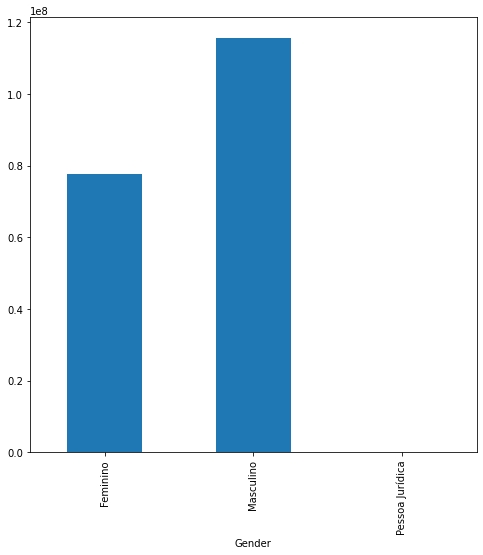

In [13]:
# Exploration of categorical variables

#Net Amount and Gender
tb1 = ds.groupby(['Gender']).Net_Amount.sum()
tb1.plot(kind="bar", figsize=(8,8))


<AxesSubplot:xlabel='Marital_Status'>

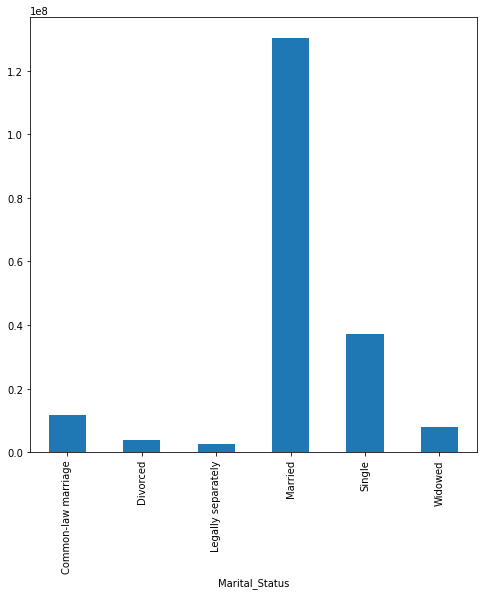

In [14]:
#Net Amount and Marital_Status
tb2 = ds.groupby(['Marital_Status']).Net_Amount.sum()
tb2.plot(kind="bar", figsize=(8,8))

In [15]:
#Treating Categorical Variables

#Droping some variables: Account Number, Birthday, Occupation, City

cols = ['Account_Number', 'Birthdate', 'Occupation','City']
ds1 = ds.drop(columns=cols)

#Treating the Annual Income Variable

# Function to find outliers on columns based on percentile
def removeOutliers(df, colList, lowPercentile=0.05, highPercentile=0.95, verbose=False):
    quant_df = df[colList].quantile([lowPercentile, highPercentile])
    if verbose:
        print(quant_df)
    for name in list(df[colList].columns):
        df = df[(df[name] >= quant_df.loc[lowPercentile, name]) & (df[name] <= quant_df.loc[highPercentile, name])]
    return df

# Annual Income
cols1 = ['Annual_Income']
ds1 = removeOutliers(ds1, colList=cols1, lowPercentile=0.01, highPercentile=0.99, verbose=True)


#Enconde Gender
cols = ['Gender']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
ds1 = ce_one_hot.fit_transform(ds1)


#Change Marital_Status to Numerical Categories

ds1['Marital_Status'] = ds1['Marital_Status'].replace(['Married'],'1')
ds1['Marital_Status'] = ds1['Marital_Status'].replace(['Single'],'2')
ds1['Marital_Status'] = ds1['Marital_Status'].replace(['Divorced'],'3')
ds1['Marital_Status'] = ds1['Marital_Status'].replace(['Common-law marriage'],'4')
ds1['Marital_Status'] = ds1['Marital_Status'].replace(['Widowed'],'5')
ds1['Marital_Status'] = ds1['Marital_Status'].replace(['Legally separately'],'6')

#Marital Status - Joining Legally Separated and Divorced 
ds1['Marital_Status'] = ds1['Marital_Status'].replace(['6'],'3')

#Adding new binary variable from Net_Amount

Net_Amount_binary = []

for value in ds1['Net_Amount']:
    if value > 0:
        Net_Amount_binary.append("1")
    else:
        Net_Amount_binary.append("0")

ds1['Net_Amount_binary'] = Net_Amount_binary
        
ds1['Net_Amount_binary']=ds1['Net_Amount_binary'].astype('int32')

      Annual_Income
0.01          0.868
0.99    1203600.000


In [16]:
ds1.head()

,Account_Status,Age,Gender_Masculino,Gender_Feminino,Gender_Pessoa Jurídica,Marital_Status,Client_Profile,Investor_Type,Account_Range,Number_Assets,...,Pension_Funds,Derivatives,Annual_Income,PL_Declared,Days_from_Open_Account,Number_of_Deposits,Deposits,Withdraws,Net_Amount,Net_Amount_binary
0,1.0,31.0,1,0,0,1,3.0,0,1,0,...,0.00,0.0,24000.0,5000.0,632,46,10135.98,-1800.00,8335.98,1
1,1.0,32.0,1,0,0,1,3.0,0,3,38,...,0.00,0.0,60000.0,90000.0,632,20,19000.01,-13570.53,5429.48,1
2,1.0,34.0,0,1,0,2,3.0,0,3,53,...,0.00,0.0,96000.0,190000.0,632,13,65500.00,0.00,65500.00,1
3,1.0,41.0,0,1,0,2,2.0,0,1,7,...,4381.42,0.0,48000.0,8080.0,631,0,0.00,0.00,0.00,0
4,1.0,25.0,0,1,0,2,2.0,0,1,3,...,0.00,0.0,74400.0,32000.0,629,0,0.00,-807.00,-807.00,0


## Modeling

In [17]:
# Create a modeling dataset from the original dataset
X = ds1.copy(deep=True)

#Creating Target Variable
y = X['Net_Amount_binary']

#Removing the target Variable from X
X = X.drop(['Net_Amount_binary'],1)

C:\Users\lotar\AppData\Local\Temp\ipykernel_18864\1634490347.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(['Net_Amount_binary'],1)


In [18]:
y.value_counts()

1    1460
0    1074
Name: Net_Amount_binary, dtype: int64

In [19]:
X['Marital_Status'] = X['Marital_Status'].astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534 entries, 0 to 2710
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account_Status          2534 non-null   float64
 1   Age                     2534 non-null   float64
 2   Gender_Masculino        2534 non-null   int64  
 3   Gender_Feminino         2534 non-null   int64  
 4   Gender_Pessoa Jurídica  2534 non-null   int64  
 5   Marital_Status          2534 non-null   int32  
 6   Client_Profile          2534 non-null   float64
 7   Investor_Type           2534 non-null   int64  
 8   Account_Range           2534 non-null   int64  
 9   Number_Assets           2534 non-null   int64  
 10  Total_Assets            2534 non-null   float64
 11  Current_Account         2534 non-null   float64
 12  Investment_Funds        2534 non-null   float64
 13  Fixed_Income            2534 non-null   float64
 14  Stocks                  2534 non-null   

In [20]:
#Splitting training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 52)

In [21]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Initial Model

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 52)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Creation of the model
# Creation of an empty model
classifier = Sequential()

classifier.add(Dense(16, activation='relu', input_dim=24))
classifier.add(Dense(16, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))


In [24]:
# Training the network 
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist=classifier.fit(X_train, y_train,validation_split= 0.3, epochs = 200, batch_size=512)

Epoch 1/200
3/3 [==============================] - 1s 64ms/step - loss: 0.7237 - accuracy: 0.5085 - val_loss: 0.6866 - val_accuracy: 0.5698
Epoch 2/200
3/3 [==============================] - 0s 10ms/step - loss: 0.6998 - accuracy: 0.5585 - val_loss: 0.6759 - val_accuracy: 0.6010
Epoch 3/200
3/3 [==============================] - 0s 10ms/step - loss: 0.6860 - accuracy: 0.5952 - val_loss: 0.6672 - val_accuracy: 0.6190
Epoch 4/200
3/3 [==============================] - 0s 10ms/step - loss: 0.6747 - accuracy: 0.6206 - val_loss: 0.6600 - val_accuracy: 0.6223
Epoch 5/200
3/3 [==============================] - 0s 10ms/step - loss: 0.6653 - accuracy: 0.6326 - val_loss: 0.6534 - val_accuracy: 0.6338
Epoch 6/200
3/3 [==============================] - 0s 10ms/step - loss: 0.6569 - accuracy: 0.6410 - val_loss: 0.6473 - val_accuracy: 0.6519
Epoch 7/200
3/3 [==============================] - 0s 10ms/step - loss: 0.6492 - accuracy: 0.6488 - val_loss: 0.6415 - val_accuracy: 0.6617
Epoch 8/200
3/3 [===

3/3 [==============================] - 0s 8ms/step - loss: 0.2463 - accuracy: 0.8963 - val_loss: 0.3499 - val_accuracy: 0.8736
Epoch 118/200
3/3 [==============================] - 0s 8ms/step - loss: 0.2450 - accuracy: 0.8999 - val_loss: 0.3502 - val_accuracy: 0.8637
Epoch 119/200
3/3 [==============================] - 0s 8ms/step - loss: 0.2427 - accuracy: 0.8977 - val_loss: 0.3508 - val_accuracy: 0.8522
Epoch 120/200
3/3 [==============================] - 0s 8ms/step - loss: 0.2435 - accuracy: 0.8984 - val_loss: 0.3521 - val_accuracy: 0.8473
Epoch 121/200
3/3 [==============================] - 0s 8ms/step - loss: 0.2402 - accuracy: 0.8956 - val_loss: 0.3477 - val_accuracy: 0.8703
Epoch 122/200
3/3 [==============================] - 0s 8ms/step - loss: 0.2387 - accuracy: 0.9020 - val_loss: 0.3485 - val_accuracy: 0.8604
Epoch 123/200
3/3 [==============================] - 0s 8ms/step - loss: 0.2376 - accuracy: 0.9006 - val_loss: 0.3459 - val_accuracy: 0.8719
Epoch 124/200
3/3 [========

In [25]:
#Evaluation metrics

def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [26]:
# Predicting the Test set results
y_pred_train = classifier.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)

resultsDF

16/16 [==============================] - 0s 467us/step


,Measure,Train,Test
0,ACCURACY,0.923532,0.928994
1,PRECISION,0.958449,0.972603
2,RECALL,0.904181,0.910256
3,F1 SCORE,0.930524,0.940397
4,AUC,0.926493,0.934615


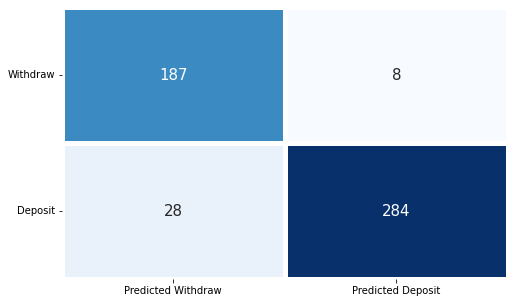

In [27]:
# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Withdraw', 'Deposit'], xticklabels = ['Predicted Withdraw', 'Predicted Deposit'])
plt.yticks(rotation = 0)
plt.show()

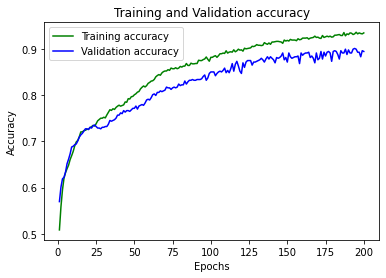

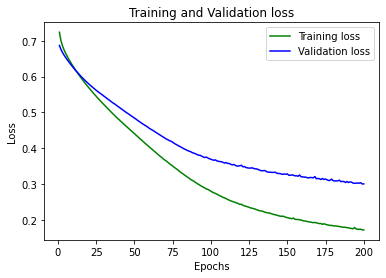

In [28]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(1,201)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,201)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Simple Hold-out Validation

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 52)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_val = X_train[:200]
partial_X_train = X_train[200:]
y_val = y_train[:200]
partial_y_train = y_train[200:]

In [31]:
def get_model():
    model = keras.Sequential([
        layers.Dense(16, activation="relu", input_dim=24),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
model.fit(partial_X_train, partial_y_train,
          epochs=100,
          batch_size=128)

Epoch 1/100
15/15 [==============================] - 0s 714us/step - loss: 0.7138 - accuracy: 0.5271
Epoch 2/100
15/15 [==============================] - 0s 714us/step - loss: 0.6674 - accuracy: 0.5955
Epoch 3/100
15/15 [==============================] - 0s 714us/step - loss: 0.6392 - accuracy: 0.6360
Epoch 4/100
15/15 [==============================] - 0s 714us/step - loss: 0.6154 - accuracy: 0.6672
Epoch 5/100
15/15 [==============================] - 0s 715us/step - loss: 0.5928 - accuracy: 0.6847
Epoch 6/100
15/15 [==============================] - 0s 714us/step - loss: 0.5715 - accuracy: 0.6995
Epoch 7/100
15/15 [==============================] - 0s 857us/step - loss: 0.5515 - accuracy: 0.7121
Epoch 8/100
15/15 [==============================] - 0s 857us/step - loss: 0.5326 - accuracy: 0.7203
Epoch 9/100
15/15 [==============================] - 0s 715us/step - loss: 0.5153 - accuracy: 0.7400
Epoch 10/100
15/15 [==============================] - 0s 786us/step - loss: 0.4983 - accura

In [32]:
# Predicting the Test set results
y_pred_train = model.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

y_pred_test = model.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)

resultsDF

16/16 [==============================] - 0s 533us/step


,Measure,Train,Test
0,ACCURACY,0.946226,0.942801
1,PRECISION,0.962600,0.966997
2,RECALL,0.941638,0.939103
3,F1 SCORE,0.952004,0.952846
4,AUC,0.946928,0.943910


### Weight Regularization - L2

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 52)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# Creation of the model
model = models.Sequential()

model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu', input_dim=24))
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [35]:
# Training the network 
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist=model.fit(X_train, y_train,validation_split= 0.3, epochs = 300, batch_size=512)

Epoch 1/300
3/3 [==============================] - 1s 59ms/step - loss: 0.7018 - accuracy: 0.5903 - val_loss: 0.6887 - val_accuracy: 0.6125
Epoch 2/300
3/3 [==============================] - 0s 10ms/step - loss: 0.6868 - accuracy: 0.6178 - val_loss: 0.6815 - val_accuracy: 0.6240
Epoch 3/300
3/3 [==============================] - 0s 11ms/step - loss: 0.6773 - accuracy: 0.6255 - val_loss: 0.6757 - val_accuracy: 0.6322
Epoch 4/300
3/3 [==============================] - 0s 10ms/step - loss: 0.6691 - accuracy: 0.6410 - val_loss: 0.6704 - val_accuracy: 0.6355
Epoch 5/300
3/3 [==============================] - 0s 10ms/step - loss: 0.6615 - accuracy: 0.6650 - val_loss: 0.6656 - val_accuracy: 0.6404
Epoch 6/300
3/3 [==============================] - 0s 11ms/step - loss: 0.6545 - accuracy: 0.6777 - val_loss: 0.6607 - val_accuracy: 0.6486
Epoch 7/300
3/3 [==============================] - 0s 10ms/step - loss: 0.6478 - accuracy: 0.6939 - val_loss: 0.6560 - val_accuracy: 0.6519
Epoch 8/300
3/3 [===

3/3 [==============================] - 0s 9ms/step - loss: 0.2660 - accuracy: 0.9076 - val_loss: 0.3521 - val_accuracy: 0.8719
Epoch 118/300
3/3 [==============================] - 0s 9ms/step - loss: 0.2648 - accuracy: 0.9048 - val_loss: 0.3486 - val_accuracy: 0.8801
Epoch 119/300
3/3 [==============================] - 0s 9ms/step - loss: 0.2644 - accuracy: 0.9090 - val_loss: 0.3494 - val_accuracy: 0.8801
Epoch 120/300
3/3 [==============================] - 0s 9ms/step - loss: 0.2623 - accuracy: 0.9062 - val_loss: 0.3486 - val_accuracy: 0.8818
Epoch 121/300
3/3 [==============================] - 0s 9ms/step - loss: 0.2619 - accuracy: 0.9097 - val_loss: 0.3480 - val_accuracy: 0.8768
Epoch 122/300
3/3 [==============================] - 0s 8ms/step - loss: 0.2609 - accuracy: 0.9083 - val_loss: 0.3444 - val_accuracy: 0.8818
Epoch 123/300
3/3 [==============================] - 0s 9ms/step - loss: 0.2611 - accuracy: 0.9111 - val_loss: 0.3496 - val_accuracy: 0.8719
Epoch 124/300
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 0.1962 - accuracy: 0.9408 - val_loss: 0.2725 - val_accuracy: 0.9228
Epoch 234/300
3/3 [==============================] - 0s 9ms/step - loss: 0.1955 - accuracy: 0.9422 - val_loss: 0.2728 - val_accuracy: 0.9130
Epoch 235/300
3/3 [==============================] - 0s 8ms/step - loss: 0.1958 - accuracy: 0.9401 - val_loss: 0.2726 - val_accuracy: 0.9097
Epoch 236/300
3/3 [==============================] - 0s 9ms/step - loss: 0.1933 - accuracy: 0.9436 - val_loss: 0.2739 - val_accuracy: 0.9130
Epoch 237/300
3/3 [==============================] - 0s 9ms/step - loss: 0.1940 - accuracy: 0.9422 - val_loss: 0.2737 - val_accuracy: 0.9113
Epoch 238/300
3/3 [==============================] - 0s 8ms/step - loss: 0.1928 - accuracy: 0.9443 - val_loss: 0.2743 - val_accuracy: 0.9113
Epoch 239/300
3/3 [==============================] - 0s 9ms/step - loss: 0.1930 - accuracy: 0.9408 - val_loss: 0.2772 - val_accuracy: 0.8966
Epoch 240/300
3/3 [========

In [36]:
# Predicting the Test set results
y_pred_train = model.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

y_pred_test = model.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)

resultsDF

16/16 [==============================] - 0s 667us/step


,Measure,Train,Test
0,ACCURACY,0.944253,0.940828
1,PRECISION,0.970883,0.970000
2,RECALL,0.929443,0.932692
3,F1 SCORE,0.949711,0.950980
4,AUC,0.946519,0.943269


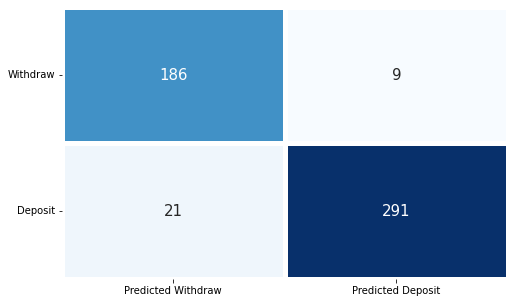

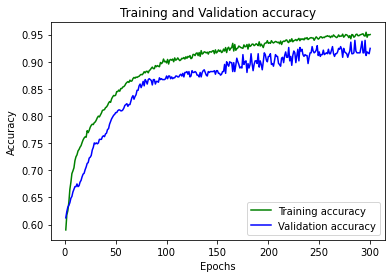

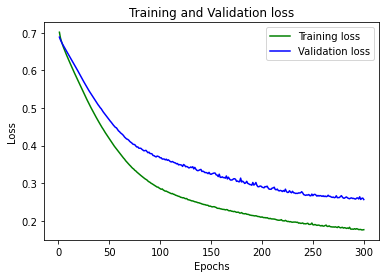

In [37]:
# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Withdraw', 'Deposit'], xticklabels = ['Predicted Withdraw', 'Predicted Deposit'])
plt.yticks(rotation = 0)
plt.show()



loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(1,301)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,301)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###  Weight Regularization - L1 and L2

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 52)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
# Creation of the model
model = models.Sequential()

model.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1=0.001, l2=0.02), activation='relu', input_dim=24))
model.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1=0.001, l2=0.02), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
# Predicting the Test set results
y_pred_train = model.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

y_pred_test = model.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)

resultsDF

16/16 [==============================] - 0s 600us/step


,Measure,Train,Test
0,ACCURACY,0.524420,0.530572
1,PRECISION,0.631805,0.728395
2,RECALL,0.384146,0.378205
3,F1 SCORE,0.477790,0.497890
4,AUC,0.545884,0.576282


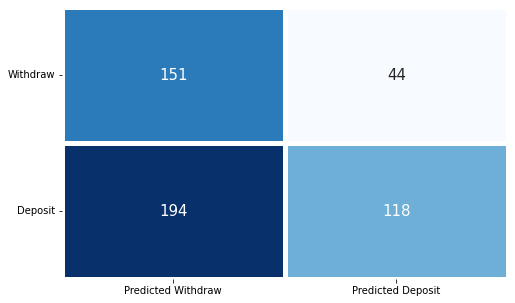

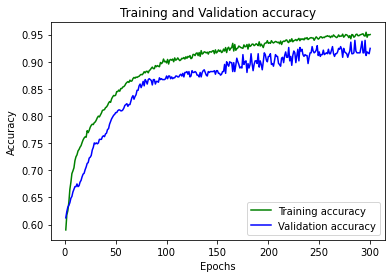

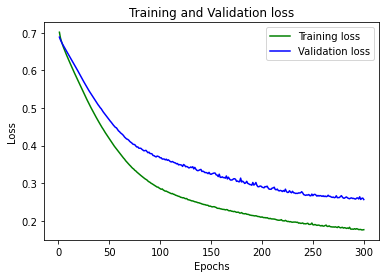

In [41]:
# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Withdraw', 'Deposit'], xticklabels = ['Predicted Withdraw', 'Predicted Deposit'])
plt.yticks(rotation = 0)
plt.show()



loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(1,301)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,301)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Adding Dropout

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 52)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
model2 = models.Sequential()

model2.add(layers.Dense(16, activation='relu', input_dim=24))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))


In [44]:
# Training the network 
model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist=model2.fit(X_train, y_train,validation_split= 0.3, epochs = 300, batch_size=512)

Epoch 1/300
3/3 [==============================] - 1s 57ms/step - loss: 0.8147 - accuracy: 0.5014 - val_loss: 0.7140 - val_accuracy: 0.5057
Epoch 2/300
3/3 [==============================] - 0s 9ms/step - loss: 0.8007 - accuracy: 0.4915 - val_loss: 0.7050 - val_accuracy: 0.5156
Epoch 3/300
3/3 [==============================] - 0s 10ms/step - loss: 0.7966 - accuracy: 0.5099 - val_loss: 0.6974 - val_accuracy: 0.5255
Epoch 4/300
3/3 [==============================] - 0s 9ms/step - loss: 0.7894 - accuracy: 0.5148 - val_loss: 0.6919 - val_accuracy: 0.5320
Epoch 5/300
3/3 [==============================] - 0s 9ms/step - loss: 0.7667 - accuracy: 0.5367 - val_loss: 0.6854 - val_accuracy: 0.5698
Epoch 6/300
3/3 [==============================] - 0s 10ms/step - loss: 0.7448 - accuracy: 0.5303 - val_loss: 0.6810 - val_accuracy: 0.5780
Epoch 7/300
3/3 [==============================] - 0s 9ms/step - loss: 0.7546 - accuracy: 0.5353 - val_loss: 0.6766 - val_accuracy: 0.5993
Epoch 8/300
3/3 [=======

3/3 [==============================] - 0s 8ms/step - loss: 0.4722 - accuracy: 0.7715 - val_loss: 0.4414 - val_accuracy: 0.8079
Epoch 118/300
3/3 [==============================] - 0s 8ms/step - loss: 0.4696 - accuracy: 0.7722 - val_loss: 0.4393 - val_accuracy: 0.8079
Epoch 119/300
3/3 [==============================] - 0s 8ms/step - loss: 0.4625 - accuracy: 0.7757 - val_loss: 0.4380 - val_accuracy: 0.8095
Epoch 120/300
3/3 [==============================] - 0s 8ms/step - loss: 0.4566 - accuracy: 0.7863 - val_loss: 0.4361 - val_accuracy: 0.8112
Epoch 121/300
3/3 [==============================] - 0s 8ms/step - loss: 0.4547 - accuracy: 0.7779 - val_loss: 0.4335 - val_accuracy: 0.8128
Epoch 122/300
3/3 [==============================] - 0s 8ms/step - loss: 0.4871 - accuracy: 0.7821 - val_loss: 0.4314 - val_accuracy: 0.8144
Epoch 123/300
3/3 [==============================] - 0s 9ms/step - loss: 0.4550 - accuracy: 0.7800 - val_loss: 0.4296 - val_accuracy: 0.8144
Epoch 124/300
3/3 [========

3/3 [==============================] - 0s 8ms/step - loss: 0.3077 - accuracy: 0.8787 - val_loss: 0.3182 - val_accuracy: 0.8916
Epoch 234/300
3/3 [==============================] - 0s 8ms/step - loss: 0.2965 - accuracy: 0.8822 - val_loss: 0.3173 - val_accuracy: 0.8949
Epoch 235/300
3/3 [==============================] - 0s 8ms/step - loss: 0.3089 - accuracy: 0.8836 - val_loss: 0.3181 - val_accuracy: 0.8949
Epoch 236/300
3/3 [==============================] - 0s 8ms/step - loss: 0.2939 - accuracy: 0.8900 - val_loss: 0.3173 - val_accuracy: 0.8949
Epoch 237/300
3/3 [==============================] - 0s 8ms/step - loss: 0.3002 - accuracy: 0.8787 - val_loss: 0.3174 - val_accuracy: 0.8949
Epoch 238/300
3/3 [==============================] - 0s 8ms/step - loss: 0.2857 - accuracy: 0.8858 - val_loss: 0.3160 - val_accuracy: 0.8949
Epoch 239/300
3/3 [==============================] - 0s 8ms/step - loss: 0.2863 - accuracy: 0.8858 - val_loss: 0.3146 - val_accuracy: 0.8933
Epoch 240/300
3/3 [========

In [45]:
# Predicting the Test set results
y_pred_train = model2.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

y_pred_test = model2.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)

resultsDF

16/16 [==============================] - 0s 467us/step


,Measure,Train,Test
0,ACCURACY,0.922546,0.942801
1,PRECISION,0.954170,0.970100
2,RECALL,0.906794,0.935897
3,F1 SCORE,0.929879,0.952692
4,AUC,0.924956,0.944872


### Cross Validation

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 52)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
def build_Classifier():
    classifier = Sequential()
    classifier.add(layers.Dense(16, activation='relu', input_dim=24))
    classifier.add(layers.Dense(16, activation='relu'))
    classifier.add(layers.Dense(1, activation='sigmoid'))
    classifier.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [48]:
classifier = KerasClassifier(build_fn = build_Classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv =10, n_jobs=-1)

print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std()))

C:\Users\lotar\AppData\Local\Temp\ipykernel_18864\903768394.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_Classifier, batch_size = 10, epochs = 100)


0.95 accuracy with a standard deviation of 0.01


### K-Fold CV

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 52)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
k = 4
num_val_samples = len(X_train) // k
np.random.shuffle(X_train)
all_scores = []
for fold in range(k):
    validation_data = X_train[fold * num_val_samples: (fold + 1) * num_val_samples]
    validation_target = y_train[fold * num_val_samples: (fold + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train[:fold * num_val_samples], X_train[(fold + 1) * num_val_samples:]], axis=0)
    partial_train_target = np.concatenate( [y_train[:fold * num_val_samples], y_train[(fold + 1) * num_val_samples:]], axis=0)
    model = build_Classifier()
    model.fit(partial_train_data, partial_train_target,epochs=200, batch_size=10, verbose=0)
    test_score = model.evaluate(validation_data, validation_target, verbose=0)
    all_scores.append(test_score)
    


#Training the final model
    
model = build_Classifier()
model.fit(X_train, y_train, epochs=130, batch_size=16, verbose=0)
test_score= model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 534us/step - loss: 0.8087 - accuracy: 0.5444


In [51]:
np.average(all_scores)

0.8000965788960457

In [52]:
# Predicting the Test set results
y_pred_train = model.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

y_pred_test = model.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)

resultsDF

16/16 [==============================] - 0s 400us/step


,Measure,Train,Test
0,ACCURACY,0.685742,0.544379
1,PRECISION,0.666884,0.602015
2,RECALL,0.889373,0.766026
3,F1 SCORE,0.762225,0.674189
4,AUC,0.654584,0.477885


### Tuning of the parameters

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 52)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
def build_Classifier(optimizer):
    classifier = Sequential()
    classifier.add(layers.Dense(16, activation='relu', input_dim=24))
    classifier.add(layers.Dense(16, activation='relu'))
    classifier.add(layers.Dense(1, activation='sigmoid'))
    classifier.compile(optimizer = optimizer, loss='binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [55]:
classifier = KerasClassifier(build_fn = build_Classifier)

parameters = {'batch_size': [25,32], 'epochs': [100, 500], 'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV (estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv=10)

C:\Users\lotar\AppData\Local\Temp\ipykernel_18864\1427915732.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_Classifier)


In [56]:
#Fitting on the available data. 

grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_ 

Epoch 1/100
73/73 [==============================] - 0s 570us/step - loss: 0.6331 - accuracy: 0.6678
Epoch 2/100
73/73 [==============================] - 0s 556us/step - loss: 0.5561 - accuracy: 0.7336
Epoch 3/100
73/73 [==============================] - 0s 570us/step - loss: 0.4950 - accuracy: 0.7725
Epoch 4/100
73/73 [==============================] - 0s 542us/step - loss: 0.4443 - accuracy: 0.8010
Epoch 5/100
73/73 [==============================] - 0s 556us/step - loss: 0.3985 - accuracy: 0.8273
Epoch 6/100
73/73 [==============================] - 0s 570us/step - loss: 0.3578 - accuracy: 0.8465
Epoch 7/100
73/73 [==============================] - 0s 570us/step - loss: 0.3231 - accuracy: 0.8668
Epoch 8/100
73/73 [==============================] - 0s 570us/step - loss: 0.3001 - accuracy: 0.8777
Epoch 9/100
73/73 [==============================] - 0s 566us/step - loss: 0.2784 - accuracy: 0.8931
Epoch 10/100
73/73 [==============================] - 0s 570us/step - loss: 0.2632 - accura

73/73 [==============================] - 0s 556us/step - loss: 0.0966 - accuracy: 0.9638
Epoch 62/100
73/73 [==============================] - 0s 570us/step - loss: 0.0948 - accuracy: 0.9633
Epoch 63/100
73/73 [==============================] - 0s 556us/step - loss: 0.0962 - accuracy: 0.9638
Epoch 64/100
73/73 [==============================] - 0s 556us/step - loss: 0.0923 - accuracy: 0.9649
Epoch 65/100
73/73 [==============================] - 0s 556us/step - loss: 0.0940 - accuracy: 0.9638
Epoch 66/100
73/73 [==============================] - 0s 556us/step - loss: 0.0915 - accuracy: 0.9649
Epoch 67/100
73/73 [==============================] - 0s 570us/step - loss: 0.0903 - accuracy: 0.9660
Epoch 68/100
73/73 [==============================] - 0s 570us/step - loss: 0.0887 - accuracy: 0.9677
Epoch 69/100
73/73 [==============================] - 0s 570us/step - loss: 0.0897 - accuracy: 0.9688
Epoch 70/100
73/73 [==============================] - 0s 556us/step - loss: 0.0935 - accuracy: 

73/73 [==============================] - 0s 542us/step - loss: 0.1270 - accuracy: 0.9501
Epoch 42/100
73/73 [==============================] - 0s 570us/step - loss: 0.1248 - accuracy: 0.9512
Epoch 43/100
73/73 [==============================] - 0s 556us/step - loss: 0.1262 - accuracy: 0.9479
Epoch 44/100
73/73 [==============================] - 0s 542us/step - loss: 0.1225 - accuracy: 0.9523
Epoch 45/100
73/73 [==============================] - 0s 556us/step - loss: 0.1199 - accuracy: 0.9545
Epoch 46/100
73/73 [==============================] - 0s 570us/step - loss: 0.1154 - accuracy: 0.9545
Epoch 47/100
73/73 [==============================] - 0s 570us/step - loss: 0.1172 - accuracy: 0.9507
Epoch 48/100
73/73 [==============================] - 0s 556us/step - loss: 0.1173 - accuracy: 0.9518
Epoch 49/100
73/73 [==============================] - 0s 583us/step - loss: 0.1115 - accuracy: 0.9529
Epoch 50/100
73/73 [==============================] - 0s 570us/step - loss: 0.1138 - accuracy: 

73/73 [==============================] - 0s 583us/step - loss: 0.1944 - accuracy: 0.9293
Epoch 22/100
73/73 [==============================] - 0s 570us/step - loss: 0.1914 - accuracy: 0.9260
Epoch 23/100
73/73 [==============================] - 0s 583us/step - loss: 0.1855 - accuracy: 0.9304
Epoch 24/100
73/73 [==============================] - 0s 570us/step - loss: 0.1845 - accuracy: 0.9254
Epoch 25/100
73/73 [==============================] - 0s 583us/step - loss: 0.1786 - accuracy: 0.9276
Epoch 26/100
73/73 [==============================] - 0s 570us/step - loss: 0.1726 - accuracy: 0.9342
Epoch 27/100
73/73 [==============================] - 0s 570us/step - loss: 0.1687 - accuracy: 0.9331
Epoch 28/100
73/73 [==============================] - 0s 583us/step - loss: 0.1670 - accuracy: 0.9353
Epoch 29/100
73/73 [==============================] - 0s 556us/step - loss: 0.1652 - accuracy: 0.9370
Epoch 30/100
73/73 [==============================] - 0s 570us/step - loss: 0.1574 - accuracy: 

73/73 [==============================] - 0s 556us/step - loss: 0.0739 - accuracy: 0.9731
Epoch 81/100
73/73 [==============================] - 0s 570us/step - loss: 0.0746 - accuracy: 0.9671
Epoch 82/100
73/73 [==============================] - 0s 556us/step - loss: 0.0738 - accuracy: 0.9731
Epoch 83/100
73/73 [==============================] - 0s 556us/step - loss: 0.0717 - accuracy: 0.9759
Epoch 84/100
73/73 [==============================] - 0s 556us/step - loss: 0.0700 - accuracy: 0.9748
Epoch 85/100
73/73 [==============================] - 0s 556us/step - loss: 0.0684 - accuracy: 0.9748
Epoch 86/100
73/73 [==============================] - 0s 547us/step - loss: 0.0688 - accuracy: 0.9731
Epoch 87/100
73/73 [==============================] - 0s 570us/step - loss: 0.0684 - accuracy: 0.9742
Epoch 88/100
73/73 [==============================] - 0s 556us/step - loss: 0.0711 - accuracy: 0.9753
Epoch 89/100
73/73 [==============================] - 0s 556us/step - loss: 0.0675 - accuracy: 

73/73 [==============================] - 0s 556us/step - loss: 0.1011 - accuracy: 0.9633
Epoch 61/100
73/73 [==============================] - 0s 556us/step - loss: 0.0946 - accuracy: 0.9611
Epoch 62/100
73/73 [==============================] - 0s 556us/step - loss: 0.0933 - accuracy: 0.9649
Epoch 63/100
73/73 [==============================] - 0s 570us/step - loss: 0.0919 - accuracy: 0.9671
Epoch 64/100
73/73 [==============================] - 0s 556us/step - loss: 0.0916 - accuracy: 0.9633
Epoch 65/100
73/73 [==============================] - 0s 556us/step - loss: 0.0886 - accuracy: 0.9693
Epoch 66/100
73/73 [==============================] - 0s 556us/step - loss: 0.0884 - accuracy: 0.9671
Epoch 67/100
73/73 [==============================] - 0s 542us/step - loss: 0.0874 - accuracy: 0.9688
Epoch 68/100
73/73 [==============================] - 0s 556us/step - loss: 0.0870 - accuracy: 0.9649
Epoch 69/100
73/73 [==============================] - 0s 542us/step - loss: 0.0848 - accuracy: 

73/73 [==============================] - 0s 611us/step - loss: 0.1334 - accuracy: 0.9490
Epoch 41/100
73/73 [==============================] - 0s 570us/step - loss: 0.1292 - accuracy: 0.9507
Epoch 42/100
73/73 [==============================] - 0s 556us/step - loss: 0.1278 - accuracy: 0.9507
Epoch 43/100
73/73 [==============================] - 0s 570us/step - loss: 0.1258 - accuracy: 0.9501
Epoch 44/100
73/73 [==============================] - 0s 583us/step - loss: 0.1257 - accuracy: 0.9496
Epoch 45/100
73/73 [==============================] - 0s 570us/step - loss: 0.1239 - accuracy: 0.9490
Epoch 46/100
73/73 [==============================] - 0s 583us/step - loss: 0.1183 - accuracy: 0.9572
Epoch 47/100
73/73 [==============================] - 0s 597us/step - loss: 0.1228 - accuracy: 0.9523
Epoch 48/100
73/73 [==============================] - 0s 597us/step - loss: 0.1216 - accuracy: 0.9485
Epoch 49/100
73/73 [==============================] - 0s 583us/step - loss: 0.1158 - accuracy: 

73/73 [==============================] - 0s 542us/step - loss: 0.1991 - accuracy: 0.9255
Epoch 21/100
73/73 [==============================] - 0s 528us/step - loss: 0.1956 - accuracy: 0.9244
Epoch 22/100
73/73 [==============================] - 0s 542us/step - loss: 0.1913 - accuracy: 0.9299
Epoch 23/100
73/73 [==============================] - 0s 528us/step - loss: 0.1889 - accuracy: 0.9282
Epoch 24/100
73/73 [==============================] - 0s 528us/step - loss: 0.1864 - accuracy: 0.9249
Epoch 25/100
73/73 [==============================] - 0s 542us/step - loss: 0.1835 - accuracy: 0.9326
Epoch 26/100
73/73 [==============================] - 0s 542us/step - loss: 0.1791 - accuracy: 0.9337
Epoch 27/100
73/73 [==============================] - 0s 528us/step - loss: 0.1738 - accuracy: 0.9321
Epoch 28/100
73/73 [==============================] - 0s 542us/step - loss: 0.1737 - accuracy: 0.9332
Epoch 29/100
73/73 [==============================] - 0s 528us/step - loss: 0.1690 - accuracy: 

73/73 [==============================] - 0s 542us/step - loss: 0.0554 - accuracy: 0.9792
Epoch 81/100
73/73 [==============================] - 0s 542us/step - loss: 0.0545 - accuracy: 0.9808
Epoch 82/100
73/73 [==============================] - 0s 556us/step - loss: 0.0558 - accuracy: 0.9786
Epoch 83/100
73/73 [==============================] - 0s 556us/step - loss: 0.0548 - accuracy: 0.9819
Epoch 84/100
73/73 [==============================] - 0s 528us/step - loss: 0.0522 - accuracy: 0.9803
Epoch 85/100
73/73 [==============================] - 0s 542us/step - loss: 0.0523 - accuracy: 0.9819
Epoch 86/100
73/73 [==============================] - 0s 528us/step - loss: 0.0545 - accuracy: 0.9792
Epoch 87/100
73/73 [==============================] - 0s 556us/step - loss: 0.0523 - accuracy: 0.9830
Epoch 88/100
73/73 [==============================] - 0s 528us/step - loss: 0.0508 - accuracy: 0.9830
Epoch 89/100
73/73 [==============================] - 0s 542us/step - loss: 0.0500 - accuracy: 

73/73 [==============================] - 0s 514us/step - loss: 0.0860 - accuracy: 0.9693
Epoch 61/100
73/73 [==============================] - 0s 514us/step - loss: 0.0851 - accuracy: 0.9638
Epoch 62/100
73/73 [==============================] - 0s 514us/step - loss: 0.0801 - accuracy: 0.9704
Epoch 63/100
73/73 [==============================] - 0s 514us/step - loss: 0.0779 - accuracy: 0.9721
Epoch 64/100
73/73 [==============================] - 0s 528us/step - loss: 0.0800 - accuracy: 0.9704
Epoch 65/100
73/73 [==============================] - 0s 542us/step - loss: 0.0767 - accuracy: 0.9704
Epoch 66/100
73/73 [==============================] - 0s 528us/step - loss: 0.0742 - accuracy: 0.9710
Epoch 67/100
73/73 [==============================] - 0s 528us/step - loss: 0.0749 - accuracy: 0.9693
Epoch 68/100
73/73 [==============================] - 0s 528us/step - loss: 0.0715 - accuracy: 0.9710
Epoch 69/100
73/73 [==============================] - 0s 528us/step - loss: 0.0700 - accuracy: 

73/73 [==============================] - 0s 570us/step - loss: 0.1330 - accuracy: 0.9507
Epoch 41/100
73/73 [==============================] - 0s 570us/step - loss: 0.1300 - accuracy: 0.9457
Epoch 42/100
73/73 [==============================] - 0s 570us/step - loss: 0.1266 - accuracy: 0.9501
Epoch 43/100
73/73 [==============================] - 0s 570us/step - loss: 0.1240 - accuracy: 0.9507
Epoch 44/100
73/73 [==============================] - 0s 556us/step - loss: 0.1226 - accuracy: 0.9523
Epoch 45/100
73/73 [==============================] - 0s 570us/step - loss: 0.1210 - accuracy: 0.9534
Epoch 46/100
73/73 [==============================] - 0s 583us/step - loss: 0.1165 - accuracy: 0.9512
Epoch 47/100
73/73 [==============================] - 0s 556us/step - loss: 0.1151 - accuracy: 0.9556
Epoch 48/100
73/73 [==============================] - 0s 570us/step - loss: 0.1148 - accuracy: 0.9534
Epoch 49/100
73/73 [==============================] - 0s 570us/step - loss: 0.1132 - accuracy: 

73/73 [==============================] - 0s 528us/step - loss: 0.2256 - accuracy: 0.9128
Epoch 21/100
73/73 [==============================] - 0s 528us/step - loss: 0.2210 - accuracy: 0.9183
Epoch 22/100
73/73 [==============================] - 0s 528us/step - loss: 0.2153 - accuracy: 0.9183
Epoch 23/100
73/73 [==============================] - 0s 528us/step - loss: 0.2100 - accuracy: 0.9178
Epoch 24/100
73/73 [==============================] - 0s 514us/step - loss: 0.2059 - accuracy: 0.9189
Epoch 25/100
73/73 [==============================] - 0s 528us/step - loss: 0.2018 - accuracy: 0.9249
Epoch 26/100
73/73 [==============================] - 0s 528us/step - loss: 0.1980 - accuracy: 0.9221
Epoch 27/100
73/73 [==============================] - 0s 514us/step - loss: 0.1936 - accuracy: 0.9243
Epoch 28/100
73/73 [==============================] - 0s 528us/step - loss: 0.1895 - accuracy: 0.9271
Epoch 29/100
73/73 [==============================] - 0s 528us/step - loss: 0.1859 - accuracy: 

73/73 [==============================] - 0s 528us/step - loss: 0.0855 - accuracy: 0.9677
Epoch 81/100
73/73 [==============================] - 0s 514us/step - loss: 0.0864 - accuracy: 0.9655
Epoch 82/100
73/73 [==============================] - 0s 514us/step - loss: 0.0848 - accuracy: 0.9655
Epoch 83/100
73/73 [==============================] - 0s 528us/step - loss: 0.0859 - accuracy: 0.9638
Epoch 84/100
73/73 [==============================] - 0s 514us/step - loss: 0.0829 - accuracy: 0.9677
Epoch 85/100
73/73 [==============================] - 0s 514us/step - loss: 0.0830 - accuracy: 0.9688
Epoch 86/100
73/73 [==============================] - 0s 514us/step - loss: 0.0831 - accuracy: 0.9644
Epoch 87/100
73/73 [==============================] - 0s 514us/step - loss: 0.0822 - accuracy: 0.9666
Epoch 88/100
73/73 [==============================] - 0s 528us/step - loss: 0.0805 - accuracy: 0.9682
Epoch 89/100
73/73 [==============================] - 0s 528us/step - loss: 0.0809 - accuracy: 

73/73 [==============================] - 0s 583us/step - loss: 0.0932 - accuracy: 0.9660
Epoch 61/100
73/73 [==============================] - 0s 570us/step - loss: 0.0917 - accuracy: 0.9638
Epoch 62/100
73/73 [==============================] - 0s 583us/step - loss: 0.0904 - accuracy: 0.9633
Epoch 63/100
73/73 [==============================] - 0s 570us/step - loss: 0.0885 - accuracy: 0.9688
Epoch 64/100
73/73 [==============================] - 0s 570us/step - loss: 0.0867 - accuracy: 0.9671
Epoch 65/100
73/73 [==============================] - 0s 556us/step - loss: 0.0849 - accuracy: 0.9682
Epoch 66/100
73/73 [==============================] - 0s 556us/step - loss: 0.0835 - accuracy: 0.9649
Epoch 67/100
73/73 [==============================] - 0s 570us/step - loss: 0.0826 - accuracy: 0.9649
Epoch 68/100
73/73 [==============================] - 0s 570us/step - loss: 0.0816 - accuracy: 0.9660
Epoch 69/100
73/73 [==============================] - 0s 570us/step - loss: 0.0798 - accuracy: 

73/73 [==============================] - 0s 528us/step - loss: 0.1676 - accuracy: 0.9320
Epoch 41/100
73/73 [==============================] - 0s 528us/step - loss: 0.1656 - accuracy: 0.9348
Epoch 42/100
73/73 [==============================] - 0s 528us/step - loss: 0.1627 - accuracy: 0.9370
Epoch 43/100
73/73 [==============================] - 0s 528us/step - loss: 0.1604 - accuracy: 0.9342
Epoch 44/100
73/73 [==============================] - 0s 514us/step - loss: 0.1570 - accuracy: 0.9370
Epoch 45/100
73/73 [==============================] - 0s 528us/step - loss: 0.1550 - accuracy: 0.9375
Epoch 46/100
73/73 [==============================] - 0s 514us/step - loss: 0.1528 - accuracy: 0.9342
Epoch 47/100
73/73 [==============================] - 0s 514us/step - loss: 0.1479 - accuracy: 0.9474
Epoch 48/100
73/73 [==============================] - 0s 528us/step - loss: 0.1461 - accuracy: 0.9408
Epoch 49/100
73/73 [==============================] - 0s 528us/step - loss: 0.1432 - accuracy: 

73/73 [==============================] - 0s 542us/step - loss: 0.2224 - accuracy: 0.9189
Epoch 21/100
73/73 [==============================] - 0s 542us/step - loss: 0.2179 - accuracy: 0.9172
Epoch 22/100
73/73 [==============================] - 0s 542us/step - loss: 0.2118 - accuracy: 0.9227
Epoch 23/100
73/73 [==============================] - 0s 542us/step - loss: 0.2085 - accuracy: 0.9216
Epoch 24/100
73/73 [==============================] - 0s 528us/step - loss: 0.2028 - accuracy: 0.9249
Epoch 25/100
73/73 [==============================] - 0s 542us/step - loss: 0.2004 - accuracy: 0.9232
Epoch 26/100
73/73 [==============================] - 0s 542us/step - loss: 0.1959 - accuracy: 0.9227
Epoch 27/100
73/73 [==============================] - 0s 542us/step - loss: 0.1926 - accuracy: 0.9271
Epoch 28/100
73/73 [==============================] - 0s 542us/step - loss: 0.1882 - accuracy: 0.9260
Epoch 29/100
73/73 [==============================] - 0s 542us/step - loss: 0.1841 - accuracy: 

73/73 [==============================] - 0s 556us/step - loss: 0.0912 - accuracy: 0.9666
Epoch 81/100
73/73 [==============================] - 0s 542us/step - loss: 0.0896 - accuracy: 0.9633
Epoch 82/100
73/73 [==============================] - 0s 528us/step - loss: 0.0901 - accuracy: 0.9671
Epoch 83/100
73/73 [==============================] - 0s 528us/step - loss: 0.0884 - accuracy: 0.9655
Epoch 84/100
73/73 [==============================] - 0s 528us/step - loss: 0.0883 - accuracy: 0.9649
Epoch 85/100
73/73 [==============================] - 0s 542us/step - loss: 0.0872 - accuracy: 0.9709
Epoch 86/100
73/73 [==============================] - 0s 542us/step - loss: 0.0859 - accuracy: 0.9698
Epoch 87/100
73/73 [==============================] - 0s 542us/step - loss: 0.0852 - accuracy: 0.9677
Epoch 88/100
73/73 [==============================] - 0s 542us/step - loss: 0.0866 - accuracy: 0.9704
Epoch 89/100
73/73 [==============================] - 0s 568us/step - loss: 0.0842 - accuracy: 

73/73 [==============================] - 0s 508us/step - loss: 0.1226 - accuracy: 0.9540
Epoch 61/100
73/73 [==============================] - 0s 514us/step - loss: 0.1231 - accuracy: 0.9567
Epoch 62/100
73/73 [==============================] - 0s 500us/step - loss: 0.1201 - accuracy: 0.9556
Epoch 63/100
73/73 [==============================] - 0s 514us/step - loss: 0.1199 - accuracy: 0.9573
Epoch 64/100
73/73 [==============================] - 0s 500us/step - loss: 0.1176 - accuracy: 0.9589
Epoch 65/100
73/73 [==============================] - 0s 514us/step - loss: 0.1178 - accuracy: 0.9534
Epoch 66/100
73/73 [==============================] - 0s 500us/step - loss: 0.1158 - accuracy: 0.9584
Epoch 67/100
73/73 [==============================] - 0s 500us/step - loss: 0.1148 - accuracy: 0.9545
Epoch 68/100
73/73 [==============================] - 0s 500us/step - loss: 0.1136 - accuracy: 0.9600
Epoch 69/100
73/73 [==============================] - 0s 486us/step - loss: 0.1122 - accuracy: 

73/73 [==============================] - 0s 500us/step - loss: 0.1540 - accuracy: 0.9436
Epoch 41/100
73/73 [==============================] - 0s 486us/step - loss: 0.1515 - accuracy: 0.9436
Epoch 42/100
73/73 [==============================] - 0s 486us/step - loss: 0.1485 - accuracy: 0.9436
Epoch 43/100
73/73 [==============================] - 0s 486us/step - loss: 0.1451 - accuracy: 0.9436
Epoch 44/100
73/73 [==============================] - 0s 486us/step - loss: 0.1431 - accuracy: 0.9463
Epoch 45/100
73/73 [==============================] - 0s 500us/step - loss: 0.1395 - accuracy: 0.9458
Epoch 46/100
73/73 [==============================] - 0s 500us/step - loss: 0.1398 - accuracy: 0.9452
Epoch 47/100
73/73 [==============================] - 0s 514us/step - loss: 0.1361 - accuracy: 0.9468
Epoch 48/100
73/73 [==============================] - 0s 486us/step - loss: 0.1352 - accuracy: 0.9479
Epoch 49/100
73/73 [==============================] - 0s 500us/step - loss: 0.1337 - accuracy: 

73/73 [==============================] - 0s 486us/step - loss: 0.2098 - accuracy: 0.9211
Epoch 21/100
73/73 [==============================] - 0s 486us/step - loss: 0.2056 - accuracy: 0.9238
Epoch 22/100
73/73 [==============================] - 0s 472us/step - loss: 0.2008 - accuracy: 0.9233
Epoch 23/100
73/73 [==============================] - 0s 486us/step - loss: 0.1977 - accuracy: 0.9255
Epoch 24/100
73/73 [==============================] - 0s 486us/step - loss: 0.1926 - accuracy: 0.9271
Epoch 25/100
73/73 [==============================] - 0s 486us/step - loss: 0.1912 - accuracy: 0.9277
Epoch 26/100
73/73 [==============================] - 0s 486us/step - loss: 0.1861 - accuracy: 0.9299
Epoch 27/100
73/73 [==============================] - 0s 486us/step - loss: 0.1837 - accuracy: 0.9332
Epoch 28/100
73/73 [==============================] - 0s 486us/step - loss: 0.1778 - accuracy: 0.9326
Epoch 29/100
73/73 [==============================] - 0s 486us/step - loss: 0.1765 - accuracy: 

73/73 [==============================] - 0s 570us/step - loss: 0.0641 - accuracy: 0.9759
Epoch 81/500
73/73 [==============================] - 0s 570us/step - loss: 0.0634 - accuracy: 0.9770
Epoch 82/500
73/73 [==============================] - 0s 556us/step - loss: 0.0672 - accuracy: 0.9748
Epoch 83/500
73/73 [==============================] - 0s 542us/step - loss: 0.0632 - accuracy: 0.9781
Epoch 84/500
73/73 [==============================] - 0s 556us/step - loss: 0.0626 - accuracy: 0.9764
Epoch 85/500
73/73 [==============================] - 0s 542us/step - loss: 0.0610 - accuracy: 0.9781
Epoch 86/500
73/73 [==============================] - 0s 552us/step - loss: 0.0608 - accuracy: 0.9792
Epoch 87/500
73/73 [==============================] - 0s 542us/step - loss: 0.0596 - accuracy: 0.9775
Epoch 88/500
73/73 [==============================] - 0s 542us/step - loss: 0.0566 - accuracy: 0.9792
Epoch 89/500
73/73 [==============================] - 0s 556us/step - loss: 0.0578 - accuracy: 

73/73 [==============================] - 0s 556us/step - loss: 0.0120 - accuracy: 0.9978
Epoch 239/500
73/73 [==============================] - 0s 556us/step - loss: 0.0137 - accuracy: 0.9956
Epoch 240/500
73/73 [==============================] - 0s 556us/step - loss: 0.0133 - accuracy: 0.9945
Epoch 241/500
73/73 [==============================] - 0s 556us/step - loss: 0.0163 - accuracy: 0.9951
Epoch 242/500
73/73 [==============================] - 0s 556us/step - loss: 0.0204 - accuracy: 0.9934
Epoch 243/500
73/73 [==============================] - 0s 556us/step - loss: 0.0118 - accuracy: 0.9967
Epoch 244/500
73/73 [==============================] - 0s 570us/step - loss: 0.0268 - accuracy: 0.9962
Epoch 245/500
73/73 [==============================] - 0s 570us/step - loss: 0.0138 - accuracy: 0.9951
Epoch 246/500
73/73 [==============================] - 0s 556us/step - loss: 0.0148 - accuracy: 0.9962
Epoch 247/500
73/73 [==============================] - 0s 556us/step - loss: 0.0128 - a

73/73 [==============================] - 0s 583us/step - loss: 0.0183 - accuracy: 0.9929
Epoch 397/500
73/73 [==============================] - 0s 583us/step - loss: 0.0070 - accuracy: 0.9973
Epoch 398/500
73/73 [==============================] - 0s 583us/step - loss: 0.0071 - accuracy: 0.9978
Epoch 399/500
73/73 [==============================] - 0s 542us/step - loss: 0.0050 - accuracy: 0.9995
Epoch 400/500
73/73 [==============================] - 0s 570us/step - loss: 0.0057 - accuracy: 0.9984
Epoch 401/500
73/73 [==============================] - 0s 570us/step - loss: 0.0075 - accuracy: 0.9984
Epoch 402/500
73/73 [==============================] - 0s 570us/step - loss: 0.0059 - accuracy: 0.9989
Epoch 403/500
73/73 [==============================] - 0s 597us/step - loss: 0.0054 - accuracy: 0.9995
Epoch 404/500
73/73 [==============================] - 0s 583us/step - loss: 0.0061 - accuracy: 0.9984
Epoch 405/500
73/73 [==============================] - 0s 570us/step - loss: 0.0220 - a

73/73 [==============================] - 0s 542us/step - loss: 0.0973 - accuracy: 0.9589
Epoch 55/500
73/73 [==============================] - 0s 542us/step - loss: 0.0923 - accuracy: 0.9649
Epoch 56/500
73/73 [==============================] - 0s 542us/step - loss: 0.0923 - accuracy: 0.9655
Epoch 57/500
73/73 [==============================] - 0s 556us/step - loss: 0.0877 - accuracy: 0.9655
Epoch 58/500
73/73 [==============================] - 0s 542us/step - loss: 0.0858 - accuracy: 0.9671
Epoch 59/500
73/73 [==============================] - 0s 556us/step - loss: 0.0851 - accuracy: 0.9649
Epoch 60/500
73/73 [==============================] - 0s 542us/step - loss: 0.0841 - accuracy: 0.9709
Epoch 61/500
73/73 [==============================] - 0s 542us/step - loss: 0.0798 - accuracy: 0.9742
Epoch 62/500
73/73 [==============================] - 0s 556us/step - loss: 0.0788 - accuracy: 0.9720
Epoch 63/500
73/73 [==============================] - 0s 556us/step - loss: 0.0791 - accuracy: 

73/73 [==============================] - 0s 542us/step - loss: 0.0277 - accuracy: 0.9896
Epoch 135/500
73/73 [==============================] - 0s 556us/step - loss: 0.0254 - accuracy: 0.9907
Epoch 136/500
73/73 [==============================] - 0s 528us/step - loss: 0.0240 - accuracy: 0.9918
Epoch 137/500
73/73 [==============================] - 0s 542us/step - loss: 0.0228 - accuracy: 0.9929
Epoch 138/500
73/73 [==============================] - 0s 528us/step - loss: 0.0250 - accuracy: 0.9923
Epoch 139/500
73/73 [==============================] - 0s 542us/step - loss: 0.0240 - accuracy: 0.9929
Epoch 140/500
73/73 [==============================] - 0s 542us/step - loss: 0.0249 - accuracy: 0.9901
Epoch 141/500
73/73 [==============================] - 0s 528us/step - loss: 0.0248 - accuracy: 0.9907
Epoch 142/500
73/73 [==============================] - 0s 542us/step - loss: 0.0227 - accuracy: 0.9929
Epoch 143/500
73/73 [==============================] - 0s 542us/step - loss: 0.0247 - a

73/73 [==============================] - 0s 570us/step - loss: 0.0080 - accuracy: 0.9984
Epoch 293/500
73/73 [==============================] - 0s 583us/step - loss: 0.0095 - accuracy: 0.9973
Epoch 294/500
73/73 [==============================] - 0s 570us/step - loss: 0.0085 - accuracy: 0.9962
Epoch 295/500
73/73 [==============================] - 0s 570us/step - loss: 0.0091 - accuracy: 0.9978
Epoch 296/500
73/73 [==============================] - 0s 556us/step - loss: 0.0083 - accuracy: 0.9973
Epoch 297/500
73/73 [==============================] - 0s 582us/step - loss: 0.0140 - accuracy: 0.9945
Epoch 298/500
73/73 [==============================] - 0s 597us/step - loss: 0.0123 - accuracy: 0.9951
Epoch 299/500
73/73 [==============================] - 0s 597us/step - loss: 0.0071 - accuracy: 0.9984
Epoch 300/500
73/73 [==============================] - 0s 611us/step - loss: 0.0093 - accuracy: 0.9973
Epoch 301/500
73/73 [==============================] - 0s 597us/step - loss: 0.0081 - a

73/73 [==============================] - 0s 570us/step - loss: 0.0080 - accuracy: 0.9967
Epoch 451/500
73/73 [==============================] - 0s 570us/step - loss: 0.0075 - accuracy: 0.9962
Epoch 452/500
73/73 [==============================] - 0s 570us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 453/500
73/73 [==============================] - 0s 583us/step - loss: 0.0070 - accuracy: 0.9973
Epoch 454/500
73/73 [==============================] - 0s 570us/step - loss: 0.0073 - accuracy: 0.9978
Epoch 455/500
73/73 [==============================] - 0s 570us/step - loss: 0.0047 - accuracy: 0.9989
Epoch 456/500
73/73 [==============================] - 0s 583us/step - loss: 0.0082 - accuracy: 0.9956
Epoch 457/500
73/73 [==============================] - 0s 556us/step - loss: 0.0077 - accuracy: 0.9973
Epoch 458/500
73/73 [==============================] - 0s 583us/step - loss: 0.0053 - accuracy: 0.9984
Epoch 459/500
73/73 [==============================] - 0s 583us/step - loss: 0.0045 - a

73/73 [==============================] - 0s 583us/step - loss: 0.0720 - accuracy: 0.9715
Epoch 110/500
73/73 [==============================] - 0s 570us/step - loss: 0.0677 - accuracy: 0.9742
Epoch 111/500
73/73 [==============================] - 0s 583us/step - loss: 0.0690 - accuracy: 0.9753
Epoch 112/500
73/73 [==============================] - 0s 570us/step - loss: 0.0676 - accuracy: 0.9781
Epoch 113/500
73/73 [==============================] - 0s 570us/step - loss: 0.0679 - accuracy: 0.9764
Epoch 114/500
73/73 [==============================] - 0s 570us/step - loss: 0.0663 - accuracy: 0.9753
Epoch 115/500
73/73 [==============================] - 0s 570us/step - loss: 0.0686 - accuracy: 0.9726
Epoch 116/500
73/73 [==============================] - 0s 583us/step - loss: 0.0648 - accuracy: 0.9753
Epoch 117/500
73/73 [==============================] - 0s 570us/step - loss: 0.0634 - accuracy: 0.9753
Epoch 118/500
73/73 [==============================] - 0s 583us/step - loss: 0.0637 - a

73/73 [==============================] - 0s 556us/step - loss: 0.0514 - accuracy: 0.9929
Epoch 268/500
73/73 [==============================] - 0s 583us/step - loss: 0.0278 - accuracy: 0.9912
Epoch 269/500
73/73 [==============================] - 0s 556us/step - loss: 0.0663 - accuracy: 0.9896
Epoch 270/500
73/73 [==============================] - 0s 570us/step - loss: 0.0273 - accuracy: 0.9923
Epoch 271/500
73/73 [==============================] - 0s 570us/step - loss: 0.0182 - accuracy: 0.9956
Epoch 272/500
73/73 [==============================] - 0s 542us/step - loss: 0.0155 - accuracy: 0.9967
Epoch 273/500
73/73 [==============================] - 0s 556us/step - loss: 0.0165 - accuracy: 0.9956
Epoch 274/500
73/73 [==============================] - 0s 570us/step - loss: 0.0176 - accuracy: 0.9934
Epoch 275/500
73/73 [==============================] - 0s 542us/step - loss: 0.0189 - accuracy: 0.9918
Epoch 276/500
73/73 [==============================] - 0s 556us/step - loss: 0.0162 - a

73/73 [==============================] - 0s 570us/step - loss: 0.0070 - accuracy: 0.9989
Epoch 426/500
73/73 [==============================] - 0s 556us/step - loss: 0.0060 - accuracy: 0.9989
Epoch 427/500
73/73 [==============================] - 0s 556us/step - loss: 0.0058 - accuracy: 0.9989
Epoch 428/500
73/73 [==============================] - 0s 556us/step - loss: 0.0064 - accuracy: 0.9995
Epoch 429/500
73/73 [==============================] - 0s 556us/step - loss: 0.0063 - accuracy: 0.9989
Epoch 430/500
73/73 [==============================] - 0s 570us/step - loss: 0.0062 - accuracy: 0.9989
Epoch 431/500
73/73 [==============================] - 0s 556us/step - loss: 0.0071 - accuracy: 0.9989
Epoch 432/500
73/73 [==============================] - 0s 570us/step - loss: 0.0062 - accuracy: 0.9995
Epoch 433/500
73/73 [==============================] - 0s 570us/step - loss: 0.0059 - accuracy: 0.9989
Epoch 434/500
73/73 [==============================] - 0s 556us/step - loss: 0.0079 - a

73/73 [==============================] - 0s 570us/step - loss: 0.0666 - accuracy: 0.9764
Epoch 85/500
73/73 [==============================] - 0s 570us/step - loss: 0.0644 - accuracy: 0.9775
Epoch 86/500
73/73 [==============================] - 0s 556us/step - loss: 0.0667 - accuracy: 0.9786
Epoch 87/500
73/73 [==============================] - 0s 570us/step - loss: 0.0623 - accuracy: 0.9808
Epoch 88/500
73/73 [==============================] - 0s 556us/step - loss: 0.0627 - accuracy: 0.9797
Epoch 89/500
73/73 [==============================] - 0s 556us/step - loss: 0.0607 - accuracy: 0.9803
Epoch 90/500
73/73 [==============================] - 0s 570us/step - loss: 0.0614 - accuracy: 0.9786
Epoch 91/500
73/73 [==============================] - 0s 570us/step - loss: 0.0611 - accuracy: 0.9792
Epoch 92/500
73/73 [==============================] - 0s 570us/step - loss: 0.0617 - accuracy: 0.9808
Epoch 93/500
73/73 [==============================] - 0s 570us/step - loss: 0.0571 - accuracy: 

73/73 [==============================] - 0s 542us/step - loss: 0.0185 - accuracy: 0.9918
Epoch 243/500
73/73 [==============================] - 0s 542us/step - loss: 0.0198 - accuracy: 0.9918
Epoch 244/500
73/73 [==============================] - 0s 542us/step - loss: 0.0202 - accuracy: 0.9945
Epoch 245/500
73/73 [==============================] - 0s 528us/step - loss: 0.0217 - accuracy: 0.9901
Epoch 246/500
73/73 [==============================] - 0s 542us/step - loss: 0.0174 - accuracy: 0.9940
Epoch 247/500
73/73 [==============================] - 0s 542us/step - loss: 0.0200 - accuracy: 0.9896
Epoch 248/500
73/73 [==============================] - 0s 528us/step - loss: 0.0172 - accuracy: 0.9934
Epoch 249/500
73/73 [==============================] - 0s 528us/step - loss: 0.0192 - accuracy: 0.9918
Epoch 250/500
73/73 [==============================] - 0s 542us/step - loss: 0.0162 - accuracy: 0.9940
Epoch 251/500
73/73 [==============================] - 0s 542us/step - loss: 0.0191 - a

73/73 [==============================] - 0s 597us/step - loss: 0.0220 - accuracy: 0.9912
Epoch 401/500
73/73 [==============================] - 0s 597us/step - loss: 0.0233 - accuracy: 0.9907
Epoch 402/500
73/73 [==============================] - 0s 597us/step - loss: 0.0165 - accuracy: 0.9940
Epoch 403/500
73/73 [==============================] - 0s 597us/step - loss: 0.0142 - accuracy: 0.9956
Epoch 404/500
73/73 [==============================] - 0s 583us/step - loss: 0.0135 - accuracy: 0.9945
Epoch 405/500
73/73 [==============================] - 0s 583us/step - loss: 0.0093 - accuracy: 0.9973
Epoch 406/500
73/73 [==============================] - 0s 583us/step - loss: 0.0079 - accuracy: 0.9995
Epoch 407/500
73/73 [==============================] - 0s 583us/step - loss: 0.0074 - accuracy: 0.9978
Epoch 408/500
73/73 [==============================] - 0s 570us/step - loss: 0.0075 - accuracy: 0.9984
Epoch 409/500
73/73 [==============================] - 0s 597us/step - loss: 0.0075 - a

73/73 [==============================] - 0s 556us/step - loss: 0.1125 - accuracy: 0.9556
Epoch 59/500
73/73 [==============================] - 0s 570us/step - loss: 0.1030 - accuracy: 0.9567
Epoch 60/500
73/73 [==============================] - 0s 556us/step - loss: 0.1036 - accuracy: 0.9605
Epoch 61/500
73/73 [==============================] - 0s 556us/step - loss: 0.1045 - accuracy: 0.9594
Epoch 62/500
73/73 [==============================] - 0s 556us/step - loss: 0.1009 - accuracy: 0.9578
Epoch 63/500
73/73 [==============================] - 0s 553us/step - loss: 0.1008 - accuracy: 0.9627
Epoch 64/500
73/73 [==============================] - 0s 556us/step - loss: 0.0985 - accuracy: 0.9605
Epoch 65/500
73/73 [==============================] - 0s 570us/step - loss: 0.0934 - accuracy: 0.9660
Epoch 66/500
73/73 [==============================] - 0s 556us/step - loss: 0.0924 - accuracy: 0.9616
Epoch 67/500
73/73 [==============================] - 0s 556us/step - loss: 0.0920 - accuracy: 

73/73 [==============================] - 0s 556us/step - loss: 0.0518 - accuracy: 0.9830
Epoch 139/500
73/73 [==============================] - 0s 556us/step - loss: 0.0443 - accuracy: 0.9846
Epoch 140/500
73/73 [==============================] - 0s 556us/step - loss: 0.0483 - accuracy: 0.9841
Epoch 141/500
73/73 [==============================] - 0s 542us/step - loss: 0.0428 - accuracy: 0.9841
Epoch 142/500
73/73 [==============================] - 0s 556us/step - loss: 0.0397 - accuracy: 0.9868
Epoch 143/500
73/73 [==============================] - 0s 556us/step - loss: 0.0401 - accuracy: 0.9863
Epoch 144/500
73/73 [==============================] - 0s 556us/step - loss: 0.0393 - accuracy: 0.9901
Epoch 145/500
73/73 [==============================] - 0s 597us/step - loss: 0.0425 - accuracy: 0.9852
Epoch 146/500
73/73 [==============================] - 0s 528us/step - loss: 0.0401 - accuracy: 0.9879
Epoch 147/500
73/73 [==============================] - 0s 556us/step - loss: 0.0377 - a

73/73 [==============================] - 0s 597us/step - loss: 0.0135 - accuracy: 0.9978
Epoch 297/500
73/73 [==============================] - 0s 806us/step - loss: 0.0133 - accuracy: 0.9973
Epoch 298/500
73/73 [==============================] - 0s 570us/step - loss: 0.0175 - accuracy: 0.9951
Epoch 299/500
73/73 [==============================] - 0s 570us/step - loss: 0.0190 - accuracy: 0.9934
Epoch 300/500
73/73 [==============================] - 0s 570us/step - loss: 0.0208 - accuracy: 0.9929
Epoch 301/500
73/73 [==============================] - 0s 542us/step - loss: 0.0132 - accuracy: 0.9978
Epoch 302/500
73/73 [==============================] - 0s 572us/step - loss: 0.0129 - accuracy: 0.9973
Epoch 303/500
73/73 [==============================] - 0s 570us/step - loss: 0.0246 - accuracy: 0.9912
Epoch 304/500
73/73 [==============================] - 0s 583us/step - loss: 0.0149 - accuracy: 0.9956
Epoch 305/500
73/73 [==============================] - 0s 570us/step - loss: 0.0151 - a

73/73 [==============================] - 0s 583us/step - loss: 0.0121 - accuracy: 0.9945
Epoch 455/500
73/73 [==============================] - 0s 585us/step - loss: 0.0081 - accuracy: 0.9984
Epoch 456/500
73/73 [==============================] - 0s 542us/step - loss: 0.0081 - accuracy: 0.9984
Epoch 457/500
73/73 [==============================] - 0s 570us/step - loss: 0.0099 - accuracy: 0.9973
Epoch 458/500
73/73 [==============================] - 0s 570us/step - loss: 0.0068 - accuracy: 0.9995
Epoch 459/500
73/73 [==============================] - 0s 556us/step - loss: 0.0079 - accuracy: 0.9973
Epoch 460/500
73/73 [==============================] - 0s 570us/step - loss: 0.0072 - accuracy: 0.9984
Epoch 461/500
73/73 [==============================] - 0s 556us/step - loss: 0.0127 - accuracy: 0.9951
Epoch 462/500
73/73 [==============================] - 0s 570us/step - loss: 0.0125 - accuracy: 0.9962
Epoch 463/500
73/73 [==============================] - 0s 556us/step - loss: 0.0176 - a

73/73 [==============================] - 0s 570us/step - loss: 0.0478 - accuracy: 0.9852
Epoch 114/500
73/73 [==============================] - 0s 556us/step - loss: 0.0457 - accuracy: 0.9852
Epoch 115/500
73/73 [==============================] - 0s 570us/step - loss: 0.0473 - accuracy: 0.9841
Epoch 116/500
73/73 [==============================] - 0s 556us/step - loss: 0.0434 - accuracy: 0.9857
Epoch 117/500
73/73 [==============================] - 0s 570us/step - loss: 0.0452 - accuracy: 0.9852
Epoch 118/500
73/73 [==============================] - 0s 570us/step - loss: 0.0454 - accuracy: 0.9825
Epoch 119/500
73/73 [==============================] - 0s 583us/step - loss: 0.0456 - accuracy: 0.9846
Epoch 120/500
73/73 [==============================] - 0s 556us/step - loss: 0.0429 - accuracy: 0.9874
Epoch 121/500
73/73 [==============================] - 0s 570us/step - loss: 0.0433 - accuracy: 0.9868
Epoch 122/500
73/73 [==============================] - 0s 570us/step - loss: 0.0395 - a

73/73 [==============================] - 0s 556us/step - loss: 0.0150 - accuracy: 0.9951
Epoch 272/500
73/73 [==============================] - 0s 556us/step - loss: 0.0136 - accuracy: 0.9962
Epoch 273/500
73/73 [==============================] - 0s 570us/step - loss: 0.0166 - accuracy: 0.9934
Epoch 274/500
73/73 [==============================] - 0s 542us/step - loss: 0.0173 - accuracy: 0.9951
Epoch 275/500
73/73 [==============================] - 0s 570us/step - loss: 0.0214 - accuracy: 0.9918
Epoch 276/500
73/73 [==============================] - 0s 570us/step - loss: 0.0202 - accuracy: 0.9934
Epoch 277/500
73/73 [==============================] - 0s 556us/step - loss: 0.0143 - accuracy: 0.9951
Epoch 278/500
73/73 [==============================] - 0s 556us/step - loss: 0.0172 - accuracy: 0.9951
Epoch 279/500
73/73 [==============================] - 0s 570us/step - loss: 0.0167 - accuracy: 0.9956
Epoch 280/500
73/73 [==============================] - 0s 556us/step - loss: 0.0165 - a

73/73 [==============================] - 0s 625us/step - loss: 0.0078 - accuracy: 0.9984
Epoch 430/500
73/73 [==============================] - 0s 639us/step - loss: 0.0078 - accuracy: 0.9984
Epoch 431/500
73/73 [==============================] - 0s 611us/step - loss: 0.0095 - accuracy: 0.9984
Epoch 432/500
73/73 [==============================] - 0s 611us/step - loss: 0.0187 - accuracy: 0.9956
Epoch 433/500
73/73 [==============================] - 0s 595us/step - loss: 0.0100 - accuracy: 0.9973
Epoch 434/500
73/73 [==============================] - 0s 597us/step - loss: 0.0125 - accuracy: 0.9940
Epoch 435/500
73/73 [==============================] - 0s 597us/step - loss: 0.0183 - accuracy: 0.9918
Epoch 436/500
73/73 [==============================] - 0s 583us/step - loss: 0.0139 - accuracy: 0.9945
Epoch 437/500
73/73 [==============================] - 0s 597us/step - loss: 0.0114 - accuracy: 0.9962
Epoch 438/500
73/73 [==============================] - 0s 597us/step - loss: 0.0120 - a

73/73 [==============================] - 0s 570us/step - loss: 0.0634 - accuracy: 0.9781
Epoch 89/500
73/73 [==============================] - 0s 583us/step - loss: 0.0689 - accuracy: 0.9748
Epoch 90/500
73/73 [==============================] - 0s 570us/step - loss: 0.0633 - accuracy: 0.9753
Epoch 91/500
73/73 [==============================] - 0s 582us/step - loss: 0.0603 - accuracy: 0.9786
Epoch 92/500
73/73 [==============================] - 0s 570us/step - loss: 0.0611 - accuracy: 0.9775
Epoch 93/500
73/73 [==============================] - 0s 583us/step - loss: 0.0596 - accuracy: 0.9748
Epoch 94/500
73/73 [==============================] - 0s 556us/step - loss: 0.0577 - accuracy: 0.9792
Epoch 95/500
73/73 [==============================] - 0s 570us/step - loss: 0.0562 - accuracy: 0.9792
Epoch 96/500
73/73 [==============================] - 0s 583us/step - loss: 0.0550 - accuracy: 0.9797
Epoch 97/500
73/73 [==============================] - 0s 570us/step - loss: 0.0539 - accuracy: 

73/73 [==============================] - 0s 597us/step - loss: 0.0171 - accuracy: 0.9923
Epoch 247/500
73/73 [==============================] - 0s 597us/step - loss: 0.0137 - accuracy: 0.9956
Epoch 248/500
73/73 [==============================] - 0s 583us/step - loss: 0.0123 - accuracy: 0.9984
Epoch 249/500
73/73 [==============================] - 0s 583us/step - loss: 0.0158 - accuracy: 0.9945
Epoch 250/500
73/73 [==============================] - 0s 583us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 251/500
73/73 [==============================] - 0s 597us/step - loss: 0.0157 - accuracy: 0.9945
Epoch 252/500
73/73 [==============================] - 0s 583us/step - loss: 0.0143 - accuracy: 0.9956
Epoch 253/500
73/73 [==============================] - 0s 597us/step - loss: 0.0186 - accuracy: 0.9945
Epoch 254/500
73/73 [==============================] - 0s 597us/step - loss: 0.0156 - accuracy: 0.9934
Epoch 255/500
73/73 [==============================] - 0s 597us/step - loss: 0.0111 - a

73/73 [==============================] - 0s 556us/step - loss: 0.0059 - accuracy: 0.9984
Epoch 405/500
73/73 [==============================] - 0s 570us/step - loss: 0.0060 - accuracy: 0.9995
Epoch 406/500
73/73 [==============================] - 0s 570us/step - loss: 0.0066 - accuracy: 0.9989
Epoch 407/500
73/73 [==============================] - 0s 570us/step - loss: 0.0105 - accuracy: 0.9967
Epoch 408/500
73/73 [==============================] - 0s 556us/step - loss: 0.0082 - accuracy: 0.9962
Epoch 409/500
73/73 [==============================] - 0s 556us/step - loss: 0.0173 - accuracy: 0.9934
Epoch 410/500
73/73 [==============================] - 0s 570us/step - loss: 0.0203 - accuracy: 0.9929
Epoch 411/500
73/73 [==============================] - 0s 570us/step - loss: 0.0101 - accuracy: 0.9973
Epoch 412/500
73/73 [==============================] - 0s 556us/step - loss: 0.0079 - accuracy: 0.9973
Epoch 413/500
73/73 [==============================] - 0s 570us/step - loss: 0.0083 - a

73/73 [==============================] - 0s 528us/step - loss: 0.1007 - accuracy: 0.9600
Epoch 63/500
73/73 [==============================] - 0s 542us/step - loss: 0.0986 - accuracy: 0.9600
Epoch 64/500
73/73 [==============================] - 0s 542us/step - loss: 0.0981 - accuracy: 0.9627
Epoch 65/500
73/73 [==============================] - 0s 542us/step - loss: 0.0980 - accuracy: 0.9605
Epoch 66/500
73/73 [==============================] - 0s 542us/step - loss: 0.0990 - accuracy: 0.9595
Epoch 67/500
73/73 [==============================] - 0s 542us/step - loss: 0.0986 - accuracy: 0.9638
Epoch 68/500
73/73 [==============================] - 0s 542us/step - loss: 0.0964 - accuracy: 0.9627
Epoch 69/500
73/73 [==============================] - 0s 528us/step - loss: 0.0921 - accuracy: 0.9605
Epoch 70/500
73/73 [==============================] - 0s 542us/step - loss: 0.0927 - accuracy: 0.9655
Epoch 71/500
73/73 [==============================] - 0s 542us/step - loss: 0.0892 - accuracy: 

73/73 [==============================] - 0s 542us/step - loss: 0.0497 - accuracy: 0.9874
Epoch 143/500
73/73 [==============================] - 0s 542us/step - loss: 0.0482 - accuracy: 0.9814
Epoch 144/500
73/73 [==============================] - 0s 528us/step - loss: 0.0538 - accuracy: 0.9786
Epoch 145/500
73/73 [==============================] - 0s 542us/step - loss: 0.0483 - accuracy: 0.9858
Epoch 146/500
73/73 [==============================] - 0s 542us/step - loss: 0.0469 - accuracy: 0.9830
Epoch 147/500
73/73 [==============================] - 0s 542us/step - loss: 0.0452 - accuracy: 0.9868
Epoch 148/500
73/73 [==============================] - 0s 542us/step - loss: 0.0454 - accuracy: 0.9830
Epoch 149/500
73/73 [==============================] - 0s 528us/step - loss: 0.0425 - accuracy: 0.9868
Epoch 150/500
73/73 [==============================] - 0s 542us/step - loss: 0.0474 - accuracy: 0.9841
Epoch 151/500
73/73 [==============================] - 0s 542us/step - loss: 0.0446 - a

73/73 [==============================] - 0s 542us/step - loss: 0.0159 - accuracy: 0.9945
Epoch 301/500
73/73 [==============================] - 0s 542us/step - loss: 0.0172 - accuracy: 0.9945
Epoch 302/500
73/73 [==============================] - 0s 542us/step - loss: 0.0174 - accuracy: 0.9940
Epoch 303/500
73/73 [==============================] - 0s 528us/step - loss: 0.0192 - accuracy: 0.9934
Epoch 304/500
73/73 [==============================] - 0s 556us/step - loss: 0.0173 - accuracy: 0.9945
Epoch 305/500
73/73 [==============================] - 0s 542us/step - loss: 0.0159 - accuracy: 0.9940
Epoch 306/500
73/73 [==============================] - 0s 542us/step - loss: 0.0194 - accuracy: 0.9934
Epoch 307/500
73/73 [==============================] - 0s 556us/step - loss: 0.0171 - accuracy: 0.9951
Epoch 308/500
73/73 [==============================] - 0s 542us/step - loss: 0.0168 - accuracy: 0.9962
Epoch 309/500
73/73 [==============================] - 0s 542us/step - loss: 0.0205 - a

73/73 [==============================] - 0s 542us/step - loss: 0.0119 - accuracy: 0.9956
Epoch 459/500
73/73 [==============================] - 0s 542us/step - loss: 0.0128 - accuracy: 0.9945
Epoch 460/500
73/73 [==============================] - 0s 528us/step - loss: 0.0144 - accuracy: 0.9951
Epoch 461/500
73/73 [==============================] - 0s 556us/step - loss: 0.0094 - accuracy: 0.9973
Epoch 462/500
73/73 [==============================] - 0s 528us/step - loss: 0.0088 - accuracy: 0.9984
Epoch 463/500
73/73 [==============================] - 0s 542us/step - loss: 0.0093 - accuracy: 0.9967
Epoch 464/500
73/73 [==============================] - 0s 556us/step - loss: 0.0132 - accuracy: 0.9945
Epoch 465/500
73/73 [==============================] - 0s 528us/step - loss: 0.0123 - accuracy: 0.9962
Epoch 466/500
73/73 [==============================] - 0s 542us/step - loss: 0.0132 - accuracy: 0.9940
Epoch 467/500
73/73 [==============================] - 0s 542us/step - loss: 0.0097 - a

73/73 [==============================] - 0s 556us/step - loss: 0.0574 - accuracy: 0.9775
Epoch 118/500
73/73 [==============================] - 0s 556us/step - loss: 0.0694 - accuracy: 0.9737
Epoch 119/500
73/73 [==============================] - 0s 542us/step - loss: 0.0597 - accuracy: 0.9748
Epoch 120/500
73/73 [==============================] - 0s 542us/step - loss: 0.0556 - accuracy: 0.9781
Epoch 121/500
73/73 [==============================] - 0s 542us/step - loss: 0.0535 - accuracy: 0.9819
Epoch 122/500
73/73 [==============================] - 0s 542us/step - loss: 0.0562 - accuracy: 0.9775
Epoch 123/500
73/73 [==============================] - 0s 556us/step - loss: 0.0518 - accuracy: 0.9803
Epoch 124/500
73/73 [==============================] - 0s 542us/step - loss: 0.0552 - accuracy: 0.9781
Epoch 125/500
73/73 [==============================] - 0s 528us/step - loss: 0.0541 - accuracy: 0.9797
Epoch 126/500
73/73 [==============================] - 0s 528us/step - loss: 0.0531 - a

73/73 [==============================] - 0s 514us/step - loss: 0.0246 - accuracy: 0.9918
Epoch 276/500
73/73 [==============================] - 0s 528us/step - loss: 0.0246 - accuracy: 0.9929
Epoch 277/500
73/73 [==============================] - 0s 514us/step - loss: 0.0205 - accuracy: 0.9923
Epoch 278/500
73/73 [==============================] - 0s 528us/step - loss: 0.0240 - accuracy: 0.9907
Epoch 279/500
73/73 [==============================] - 0s 518us/step - loss: 0.0217 - accuracy: 0.9923
Epoch 280/500
73/73 [==============================] - 0s 528us/step - loss: 0.0251 - accuracy: 0.9890
Epoch 281/500
73/73 [==============================] - 0s 528us/step - loss: 0.0637 - accuracy: 0.9852
Epoch 282/500
73/73 [==============================] - 0s 528us/step - loss: 0.0492 - accuracy: 0.9934
Epoch 283/500
73/73 [==============================] - 0s 514us/step - loss: 0.0351 - accuracy: 0.9940
Epoch 284/500
73/73 [==============================] - 0s 514us/step - loss: 0.0233 - a

73/73 [==============================] - 0s 528us/step - loss: 0.0203 - accuracy: 0.9901
Epoch 434/500
73/73 [==============================] - 0s 528us/step - loss: 0.0174 - accuracy: 0.9923
Epoch 435/500
73/73 [==============================] - 0s 514us/step - loss: 0.0155 - accuracy: 0.9945
Epoch 436/500
73/73 [==============================] - 0s 528us/step - loss: 0.0537 - accuracy: 0.9901
Epoch 437/500
73/73 [==============================] - 0s 514us/step - loss: 0.0476 - accuracy: 0.9929
Epoch 438/500
73/73 [==============================] - 0s 514us/step - loss: 0.0192 - accuracy: 0.9962
Epoch 439/500
73/73 [==============================] - 0s 528us/step - loss: 0.0115 - accuracy: 0.9978
Epoch 440/500
73/73 [==============================] - 0s 514us/step - loss: 0.0106 - accuracy: 0.9967
Epoch 441/500
73/73 [==============================] - 0s 528us/step - loss: 0.0092 - accuracy: 0.9973
Epoch 442/500
73/73 [==============================] - 0s 528us/step - loss: 0.0095 - a

73/73 [==============================] - 0s 528us/step - loss: 0.0991 - accuracy: 0.9616
Epoch 93/500
73/73 [==============================] - 0s 528us/step - loss: 0.0969 - accuracy: 0.9627
Epoch 94/500
73/73 [==============================] - 0s 528us/step - loss: 0.0967 - accuracy: 0.9622
Epoch 95/500
73/73 [==============================] - 0s 556us/step - loss: 0.1000 - accuracy: 0.9595
Epoch 96/500
73/73 [==============================] - 0s 528us/step - loss: 0.0952 - accuracy: 0.9611
Epoch 97/500
73/73 [==============================] - 0s 542us/step - loss: 0.0963 - accuracy: 0.9622
Epoch 98/500
73/73 [==============================] - 0s 542us/step - loss: 0.0956 - accuracy: 0.9627
Epoch 99/500
73/73 [==============================] - 0s 528us/step - loss: 0.0996 - accuracy: 0.9622
Epoch 100/500
73/73 [==============================] - 0s 542us/step - loss: 0.0917 - accuracy: 0.9666
Epoch 101/500
73/73 [==============================] - 0s 542us/step - loss: 0.0911 - accuracy

73/73 [==============================] - 0s 528us/step - loss: 0.0319 - accuracy: 0.9901
Epoch 251/500
73/73 [==============================] - 0s 542us/step - loss: 0.0302 - accuracy: 0.9912
Epoch 252/500
73/73 [==============================] - 0s 556us/step - loss: 0.0338 - accuracy: 0.9868
Epoch 253/500
73/73 [==============================] - 0s 542us/step - loss: 0.0305 - accuracy: 0.9912
Epoch 254/500
73/73 [==============================] - 0s 556us/step - loss: 0.0289 - accuracy: 0.9912
Epoch 255/500
73/73 [==============================] - 0s 556us/step - loss: 0.0312 - accuracy: 0.9890
Epoch 256/500
73/73 [==============================] - 0s 542us/step - loss: 0.0319 - accuracy: 0.9885
Epoch 257/500
73/73 [==============================] - 0s 556us/step - loss: 0.0309 - accuracy: 0.9918
Epoch 258/500
73/73 [==============================] - 0s 542us/step - loss: 0.0301 - accuracy: 0.9912
Epoch 259/500
73/73 [==============================] - 0s 542us/step - loss: 0.0558 - a

73/73 [==============================] - 0s 542us/step - loss: 0.0155 - accuracy: 0.9962
Epoch 409/500
73/73 [==============================] - 0s 556us/step - loss: 0.0170 - accuracy: 0.9934
Epoch 410/500
73/73 [==============================] - 0s 570us/step - loss: 0.0197 - accuracy: 0.9918
Epoch 411/500
73/73 [==============================] - 0s 570us/step - loss: 0.0131 - accuracy: 0.9945
Epoch 412/500
73/73 [==============================] - 0s 583us/step - loss: 0.0142 - accuracy: 0.9962
Epoch 413/500
73/73 [==============================] - 0s 570us/step - loss: 0.0174 - accuracy: 0.9934
Epoch 414/500
73/73 [==============================] - 0s 582us/step - loss: 0.0132 - accuracy: 0.9973
Epoch 415/500
73/73 [==============================] - 0s 570us/step - loss: 0.0178 - accuracy: 0.9934
Epoch 416/500
73/73 [==============================] - 0s 570us/step - loss: 0.0147 - accuracy: 0.9934
Epoch 417/500
73/73 [==============================] - 0s 570us/step - loss: 0.0145 - a

73/73 [==============================] - 0s 542us/step - loss: 0.0886 - accuracy: 0.9677
Epoch 67/500
73/73 [==============================] - 0s 542us/step - loss: 0.0910 - accuracy: 0.9655
Epoch 68/500
73/73 [==============================] - 0s 542us/step - loss: 0.0899 - accuracy: 0.9671
Epoch 69/500
73/73 [==============================] - 0s 528us/step - loss: 0.0871 - accuracy: 0.9655
Epoch 70/500
73/73 [==============================] - 0s 570us/step - loss: 0.0857 - accuracy: 0.9655
Epoch 71/500
73/73 [==============================] - 0s 556us/step - loss: 0.0853 - accuracy: 0.9704
Epoch 72/500
73/73 [==============================] - 0s 542us/step - loss: 0.0837 - accuracy: 0.9660
Epoch 73/500
73/73 [==============================] - 0s 570us/step - loss: 0.0829 - accuracy: 0.9655
Epoch 74/500
73/73 [==============================] - 0s 556us/step - loss: 0.0818 - accuracy: 0.9677
Epoch 75/500
73/73 [==============================] - 0s 556us/step - loss: 0.0817 - accuracy: 

Epoch 146/500
73/73 [==============================] - 0s 556us/step - loss: 0.0363 - accuracy: 0.9874
Epoch 147/500
73/73 [==============================] - 0s 570us/step - loss: 0.0358 - accuracy: 0.9879
Epoch 148/500
73/73 [==============================] - 0s 556us/step - loss: 0.0372 - accuracy: 0.9857
Epoch 149/500
73/73 [==============================] - 0s 556us/step - loss: 0.0391 - accuracy: 0.9836
Epoch 150/500
73/73 [==============================] - 0s 556us/step - loss: 0.0367 - accuracy: 0.9885
Epoch 151/500
73/73 [==============================] - 0s 556us/step - loss: 0.0339 - accuracy: 0.9907
Epoch 152/500
73/73 [==============================] - 0s 556us/step - loss: 0.0356 - accuracy: 0.9868
Epoch 153/500
73/73 [==============================] - 0s 570us/step - loss: 0.0349 - accuracy: 0.9896
Epoch 154/500
73/73 [==============================] - 0s 528us/step - loss: 0.0352 - accuracy: 0.9885
Epoch 155/500
73/73 [==============================] - 0s 570us/step - lo

73/73 [==============================] - 0s 542us/step - loss: 0.0142 - accuracy: 0.9951
Epoch 305/500
73/73 [==============================] - 0s 528us/step - loss: 0.0131 - accuracy: 0.9973
Epoch 306/500
73/73 [==============================] - 0s 528us/step - loss: 0.0127 - accuracy: 0.9962
Epoch 307/500
73/73 [==============================] - 0s 542us/step - loss: 0.0124 - accuracy: 0.9973
Epoch 308/500
73/73 [==============================] - 0s 528us/step - loss: 0.0123 - accuracy: 0.9962
Epoch 309/500
73/73 [==============================] - 0s 514us/step - loss: 0.0137 - accuracy: 0.9967
Epoch 310/500
73/73 [==============================] - 0s 528us/step - loss: 0.0119 - accuracy: 0.9956
Epoch 311/500
73/73 [==============================] - 0s 528us/step - loss: 0.0109 - accuracy: 0.9973
Epoch 312/500
73/73 [==============================] - 0s 528us/step - loss: 0.0116 - accuracy: 0.9962
Epoch 313/500
73/73 [==============================] - 0s 528us/step - loss: 0.0123 - a

73/73 [==============================] - 0s 514us/step - loss: 0.0079 - accuracy: 0.9967
Epoch 463/500
73/73 [==============================] - 0s 514us/step - loss: 0.0086 - accuracy: 0.9967
Epoch 464/500
73/73 [==============================] - 0s 528us/step - loss: 0.0073 - accuracy: 0.9973
Epoch 465/500
73/73 [==============================] - 0s 514us/step - loss: 0.0063 - accuracy: 0.9978
Epoch 466/500
73/73 [==============================] - 0s 514us/step - loss: 0.0074 - accuracy: 0.9989
Epoch 467/500
73/73 [==============================] - 0s 528us/step - loss: 0.0056 - accuracy: 0.9984
Epoch 468/500
73/73 [==============================] - 0s 528us/step - loss: 0.0059 - accuracy: 0.9989
Epoch 469/500
73/73 [==============================] - 0s 514us/step - loss: 0.0067 - accuracy: 0.9978
Epoch 470/500
73/73 [==============================] - 0s 528us/step - loss: 0.0059 - accuracy: 0.9989
Epoch 471/500
73/73 [==============================] - 0s 514us/step - loss: 0.0061 - a

73/73 [==============================] - 0s 528us/step - loss: 0.0540 - accuracy: 0.9781
Epoch 122/500
73/73 [==============================] - 0s 528us/step - loss: 0.0552 - accuracy: 0.9770
Epoch 123/500
73/73 [==============================] - 0s 528us/step - loss: 0.0545 - accuracy: 0.9759
Epoch 124/500
73/73 [==============================] - 0s 528us/step - loss: 0.0528 - accuracy: 0.9803
Epoch 125/500
73/73 [==============================] - 0s 528us/step - loss: 0.0546 - accuracy: 0.9797
Epoch 126/500
73/73 [==============================] - 0s 528us/step - loss: 0.0517 - accuracy: 0.9803
Epoch 127/500
73/73 [==============================] - 0s 528us/step - loss: 0.0525 - accuracy: 0.9786
Epoch 128/500
73/73 [==============================] - 0s 528us/step - loss: 0.0505 - accuracy: 0.9814
Epoch 129/500
73/73 [==============================] - 0s 542us/step - loss: 0.0516 - accuracy: 0.9792
Epoch 130/500
73/73 [==============================] - 0s 528us/step - loss: 0.0501 - a

73/73 [==============================] - 0s 528us/step - loss: 0.0231 - accuracy: 0.9923
Epoch 280/500
73/73 [==============================] - 0s 528us/step - loss: 0.0203 - accuracy: 0.9940
Epoch 281/500
73/73 [==============================] - 0s 528us/step - loss: 0.0239 - accuracy: 0.9929
Epoch 282/500
73/73 [==============================] - 0s 528us/step - loss: 0.0224 - accuracy: 0.9923
Epoch 283/500
73/73 [==============================] - 0s 514us/step - loss: 0.0221 - accuracy: 0.9918
Epoch 284/500
73/73 [==============================] - 0s 528us/step - loss: 0.0233 - accuracy: 0.9923
Epoch 285/500
73/73 [==============================] - 0s 543us/step - loss: 0.0230 - accuracy: 0.9923
Epoch 286/500
73/73 [==============================] - 0s 528us/step - loss: 0.0222 - accuracy: 0.9929
Epoch 287/500
73/73 [==============================] - 0s 542us/step - loss: 0.0229 - accuracy: 0.9912
Epoch 288/500
73/73 [==============================] - 0s 528us/step - loss: 0.0227 - a

73/73 [==============================] - 0s 528us/step - loss: 0.0138 - accuracy: 0.9945
Epoch 438/500
73/73 [==============================] - 0s 542us/step - loss: 0.0114 - accuracy: 0.9978
Epoch 439/500
73/73 [==============================] - 0s 528us/step - loss: 0.0114 - accuracy: 0.9940
Epoch 440/500
73/73 [==============================] - 0s 528us/step - loss: 0.0117 - accuracy: 0.9973
Epoch 441/500
73/73 [==============================] - 0s 528us/step - loss: 0.0131 - accuracy: 0.9951
Epoch 442/500
73/73 [==============================] - 0s 528us/step - loss: 0.0113 - accuracy: 0.9973
Epoch 443/500
73/73 [==============================] - 0s 528us/step - loss: 0.0131 - accuracy: 0.9956
Epoch 444/500
73/73 [==============================] - 0s 528us/step - loss: 0.0113 - accuracy: 0.9962
Epoch 445/500
73/73 [==============================] - 0s 542us/step - loss: 0.0120 - accuracy: 0.9956
Epoch 446/500
73/73 [==============================] - 0s 528us/step - loss: 0.0125 - a

73/73 [==============================] - 0s 556us/step - loss: 0.0695 - accuracy: 0.9737
Epoch 97/500
73/73 [==============================] - 0s 556us/step - loss: 0.0679 - accuracy: 0.9737
Epoch 98/500
73/73 [==============================] - 0s 556us/step - loss: 0.0673 - accuracy: 0.9709
Epoch 99/500
73/73 [==============================] - 0s 556us/step - loss: 0.0663 - accuracy: 0.9748
Epoch 100/500
73/73 [==============================] - 0s 542us/step - loss: 0.0635 - accuracy: 0.9742
Epoch 101/500
73/73 [==============================] - 0s 556us/step - loss: 0.0642 - accuracy: 0.9737
Epoch 102/500
73/73 [==============================] - 0s 542us/step - loss: 0.0625 - accuracy: 0.9753
Epoch 103/500
73/73 [==============================] - 0s 556us/step - loss: 0.0645 - accuracy: 0.9742
Epoch 104/500
73/73 [==============================] - 0s 542us/step - loss: 0.0599 - accuracy: 0.9759
Epoch 105/500
73/73 [==============================] - 0s 556us/step - loss: 0.0613 - accu

73/73 [==============================] - 0s 542us/step - loss: 0.0188 - accuracy: 0.9912
Epoch 255/500
73/73 [==============================] - 0s 542us/step - loss: 0.0160 - accuracy: 0.9945
Epoch 256/500
73/73 [==============================] - 0s 542us/step - loss: 0.0175 - accuracy: 0.9940
Epoch 257/500
73/73 [==============================] - 0s 556us/step - loss: 0.0186 - accuracy: 0.9929
Epoch 258/500
73/73 [==============================] - 0s 556us/step - loss: 0.0187 - accuracy: 0.9929
Epoch 259/500
73/73 [==============================] - 0s 542us/step - loss: 0.0194 - accuracy: 0.9907
Epoch 260/500
73/73 [==============================] - 0s 570us/step - loss: 0.0182 - accuracy: 0.9934
Epoch 261/500
73/73 [==============================] - 0s 542us/step - loss: 0.0202 - accuracy: 0.9901
Epoch 262/500
73/73 [==============================] - 0s 542us/step - loss: 0.0195 - accuracy: 0.9918
Epoch 263/500
73/73 [==============================] - 0s 542us/step - loss: 0.0172 - a

73/73 [==============================] - 0s 514us/step - loss: 0.0091 - accuracy: 0.9962
Epoch 413/500
73/73 [==============================] - 0s 514us/step - loss: 0.0085 - accuracy: 0.9962
Epoch 414/500
73/73 [==============================] - 0s 514us/step - loss: 0.0095 - accuracy: 0.9956
Epoch 415/500
73/73 [==============================] - 0s 528us/step - loss: 0.0068 - accuracy: 0.9984
Epoch 416/500
73/73 [==============================] - 0s 514us/step - loss: 0.0074 - accuracy: 0.9989
Epoch 417/500
73/73 [==============================] - 0s 514us/step - loss: 0.0101 - accuracy: 0.9962
Epoch 418/500
73/73 [==============================] - 0s 514us/step - loss: 0.0093 - accuracy: 0.9956
Epoch 419/500
73/73 [==============================] - 0s 528us/step - loss: 0.0083 - accuracy: 0.9973
Epoch 420/500
73/73 [==============================] - 0s 528us/step - loss: 0.0114 - accuracy: 0.9956
Epoch 421/500
73/73 [==============================] - 0s 514us/step - loss: 0.0103 - a

73/73 [==============================] - 0s 542us/step - loss: 0.0919 - accuracy: 0.9638
Epoch 71/500
73/73 [==============================] - 0s 528us/step - loss: 0.0901 - accuracy: 0.9666
Epoch 72/500
73/73 [==============================] - 0s 542us/step - loss: 0.0896 - accuracy: 0.9649
Epoch 73/500
73/73 [==============================] - 0s 528us/step - loss: 0.0880 - accuracy: 0.9671
Epoch 74/500
73/73 [==============================] - 0s 528us/step - loss: 0.0881 - accuracy: 0.9671
Epoch 75/500
73/73 [==============================] - 0s 542us/step - loss: 0.0869 - accuracy: 0.9693
Epoch 76/500
73/73 [==============================] - 0s 543us/step - loss: 0.0868 - accuracy: 0.9677
Epoch 77/500
73/73 [==============================] - 0s 542us/step - loss: 0.0842 - accuracy: 0.9677
Epoch 78/500
73/73 [==============================] - 0s 542us/step - loss: 0.0840 - accuracy: 0.9677
Epoch 79/500
73/73 [==============================] - 0s 542us/step - loss: 0.0819 - accuracy: 

Epoch 150/500
73/73 [==============================] - 0s 528us/step - loss: 0.0444 - accuracy: 0.9841
Epoch 151/500
73/73 [==============================] - 0s 528us/step - loss: 0.0431 - accuracy: 0.9841
Epoch 152/500
73/73 [==============================] - 0s 542us/step - loss: 0.0410 - accuracy: 0.9846
Epoch 153/500
73/73 [==============================] - 0s 528us/step - loss: 0.0413 - accuracy: 0.9874
Epoch 154/500
73/73 [==============================] - 0s 528us/step - loss: 0.0410 - accuracy: 0.9863
Epoch 155/500
73/73 [==============================] - 0s 542us/step - loss: 0.0432 - accuracy: 0.9841
Epoch 156/500
73/73 [==============================] - 0s 583us/step - loss: 0.0413 - accuracy: 0.9841
Epoch 157/500
73/73 [==============================] - 0s 542us/step - loss: 0.0422 - accuracy: 0.9830
Epoch 158/500
73/73 [==============================] - 0s 542us/step - loss: 0.0390 - accuracy: 0.9841
Epoch 159/500
73/73 [==============================] - 0s 542us/step - lo

73/73 [==============================] - 0s 570us/step - loss: 0.0165 - accuracy: 0.9956
Epoch 309/500
73/73 [==============================] - 0s 570us/step - loss: 0.0150 - accuracy: 0.9940
Epoch 310/500
73/73 [==============================] - 0s 556us/step - loss: 0.0148 - accuracy: 0.9962
Epoch 311/500
73/73 [==============================] - 0s 556us/step - loss: 0.0147 - accuracy: 0.9951
Epoch 312/500
73/73 [==============================] - 0s 570us/step - loss: 0.0152 - accuracy: 0.9951
Epoch 313/500
73/73 [==============================] - 0s 570us/step - loss: 0.0147 - accuracy: 0.9934
Epoch 314/500
73/73 [==============================] - 0s 556us/step - loss: 0.0151 - accuracy: 0.9956
Epoch 315/500
73/73 [==============================] - 0s 570us/step - loss: 0.0169 - accuracy: 0.9923
Epoch 316/500
73/73 [==============================] - 0s 570us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 317/500
73/73 [==============================] - 0s 570us/step - loss: 0.0155 - a

73/73 [==============================] - 0s 542us/step - loss: 0.0096 - accuracy: 0.9962
Epoch 467/500
73/73 [==============================] - 0s 514us/step - loss: 0.0096 - accuracy: 0.9973
Epoch 468/500
73/73 [==============================] - 0s 542us/step - loss: 0.0085 - accuracy: 0.9984
Epoch 469/500
73/73 [==============================] - 0s 542us/step - loss: 0.0094 - accuracy: 0.9973
Epoch 470/500
73/73 [==============================] - 0s 542us/step - loss: 0.0112 - accuracy: 0.9978
Epoch 471/500
73/73 [==============================] - 0s 542us/step - loss: 0.0079 - accuracy: 0.9978
Epoch 472/500
73/73 [==============================] - 0s 542us/step - loss: 0.0078 - accuracy: 0.9973
Epoch 473/500
73/73 [==============================] - 0s 528us/step - loss: 0.0090 - accuracy: 0.9973
Epoch 474/500
73/73 [==============================] - 0s 542us/step - loss: 0.0060 - accuracy: 0.9973
Epoch 475/500
73/73 [==============================] - 0s 556us/step - loss: 0.0096 - a

73/73 [==============================] - 0s 542us/step - loss: 0.0548 - accuracy: 0.9797
Epoch 126/500
73/73 [==============================] - 0s 528us/step - loss: 0.0526 - accuracy: 0.9808
Epoch 127/500
73/73 [==============================] - 0s 528us/step - loss: 0.0518 - accuracy: 0.9786
Epoch 128/500
73/73 [==============================] - 0s 528us/step - loss: 0.0499 - accuracy: 0.9792
Epoch 129/500
73/73 [==============================] - 0s 528us/step - loss: 0.0497 - accuracy: 0.9803
Epoch 130/500
73/73 [==============================] - 0s 542us/step - loss: 0.0501 - accuracy: 0.9808
Epoch 131/500
73/73 [==============================] - 0s 528us/step - loss: 0.0489 - accuracy: 0.9819
Epoch 132/500
73/73 [==============================] - 0s 528us/step - loss: 0.0479 - accuracy: 0.9825
Epoch 133/500
73/73 [==============================] - 0s 556us/step - loss: 0.0503 - accuracy: 0.9781
Epoch 134/500
73/73 [==============================] - 0s 528us/step - loss: 0.0495 - a

73/73 [==============================] - 0s 528us/step - loss: 0.0201 - accuracy: 0.9923
Epoch 284/500
73/73 [==============================] - 0s 542us/step - loss: 0.0141 - accuracy: 0.9951
Epoch 285/500
73/73 [==============================] - 0s 570us/step - loss: 0.0217 - accuracy: 0.9885
Epoch 286/500
73/73 [==============================] - 0s 570us/step - loss: 0.0249 - accuracy: 0.9945
Epoch 287/500
73/73 [==============================] - 0s 556us/step - loss: 0.0196 - accuracy: 0.9896
Epoch 288/500
73/73 [==============================] - 0s 556us/step - loss: 0.0175 - accuracy: 0.9929
Epoch 289/500
73/73 [==============================] - 0s 556us/step - loss: 0.0188 - accuracy: 0.9929
Epoch 290/500
73/73 [==============================] - 0s 556us/step - loss: 0.0163 - accuracy: 0.9951
Epoch 291/500
73/73 [==============================] - 0s 556us/step - loss: 0.0182 - accuracy: 0.9934
Epoch 292/500
73/73 [==============================] - 0s 528us/step - loss: 0.0173 - a

73/73 [==============================] - 0s 542us/step - loss: 0.0094 - accuracy: 0.9962
Epoch 442/500
73/73 [==============================] - 0s 556us/step - loss: 0.0083 - accuracy: 0.9951
Epoch 443/500
73/73 [==============================] - 0s 556us/step - loss: 0.0118 - accuracy: 0.9962
Epoch 444/500
73/73 [==============================] - 0s 554us/step - loss: 0.0096 - accuracy: 0.9962
Epoch 445/500
73/73 [==============================] - 0s 542us/step - loss: 0.0075 - accuracy: 0.9973
Epoch 446/500
73/73 [==============================] - 0s 556us/step - loss: 0.0119 - accuracy: 0.9956
Epoch 447/500
73/73 [==============================] - 0s 570us/step - loss: 0.0090 - accuracy: 0.9956
Epoch 448/500
73/73 [==============================] - 0s 542us/step - loss: 0.0131 - accuracy: 0.9951
Epoch 449/500
73/73 [==============================] - 0s 570us/step - loss: 0.0093 - accuracy: 0.9967
Epoch 450/500
73/73 [==============================] - 0s 556us/step - loss: 0.0108 - a

73/73 [==============================] - 0s 528us/step - loss: 0.0611 - accuracy: 0.9753
Epoch 101/500
73/73 [==============================] - 0s 514us/step - loss: 0.0607 - accuracy: 0.9797
Epoch 102/500
73/73 [==============================] - 0s 528us/step - loss: 0.0606 - accuracy: 0.9770
Epoch 103/500
73/73 [==============================] - 0s 514us/step - loss: 0.0601 - accuracy: 0.9764
Epoch 104/500
73/73 [==============================] - 0s 528us/step - loss: 0.0590 - accuracy: 0.9786
Epoch 105/500
73/73 [==============================] - 0s 528us/step - loss: 0.0593 - accuracy: 0.9781
Epoch 106/500
73/73 [==============================] - 0s 528us/step - loss: 0.0563 - accuracy: 0.9775
Epoch 107/500
73/73 [==============================] - 0s 528us/step - loss: 0.0568 - accuracy: 0.9803
Epoch 108/500
73/73 [==============================] - 0s 514us/step - loss: 0.0576 - accuracy: 0.9770
Epoch 109/500
73/73 [==============================] - 0s 514us/step - loss: 0.0551 - a

73/73 [==============================] - 0s 528us/step - loss: 0.0178 - accuracy: 0.9945
Epoch 259/500
73/73 [==============================] - 0s 542us/step - loss: 0.0190 - accuracy: 0.9923
Epoch 260/500
73/73 [==============================] - 0s 528us/step - loss: 0.0179 - accuracy: 0.9929
Epoch 261/500
73/73 [==============================] - 0s 528us/step - loss: 0.0192 - accuracy: 0.9918
Epoch 262/500
73/73 [==============================] - 0s 542us/step - loss: 0.0182 - accuracy: 0.9918
Epoch 263/500
73/73 [==============================] - 0s 528us/step - loss: 0.0220 - accuracy: 0.9918
Epoch 264/500
73/73 [==============================] - 0s 528us/step - loss: 0.0169 - accuracy: 0.9929
Epoch 265/500
73/73 [==============================] - 0s 528us/step - loss: 0.0196 - accuracy: 0.9934
Epoch 266/500
73/73 [==============================] - 0s 528us/step - loss: 0.0214 - accuracy: 0.9918
Epoch 267/500
73/73 [==============================] - 0s 542us/step - loss: 0.0188 - a

73/73 [==============================] - 0s 542us/step - loss: 0.0139 - accuracy: 0.9945
Epoch 417/500
73/73 [==============================] - 0s 556us/step - loss: 0.0089 - accuracy: 0.9978
Epoch 418/500
73/73 [==============================] - 0s 514us/step - loss: 0.0120 - accuracy: 0.9945
Epoch 419/500
73/73 [==============================] - 0s 556us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 420/500
73/73 [==============================] - 0s 556us/step - loss: 0.0138 - accuracy: 0.9956
Epoch 421/500
73/73 [==============================] - 0s 528us/step - loss: 0.0084 - accuracy: 0.9978
Epoch 422/500
73/73 [==============================] - 0s 542us/step - loss: 0.0143 - accuracy: 0.9940
Epoch 423/500
73/73 [==============================] - 0s 514us/step - loss: 0.0151 - accuracy: 0.9940
Epoch 424/500
73/73 [==============================] - 0s 556us/step - loss: 0.0113 - accuracy: 0.9956
Epoch 425/500
73/73 [==============================] - 0s 556us/step - loss: 0.0104 - a

Epoch 75/500
73/73 [==============================] - 0s 542us/step - loss: 0.0920 - accuracy: 0.9649
Epoch 76/500
73/73 [==============================] - 0s 542us/step - loss: 0.0880 - accuracy: 0.9666
Epoch 77/500
73/73 [==============================] - 0s 542us/step - loss: 0.0905 - accuracy: 0.9616
Epoch 78/500
73/73 [==============================] - 0s 556us/step - loss: 0.0877 - accuracy: 0.9666
Epoch 79/500
73/73 [==============================] - 0s 542us/step - loss: 0.0872 - accuracy: 0.9660
Epoch 80/500
73/73 [==============================] - 0s 556us/step - loss: 0.0842 - accuracy: 0.9693
Epoch 81/500
73/73 [==============================] - 0s 556us/step - loss: 0.0841 - accuracy: 0.9688
Epoch 82/500
73/73 [==============================] - 0s 542us/step - loss: 0.0846 - accuracy: 0.9677
Epoch 83/500
73/73 [==============================] - 0s 556us/step - loss: 0.0816 - accuracy: 0.9720
Epoch 84/500
73/73 [==============================] - 0s 556us/step - loss: 0.0817

73/73 [==============================] - 0s 542us/step - loss: 0.0260 - accuracy: 0.9901
Epoch 234/500
73/73 [==============================] - 0s 542us/step - loss: 0.0276 - accuracy: 0.9918
Epoch 235/500
73/73 [==============================] - 0s 542us/step - loss: 0.0277 - accuracy: 0.9918
Epoch 236/500
73/73 [==============================] - 0s 542us/step - loss: 0.0280 - accuracy: 0.9890
Epoch 237/500
73/73 [==============================] - 0s 528us/step - loss: 0.0283 - accuracy: 0.9896
Epoch 238/500
73/73 [==============================] - 0s 542us/step - loss: 0.0279 - accuracy: 0.9890
Epoch 239/500
73/73 [==============================] - 0s 542us/step - loss: 0.0237 - accuracy: 0.9923
Epoch 240/500
73/73 [==============================] - 0s 556us/step - loss: 0.0294 - accuracy: 0.9885
Epoch 241/500
73/73 [==============================] - 0s 542us/step - loss: 0.0250 - accuracy: 0.9907
Epoch 242/500
73/73 [==============================] - 0s 542us/step - loss: 0.0269 - a

73/73 [==============================] - 0s 556us/step - loss: 0.0158 - accuracy: 0.9956
Epoch 392/500
73/73 [==============================] - 0s 542us/step - loss: 0.0156 - accuracy: 0.9940
Epoch 393/500
73/73 [==============================] - 0s 556us/step - loss: 0.0155 - accuracy: 0.9945
Epoch 394/500
73/73 [==============================] - 0s 556us/step - loss: 0.0179 - accuracy: 0.9912
Epoch 395/500
73/73 [==============================] - 0s 542us/step - loss: 0.0154 - accuracy: 0.9934
Epoch 396/500
73/73 [==============================] - 0s 556us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 397/500
73/73 [==============================] - 0s 556us/step - loss: 0.0173 - accuracy: 0.9962
Epoch 398/500
73/73 [==============================] - 0s 556us/step - loss: 0.0160 - accuracy: 0.9940
Epoch 399/500
73/73 [==============================] - 0s 542us/step - loss: 0.0155 - accuracy: 0.9923
Epoch 400/500
73/73 [==============================] - 0s 542us/step - loss: 0.0155 - a

73/73 [==============================] - 0s 514us/step - loss: 0.1401 - accuracy: 0.9452
Epoch 50/500
73/73 [==============================] - 0s 514us/step - loss: 0.1382 - accuracy: 0.9468
Epoch 51/500
73/73 [==============================] - 0s 514us/step - loss: 0.1361 - accuracy: 0.9518
Epoch 52/500
73/73 [==============================] - 0s 514us/step - loss: 0.1349 - accuracy: 0.9463
Epoch 53/500
73/73 [==============================] - 0s 514us/step - loss: 0.1339 - accuracy: 0.9436
Epoch 54/500
73/73 [==============================] - 0s 514us/step - loss: 0.1315 - accuracy: 0.9474
Epoch 55/500
73/73 [==============================] - 0s 500us/step - loss: 0.1295 - accuracy: 0.9496
Epoch 56/500
73/73 [==============================] - 0s 514us/step - loss: 0.1296 - accuracy: 0.9518
Epoch 57/500
73/73 [==============================] - 0s 514us/step - loss: 0.1281 - accuracy: 0.9540
Epoch 58/500
73/73 [==============================] - 0s 514us/step - loss: 0.1255 - accuracy: 

73/73 [==============================] - 0s 528us/step - loss: 0.0275 - accuracy: 0.9896
Epoch 209/500
73/73 [==============================] - 0s 528us/step - loss: 0.0284 - accuracy: 0.9912
Epoch 210/500
73/73 [==============================] - 0s 528us/step - loss: 0.0279 - accuracy: 0.9896
Epoch 211/500
73/73 [==============================] - 0s 528us/step - loss: 0.0278 - accuracy: 0.9896
Epoch 212/500
73/73 [==============================] - 0s 528us/step - loss: 0.0295 - accuracy: 0.9907
Epoch 213/500
73/73 [==============================] - 0s 514us/step - loss: 0.0269 - accuracy: 0.9901
Epoch 214/500
73/73 [==============================] - 0s 542us/step - loss: 0.0271 - accuracy: 0.9923
Epoch 215/500
73/73 [==============================] - 0s 528us/step - loss: 0.0260 - accuracy: 0.9901
Epoch 216/500
73/73 [==============================] - 0s 528us/step - loss: 0.0259 - accuracy: 0.9918
Epoch 217/500
73/73 [==============================] - 0s 514us/step - loss: 0.0265 - a

73/73 [==============================] - 0s 528us/step - loss: 0.0139 - accuracy: 0.9951
Epoch 367/500
73/73 [==============================] - 0s 528us/step - loss: 0.0187 - accuracy: 0.9962
Epoch 368/500
73/73 [==============================] - 0s 514us/step - loss: 0.0110 - accuracy: 0.9962
Epoch 369/500
73/73 [==============================] - 0s 514us/step - loss: 0.0124 - accuracy: 0.9956
Epoch 370/500
73/73 [==============================] - 0s 500us/step - loss: 0.0106 - accuracy: 0.9973
Epoch 371/500
73/73 [==============================] - 0s 500us/step - loss: 0.0129 - accuracy: 0.9945
Epoch 372/500
73/73 [==============================] - 0s 500us/step - loss: 0.0131 - accuracy: 0.9962
Epoch 373/500
73/73 [==============================] - 0s 500us/step - loss: 0.0123 - accuracy: 0.9945
Epoch 374/500
73/73 [==============================] - 0s 500us/step - loss: 0.0120 - accuracy: 0.9956
Epoch 375/500
73/73 [==============================] - 0s 500us/step - loss: 0.0119 - a

73/73 [==============================] - 0s 514us/step - loss: 0.2118 - accuracy: 0.9244
Epoch 25/500
73/73 [==============================] - 0s 514us/step - loss: 0.2065 - accuracy: 0.9244
Epoch 26/500
73/73 [==============================] - 0s 528us/step - loss: 0.2026 - accuracy: 0.9233
Epoch 27/500
73/73 [==============================] - 0s 528us/step - loss: 0.1985 - accuracy: 0.9238
Epoch 28/500
73/73 [==============================] - 0s 528us/step - loss: 0.1957 - accuracy: 0.9271
Epoch 29/500
73/73 [==============================] - 0s 514us/step - loss: 0.1922 - accuracy: 0.9288
Epoch 30/500
73/73 [==============================] - 0s 528us/step - loss: 0.1882 - accuracy: 0.9266
Epoch 31/500
73/73 [==============================] - 0s 514us/step - loss: 0.1847 - accuracy: 0.9310
Epoch 32/500
73/73 [==============================] - 0s 528us/step - loss: 0.1811 - accuracy: 0.9353
Epoch 33/500
73/73 [==============================] - 0s 528us/step - loss: 0.1766 - accuracy: 

73/73 [==============================] - 0s 514us/step - loss: 0.0435 - accuracy: 0.9841
Epoch 184/500
73/73 [==============================] - 0s 528us/step - loss: 0.0456 - accuracy: 0.9808
Epoch 185/500
73/73 [==============================] - 0s 528us/step - loss: 0.0458 - accuracy: 0.9797
Epoch 186/500
73/73 [==============================] - 0s 514us/step - loss: 0.0443 - accuracy: 0.9819
Epoch 187/500
73/73 [==============================] - 0s 514us/step - loss: 0.0427 - accuracy: 0.9836
Epoch 188/500
73/73 [==============================] - 0s 514us/step - loss: 0.0423 - accuracy: 0.9836
Epoch 189/500
73/73 [==============================] - 0s 528us/step - loss: 0.0449 - accuracy: 0.9803
Epoch 190/500
73/73 [==============================] - 0s 528us/step - loss: 0.0431 - accuracy: 0.9836
Epoch 191/500
73/73 [==============================] - 0s 528us/step - loss: 0.0435 - accuracy: 0.9814
Epoch 192/500
73/73 [==============================] - 0s 528us/step - loss: 0.0421 - a

73/73 [==============================] - 0s 528us/step - loss: 0.0282 - accuracy: 0.9874
Epoch 342/500
73/73 [==============================] - 0s 528us/step - loss: 0.0256 - accuracy: 0.9901
Epoch 343/500
73/73 [==============================] - 0s 528us/step - loss: 0.0260 - accuracy: 0.9907
Epoch 344/500
73/73 [==============================] - 0s 514us/step - loss: 0.0240 - accuracy: 0.9907
Epoch 345/500
73/73 [==============================] - 0s 514us/step - loss: 0.0240 - accuracy: 0.9901
Epoch 346/500
73/73 [==============================] - 0s 528us/step - loss: 0.0248 - accuracy: 0.9885
Epoch 347/500
73/73 [==============================] - 0s 500us/step - loss: 0.0231 - accuracy: 0.9912
Epoch 348/500
73/73 [==============================] - 0s 500us/step - loss: 0.0237 - accuracy: 0.9901
Epoch 349/500
73/73 [==============================] - 0s 500us/step - loss: 0.0242 - accuracy: 0.9918
Epoch 350/500
73/73 [==============================] - 0s 500us/step - loss: 0.0225 - a

73/73 [==============================] - 0s 500us/step - loss: 0.0177 - accuracy: 0.9940
Epoch 500/500
7/7 [==============================] - 0s 667us/step
Epoch 1/500
73/73 [==============================] - 0s 542us/step - loss: 0.7038 - accuracy: 0.5764
Epoch 2/500
73/73 [==============================] - 0s 514us/step - loss: 0.6060 - accuracy: 0.6986
Epoch 3/500
73/73 [==============================] - 0s 528us/step - loss: 0.5452 - accuracy: 0.7315
Epoch 4/500
73/73 [==============================] - 0s 514us/step - loss: 0.4983 - accuracy: 0.7551
Epoch 5/500
73/73 [==============================] - 0s 528us/step - loss: 0.4590 - accuracy: 0.7797
Epoch 6/500
73/73 [==============================] - 0s 528us/step - loss: 0.4229 - accuracy: 0.8066
Epoch 7/500
73/73 [==============================] - 0s 544us/step - loss: 0.3873 - accuracy: 0.8230
Epoch 8/500
73/73 [==============================] - 0s 528us/step - loss: 0.3556 - accuracy: 0.8422
Epoch 9/500
73/73 [=================

73/73 [==============================] - 0s 514us/step - loss: 0.0919 - accuracy: 0.9660
Epoch 80/500
73/73 [==============================] - 0s 528us/step - loss: 0.0912 - accuracy: 0.9649
Epoch 81/500
73/73 [==============================] - 0s 542us/step - loss: 0.0900 - accuracy: 0.9611
Epoch 82/500
73/73 [==============================] - 0s 528us/step - loss: 0.0914 - accuracy: 0.9595
Epoch 83/500
73/73 [==============================] - 0s 528us/step - loss: 0.0885 - accuracy: 0.9649
Epoch 84/500
73/73 [==============================] - 0s 514us/step - loss: 0.0884 - accuracy: 0.9633
Epoch 85/500
73/73 [==============================] - 0s 486us/step - loss: 0.0869 - accuracy: 0.9660
Epoch 86/500
73/73 [==============================] - 0s 486us/step - loss: 0.0854 - accuracy: 0.9688
Epoch 87/500
73/73 [==============================] - 0s 486us/step - loss: 0.0850 - accuracy: 0.9660
Epoch 88/500
73/73 [==============================] - 0s 486us/step - loss: 0.0846 - accuracy: 

73/73 [==============================] - 0s 514us/step - loss: 0.0237 - accuracy: 0.9907
Epoch 238/500
73/73 [==============================] - 0s 528us/step - loss: 0.0181 - accuracy: 0.9940
Epoch 239/500
73/73 [==============================] - 0s 514us/step - loss: 0.0211 - accuracy: 0.9918
Epoch 240/500
73/73 [==============================] - 0s 500us/step - loss: 0.0199 - accuracy: 0.9940
Epoch 241/500
73/73 [==============================] - 0s 500us/step - loss: 0.0211 - accuracy: 0.9912
Epoch 242/500
73/73 [==============================] - 0s 514us/step - loss: 0.0188 - accuracy: 0.9940
Epoch 243/500
73/73 [==============================] - 0s 500us/step - loss: 0.0184 - accuracy: 0.9929
Epoch 244/500
73/73 [==============================] - 0s 514us/step - loss: 0.0245 - accuracy: 0.9912
Epoch 245/500
73/73 [==============================] - 0s 514us/step - loss: 0.0223 - accuracy: 0.9918
Epoch 246/500
73/73 [==============================] - 0s 528us/step - loss: 0.0203 - a

73/73 [==============================] - 0s 528us/step - loss: 0.0110 - accuracy: 0.9962
Epoch 396/500
73/73 [==============================] - 0s 528us/step - loss: 0.0126 - accuracy: 0.9951
Epoch 397/500
73/73 [==============================] - 0s 542us/step - loss: 0.0104 - accuracy: 0.9967
Epoch 398/500
73/73 [==============================] - 0s 528us/step - loss: 0.0131 - accuracy: 0.9951
Epoch 399/500
73/73 [==============================] - 0s 528us/step - loss: 0.0096 - accuracy: 0.9984
Epoch 400/500
73/73 [==============================] - 0s 528us/step - loss: 0.0099 - accuracy: 0.9956
Epoch 401/500
73/73 [==============================] - 0s 542us/step - loss: 0.0107 - accuracy: 0.9951
Epoch 402/500
73/73 [==============================] - 0s 542us/step - loss: 0.0093 - accuracy: 0.9973
Epoch 403/500
73/73 [==============================] - 0s 540us/step - loss: 0.0084 - accuracy: 0.9973
Epoch 404/500
73/73 [==============================] - 0s 542us/step - loss: 0.0115 - a

57/57 [==============================] - 0s 518us/step - loss: 0.1389 - accuracy: 0.9430
Epoch 54/100
57/57 [==============================] - 0s 554us/step - loss: 0.1358 - accuracy: 0.9539
Epoch 55/100
57/57 [==============================] - 0s 536us/step - loss: 0.1363 - accuracy: 0.9501
Epoch 56/100
57/57 [==============================] - 0s 536us/step - loss: 0.1331 - accuracy: 0.9485
Epoch 57/100
57/57 [==============================] - 0s 536us/step - loss: 0.1321 - accuracy: 0.9512
Epoch 58/100
57/57 [==============================] - 0s 536us/step - loss: 0.1302 - accuracy: 0.9550
Epoch 59/100
57/57 [==============================] - 0s 554us/step - loss: 0.1302 - accuracy: 0.9518
Epoch 60/100
57/57 [==============================] - 0s 536us/step - loss: 0.1275 - accuracy: 0.9539
Epoch 61/100
57/57 [==============================] - 0s 554us/step - loss: 0.1263 - accuracy: 0.9545
Epoch 62/100
57/57 [==============================] - 0s 554us/step - loss: 0.1236 - accuracy: 

57/57 [==============================] - 0s 536us/step - loss: 0.1611 - accuracy: 0.9408
Epoch 34/100
57/57 [==============================] - 0s 554us/step - loss: 0.1589 - accuracy: 0.9430
Epoch 35/100
57/57 [==============================] - 0s 536us/step - loss: 0.1555 - accuracy: 0.9408
Epoch 36/100
57/57 [==============================] - 0s 554us/step - loss: 0.1535 - accuracy: 0.9424
Epoch 37/100
57/57 [==============================] - 0s 554us/step - loss: 0.1526 - accuracy: 0.9419
Epoch 38/100
57/57 [==============================] - 0s 536us/step - loss: 0.1470 - accuracy: 0.9474
Epoch 39/100
57/57 [==============================] - 0s 536us/step - loss: 0.1461 - accuracy: 0.9468
Epoch 40/100
57/57 [==============================] - 0s 554us/step - loss: 0.1456 - accuracy: 0.9441
Epoch 41/100
57/57 [==============================] - 0s 536us/step - loss: 0.1440 - accuracy: 0.9435
Epoch 42/100
57/57 [==============================] - 0s 536us/step - loss: 0.1411 - accuracy: 

57/57 [==============================] - 0s 518us/step - loss: 0.2785 - accuracy: 0.8914
Epoch 14/100
57/57 [==============================] - 0s 536us/step - loss: 0.2676 - accuracy: 0.8997
Epoch 15/100
57/57 [==============================] - 0s 518us/step - loss: 0.2575 - accuracy: 0.8991
Epoch 16/100
57/57 [==============================] - 0s 518us/step - loss: 0.2478 - accuracy: 0.9030
Epoch 17/100
57/57 [==============================] - 0s 518us/step - loss: 0.2406 - accuracy: 0.9062
Epoch 18/100
57/57 [==============================] - 0s 518us/step - loss: 0.2343 - accuracy: 0.9079
Epoch 19/100
57/57 [==============================] - 0s 515us/step - loss: 0.2275 - accuracy: 0.9112
Epoch 20/100
57/57 [==============================] - 0s 536us/step - loss: 0.2210 - accuracy: 0.9167
Epoch 21/100
57/57 [==============================] - 0s 518us/step - loss: 0.2128 - accuracy: 0.9161
Epoch 22/100
57/57 [==============================] - 0s 518us/step - loss: 0.2082 - accuracy: 

57/57 [==============================] - 0s 522us/step - loss: 0.0926 - accuracy: 0.9644
Epoch 74/100
57/57 [==============================] - 0s 536us/step - loss: 0.0929 - accuracy: 0.9633
Epoch 75/100
57/57 [==============================] - 0s 518us/step - loss: 0.0906 - accuracy: 0.9682
Epoch 76/100
57/57 [==============================] - 0s 536us/step - loss: 0.0907 - accuracy: 0.9644
Epoch 77/100
57/57 [==============================] - 0s 518us/step - loss: 0.0905 - accuracy: 0.9627
Epoch 78/100
57/57 [==============================] - 0s 518us/step - loss: 0.0887 - accuracy: 0.9660
Epoch 79/100
57/57 [==============================] - 0s 554us/step - loss: 0.0899 - accuracy: 0.9649
Epoch 80/100
57/57 [==============================] - 0s 518us/step - loss: 0.0875 - accuracy: 0.9693
Epoch 81/100
57/57 [==============================] - 0s 518us/step - loss: 0.0873 - accuracy: 0.9688
Epoch 82/100
57/57 [==============================] - 0s 536us/step - loss: 0.0866 - accuracy: 

57/57 [==============================] - 0s 572us/step - loss: 0.1280 - accuracy: 0.9485
Epoch 54/100
57/57 [==============================] - 0s 589us/step - loss: 0.1261 - accuracy: 0.9523
Epoch 55/100
57/57 [==============================] - 0s 518us/step - loss: 0.1252 - accuracy: 0.9485
Epoch 56/100
57/57 [==============================] - 0s 536us/step - loss: 0.1243 - accuracy: 0.9501
Epoch 57/100
57/57 [==============================] - 0s 518us/step - loss: 0.1192 - accuracy: 0.9518
Epoch 58/100
57/57 [==============================] - 0s 500us/step - loss: 0.1191 - accuracy: 0.9507
Epoch 59/100
57/57 [==============================] - 0s 518us/step - loss: 0.1192 - accuracy: 0.9518
Epoch 60/100
57/57 [==============================] - 0s 536us/step - loss: 0.1160 - accuracy: 0.9512
Epoch 61/100
57/57 [==============================] - 0s 518us/step - loss: 0.1148 - accuracy: 0.9556
Epoch 62/100
57/57 [==============================] - 0s 500us/step - loss: 0.1138 - accuracy: 

57/57 [==============================] - 0s 518us/step - loss: 0.1682 - accuracy: 0.9359
Epoch 34/100
57/57 [==============================] - 0s 518us/step - loss: 0.1644 - accuracy: 0.9359
Epoch 35/100
57/57 [==============================] - 0s 536us/step - loss: 0.1622 - accuracy: 0.9370
Epoch 36/100
57/57 [==============================] - 0s 518us/step - loss: 0.1576 - accuracy: 0.9397
Epoch 37/100
57/57 [==============================] - 0s 536us/step - loss: 0.1546 - accuracy: 0.9446
Epoch 38/100
57/57 [==============================] - 0s 536us/step - loss: 0.1529 - accuracy: 0.9413
Epoch 39/100
57/57 [==============================] - 0s 518us/step - loss: 0.1477 - accuracy: 0.9446
Epoch 40/100
57/57 [==============================] - 0s 536us/step - loss: 0.1461 - accuracy: 0.9435
Epoch 41/100
57/57 [==============================] - 0s 536us/step - loss: 0.1448 - accuracy: 0.9446
Epoch 42/100
57/57 [==============================] - 0s 518us/step - loss: 0.1436 - accuracy: 

57/57 [==============================] - 0s 518us/step - loss: 0.2684 - accuracy: 0.8909
Epoch 14/100
57/57 [==============================] - 0s 518us/step - loss: 0.2567 - accuracy: 0.9019
Epoch 15/100
57/57 [==============================] - 0s 518us/step - loss: 0.2483 - accuracy: 0.9052
Epoch 16/100
57/57 [==============================] - 0s 518us/step - loss: 0.2412 - accuracy: 0.9024
Epoch 17/100
57/57 [==============================] - 0s 518us/step - loss: 0.2340 - accuracy: 0.9095
Epoch 18/100
57/57 [==============================] - 0s 518us/step - loss: 0.2269 - accuracy: 0.9079
Epoch 19/100
57/57 [==============================] - 0s 518us/step - loss: 0.2215 - accuracy: 0.9112
Epoch 20/100
57/57 [==============================] - 0s 518us/step - loss: 0.2163 - accuracy: 0.9189
Epoch 21/100
57/57 [==============================] - 0s 536us/step - loss: 0.2095 - accuracy: 0.9161
Epoch 22/100
57/57 [==============================] - 0s 518us/step - loss: 0.2054 - accuracy: 

58/58 [==============================] - 0s 562us/step - loss: 0.1114 - accuracy: 0.9518
Epoch 74/100
58/58 [==============================] - 0s 579us/step - loss: 0.1077 - accuracy: 0.9545
Epoch 75/100
58/58 [==============================] - 0s 594us/step - loss: 0.1080 - accuracy: 0.9567
Epoch 76/100
58/58 [==============================] - 0s 597us/step - loss: 0.1047 - accuracy: 0.9584
Epoch 77/100
58/58 [==============================] - 0s 579us/step - loss: 0.1043 - accuracy: 0.9551
Epoch 78/100
58/58 [==============================] - 0s 632us/step - loss: 0.1027 - accuracy: 0.9589
Epoch 79/100
58/58 [==============================] - 0s 597us/step - loss: 0.1007 - accuracy: 0.9578
Epoch 80/100
58/58 [==============================] - 0s 597us/step - loss: 0.0989 - accuracy: 0.9622
Epoch 81/100
58/58 [==============================] - 0s 597us/step - loss: 0.0987 - accuracy: 0.9578
Epoch 82/100
58/58 [==============================] - 0s 579us/step - loss: 0.0988 - accuracy: 

58/58 [==============================] - 0s 562us/step - loss: 0.1263 - accuracy: 0.9485
Epoch 54/100
58/58 [==============================] - 0s 544us/step - loss: 0.1222 - accuracy: 0.9529
Epoch 55/100
58/58 [==============================] - 0s 562us/step - loss: 0.1232 - accuracy: 0.9507
Epoch 56/100
58/58 [==============================] - 0s 562us/step - loss: 0.1194 - accuracy: 0.9529
Epoch 57/100
58/58 [==============================] - 0s 562us/step - loss: 0.1169 - accuracy: 0.9545
Epoch 58/100
58/58 [==============================] - 0s 562us/step - loss: 0.1171 - accuracy: 0.9551
Epoch 59/100
58/58 [==============================] - 0s 562us/step - loss: 0.1172 - accuracy: 0.9540
Epoch 60/100
58/58 [==============================] - 0s 562us/step - loss: 0.1219 - accuracy: 0.9518
Epoch 61/100
58/58 [==============================] - 0s 544us/step - loss: 0.1172 - accuracy: 0.9534
Epoch 62/100
58/58 [==============================] - 0s 579us/step - loss: 0.1110 - accuracy: 

58/58 [==============================] - 0s 562us/step - loss: 0.1707 - accuracy: 0.9321
Epoch 34/100
58/58 [==============================] - 0s 562us/step - loss: 0.1674 - accuracy: 0.9337
Epoch 35/100
58/58 [==============================] - 0s 544us/step - loss: 0.1659 - accuracy: 0.9353
Epoch 36/100
58/58 [==============================] - 0s 562us/step - loss: 0.1620 - accuracy: 0.9359
Epoch 37/100
58/58 [==============================] - 0s 562us/step - loss: 0.1579 - accuracy: 0.9370
Epoch 38/100
58/58 [==============================] - 0s 579us/step - loss: 0.1580 - accuracy: 0.9359
Epoch 39/100
58/58 [==============================] - 0s 562us/step - loss: 0.1554 - accuracy: 0.9353
Epoch 40/100
58/58 [==============================] - 0s 562us/step - loss: 0.1505 - accuracy: 0.9419
Epoch 41/100
58/58 [==============================] - 0s 544us/step - loss: 0.1464 - accuracy: 0.9419
Epoch 42/100
58/58 [==============================] - 0s 562us/step - loss: 0.1464 - accuracy: 

57/57 [==============================] - 0s 518us/step - loss: 0.2754 - accuracy: 0.8860
Epoch 14/100
57/57 [==============================] - 0s 500us/step - loss: 0.2653 - accuracy: 0.8898
Epoch 15/100
57/57 [==============================] - 0s 500us/step - loss: 0.2565 - accuracy: 0.8986
Epoch 16/100
57/57 [==============================] - 0s 500us/step - loss: 0.2483 - accuracy: 0.9008
Epoch 17/100
57/57 [==============================] - 0s 500us/step - loss: 0.2417 - accuracy: 0.9035
Epoch 18/100
57/57 [==============================] - 0s 500us/step - loss: 0.2352 - accuracy: 0.9052
Epoch 19/100
57/57 [==============================] - 0s 500us/step - loss: 0.2295 - accuracy: 0.9084
Epoch 20/100
57/57 [==============================] - 0s 500us/step - loss: 0.2244 - accuracy: 0.9073
Epoch 21/100
57/57 [==============================] - 0s 516us/step - loss: 0.2180 - accuracy: 0.9156
Epoch 22/100
57/57 [==============================] - 0s 500us/step - loss: 0.2159 - accuracy: 

57/57 [==============================] - 0s 518us/step - loss: 0.1170 - accuracy: 0.9501
Epoch 74/100
57/57 [==============================] - 0s 500us/step - loss: 0.1169 - accuracy: 0.9545
Epoch 75/100
57/57 [==============================] - 0s 500us/step - loss: 0.1149 - accuracy: 0.9572
Epoch 76/100
57/57 [==============================] - 0s 500us/step - loss: 0.1146 - accuracy: 0.9561
Epoch 77/100
57/57 [==============================] - 0s 598us/step - loss: 0.1142 - accuracy: 0.9561
Epoch 78/100
57/57 [==============================] - 0s 518us/step - loss: 0.1128 - accuracy: 0.9556
Epoch 79/100
57/57 [==============================] - 0s 500us/step - loss: 0.1121 - accuracy: 0.9550
Epoch 80/100
57/57 [==============================] - 0s 518us/step - loss: 0.1089 - accuracy: 0.9561
Epoch 81/100
57/57 [==============================] - 0s 500us/step - loss: 0.1097 - accuracy: 0.9589
Epoch 82/100
57/57 [==============================] - 0s 518us/step - loss: 0.1084 - accuracy: 

57/57 [==============================] - 0s 536us/step - loss: 0.1356 - accuracy: 0.9463
Epoch 54/100
57/57 [==============================] - 0s 500us/step - loss: 0.1330 - accuracy: 0.9468
Epoch 55/100
57/57 [==============================] - 0s 500us/step - loss: 0.1313 - accuracy: 0.9490
Epoch 56/100
57/57 [==============================] - 0s 500us/step - loss: 0.1303 - accuracy: 0.9496
Epoch 57/100
57/57 [==============================] - 0s 500us/step - loss: 0.1278 - accuracy: 0.9507
Epoch 58/100
57/57 [==============================] - 0s 604us/step - loss: 0.1266 - accuracy: 0.9479
Epoch 59/100
57/57 [==============================] - 0s 607us/step - loss: 0.1246 - accuracy: 0.9539
Epoch 60/100
57/57 [==============================] - 0s 572us/step - loss: 0.1243 - accuracy: 0.9496
Epoch 61/100
57/57 [==============================] - 0s 536us/step - loss: 0.1219 - accuracy: 0.9518
Epoch 62/100
57/57 [==============================] - 0s 536us/step - loss: 0.1211 - accuracy: 

57/57 [==============================] - 0s 512us/step - loss: 0.1791 - accuracy: 0.9370
Epoch 34/100
57/57 [==============================] - 0s 518us/step - loss: 0.1762 - accuracy: 0.9391
Epoch 35/100
57/57 [==============================] - 0s 500us/step - loss: 0.1725 - accuracy: 0.9359
Epoch 36/100
57/57 [==============================] - 0s 518us/step - loss: 0.1699 - accuracy: 0.9380
Epoch 37/100
57/57 [==============================] - 0s 518us/step - loss: 0.1668 - accuracy: 0.9413
Epoch 38/100
57/57 [==============================] - 0s 500us/step - loss: 0.1645 - accuracy: 0.9370
Epoch 39/100
57/57 [==============================] - 0s 500us/step - loss: 0.1609 - accuracy: 0.9446
Epoch 40/100
57/57 [==============================] - 0s 518us/step - loss: 0.1589 - accuracy: 0.9413
Epoch 41/100
57/57 [==============================] - 0s 500us/step - loss: 0.1564 - accuracy: 0.9441
Epoch 42/100
57/57 [==============================] - 0s 500us/step - loss: 0.1539 - accuracy: 

57/57 [==============================] - 0s 518us/step - loss: 0.2773 - accuracy: 0.8909
Epoch 14/100
57/57 [==============================] - 0s 518us/step - loss: 0.2715 - accuracy: 0.8958
Epoch 15/100
57/57 [==============================] - 0s 518us/step - loss: 0.2647 - accuracy: 0.9008
Epoch 16/100
57/57 [==============================] - 0s 518us/step - loss: 0.2570 - accuracy: 0.9030
Epoch 17/100
57/57 [==============================] - 0s 500us/step - loss: 0.2525 - accuracy: 0.9046
Epoch 18/100
57/57 [==============================] - 0s 518us/step - loss: 0.2472 - accuracy: 0.9090
Epoch 19/100
57/57 [==============================] - 0s 500us/step - loss: 0.2404 - accuracy: 0.9112
Epoch 20/100
57/57 [==============================] - 0s 518us/step - loss: 0.2370 - accuracy: 0.9150
Epoch 21/100
57/57 [==============================] - 0s 518us/step - loss: 0.2338 - accuracy: 0.9139
Epoch 22/100
57/57 [==============================] - 0s 518us/step - loss: 0.2307 - accuracy: 

57/57 [==============================] - 0s 500us/step - loss: 0.1051 - accuracy: 0.9611
Epoch 74/100
57/57 [==============================] - 0s 518us/step - loss: 0.1016 - accuracy: 0.9644
Epoch 75/100
57/57 [==============================] - 0s 536us/step - loss: 0.1024 - accuracy: 0.9605
Epoch 76/100
57/57 [==============================] - 0s 500us/step - loss: 0.1022 - accuracy: 0.9594
Epoch 77/100
57/57 [==============================] - 0s 518us/step - loss: 0.1005 - accuracy: 0.9594
Epoch 78/100
57/57 [==============================] - 0s 518us/step - loss: 0.0983 - accuracy: 0.9627
Epoch 79/100
57/57 [==============================] - 0s 518us/step - loss: 0.0979 - accuracy: 0.9644
Epoch 80/100
57/57 [==============================] - 0s 536us/step - loss: 0.0984 - accuracy: 0.9638
Epoch 81/100
57/57 [==============================] - 0s 500us/step - loss: 0.0973 - accuracy: 0.9644
Epoch 82/100
57/57 [==============================] - 0s 518us/step - loss: 0.0947 - accuracy: 

57/57 [==============================] - 0s 572us/step - loss: 0.1263 - accuracy: 0.9523
Epoch 54/100
57/57 [==============================] - 0s 572us/step - loss: 0.1247 - accuracy: 0.9523
Epoch 55/100
57/57 [==============================] - 0s 536us/step - loss: 0.1226 - accuracy: 0.9534
Epoch 56/100
57/57 [==============================] - 0s 554us/step - loss: 0.1224 - accuracy: 0.9545
Epoch 57/100
57/57 [==============================] - 0s 518us/step - loss: 0.1195 - accuracy: 0.9600
Epoch 58/100
57/57 [==============================] - 0s 554us/step - loss: 0.1188 - accuracy: 0.9545
Epoch 59/100
57/57 [==============================] - 0s 554us/step - loss: 0.1183 - accuracy: 0.9523
Epoch 60/100
57/57 [==============================] - 0s 536us/step - loss: 0.1164 - accuracy: 0.9594
Epoch 61/100
57/57 [==============================] - 0s 536us/step - loss: 0.1146 - accuracy: 0.9556
Epoch 62/100
57/57 [==============================] - 0s 536us/step - loss: 0.1137 - accuracy: 

58/58 [==============================] - 0s 526us/step - loss: 0.1914 - accuracy: 0.9271
Epoch 34/100
58/58 [==============================] - 0s 526us/step - loss: 0.1897 - accuracy: 0.9249
Epoch 35/100
58/58 [==============================] - 0s 526us/step - loss: 0.1876 - accuracy: 0.9277
Epoch 36/100
58/58 [==============================] - 0s 509us/step - loss: 0.1847 - accuracy: 0.9266
Epoch 37/100
58/58 [==============================] - 0s 526us/step - loss: 0.1804 - accuracy: 0.9304
Epoch 38/100
58/58 [==============================] - 0s 526us/step - loss: 0.1803 - accuracy: 0.9282
Epoch 39/100
58/58 [==============================] - 0s 526us/step - loss: 0.1766 - accuracy: 0.9288
Epoch 40/100
58/58 [==============================] - 0s 526us/step - loss: 0.1770 - accuracy: 0.9299
Epoch 41/100
58/58 [==============================] - 0s 526us/step - loss: 0.1725 - accuracy: 0.9321
Epoch 42/100
58/58 [==============================] - 0s 525us/step - loss: 0.1702 - accuracy: 

58/58 [==============================] - 0s 526us/step - loss: 0.3117 - accuracy: 0.8707
Epoch 14/100
58/58 [==============================] - 0s 526us/step - loss: 0.2996 - accuracy: 0.8756
Epoch 15/100
58/58 [==============================] - 0s 526us/step - loss: 0.2862 - accuracy: 0.8805
Epoch 16/100
58/58 [==============================] - 0s 526us/step - loss: 0.2759 - accuracy: 0.8866
Epoch 17/100
58/58 [==============================] - 0s 526us/step - loss: 0.2660 - accuracy: 0.8915
Epoch 18/100
58/58 [==============================] - 0s 526us/step - loss: 0.2581 - accuracy: 0.9008
Epoch 19/100
58/58 [==============================] - 0s 544us/step - loss: 0.2511 - accuracy: 0.9019
Epoch 20/100
58/58 [==============================] - 0s 541us/step - loss: 0.2468 - accuracy: 0.8975
Epoch 21/100
58/58 [==============================] - 0s 526us/step - loss: 0.2402 - accuracy: 0.9052
Epoch 22/100
58/58 [==============================] - 0s 526us/step - loss: 0.2350 - accuracy: 

58/58 [==============================] - 0s 509us/step - loss: 0.1161 - accuracy: 0.9567
Epoch 74/100
58/58 [==============================] - 0s 526us/step - loss: 0.1139 - accuracy: 0.9523
Epoch 75/100
58/58 [==============================] - 0s 527us/step - loss: 0.1125 - accuracy: 0.9545
Epoch 76/100
58/58 [==============================] - 0s 526us/step - loss: 0.1116 - accuracy: 0.9578
Epoch 77/100
58/58 [==============================] - 0s 526us/step - loss: 0.1087 - accuracy: 0.9584
Epoch 78/100
58/58 [==============================] - 0s 509us/step - loss: 0.1094 - accuracy: 0.9523
Epoch 79/100
58/58 [==============================] - 0s 526us/step - loss: 0.1087 - accuracy: 0.9545
Epoch 80/100
58/58 [==============================] - 0s 526us/step - loss: 0.1073 - accuracy: 0.9523
Epoch 81/100
58/58 [==============================] - 0s 509us/step - loss: 0.1061 - accuracy: 0.9551
Epoch 82/100
58/58 [==============================] - 0s 526us/step - loss: 0.1048 - accuracy: 

57/57 [==============================] - 0s 554us/step - loss: 0.1021 - accuracy: 0.9600
Epoch 54/500
57/57 [==============================] - 0s 536us/step - loss: 0.1026 - accuracy: 0.9616
Epoch 55/500
57/57 [==============================] - 0s 536us/step - loss: 0.1000 - accuracy: 0.9633
Epoch 56/500
57/57 [==============================] - 0s 518us/step - loss: 0.0982 - accuracy: 0.9611
Epoch 57/500
57/57 [==============================] - 0s 554us/step - loss: 0.0972 - accuracy: 0.9627
Epoch 58/500
57/57 [==============================] - 0s 536us/step - loss: 0.0975 - accuracy: 0.9605
Epoch 59/500
57/57 [==============================] - 0s 536us/step - loss: 0.0930 - accuracy: 0.9638
Epoch 60/500
57/57 [==============================] - 0s 536us/step - loss: 0.0916 - accuracy: 0.9677
Epoch 61/500
57/57 [==============================] - 0s 554us/step - loss: 0.0922 - accuracy: 0.9616
Epoch 62/500
57/57 [==============================] - 0s 536us/step - loss: 0.0907 - accuracy: 

57/57 [==============================] - 0s 536us/step - loss: 0.0351 - accuracy: 0.9896
Epoch 134/500
57/57 [==============================] - 0s 536us/step - loss: 0.0386 - accuracy: 0.9863
Epoch 135/500
57/57 [==============================] - 0s 536us/step - loss: 0.0364 - accuracy: 0.9879
Epoch 136/500
57/57 [==============================] - 0s 536us/step - loss: 0.0343 - accuracy: 0.9874
Epoch 137/500
57/57 [==============================] - 0s 554us/step - loss: 0.0342 - accuracy: 0.9885
Epoch 138/500
57/57 [==============================] - 0s 518us/step - loss: 0.0336 - accuracy: 0.9879
Epoch 139/500
57/57 [==============================] - 0s 536us/step - loss: 0.0351 - accuracy: 0.9874
Epoch 140/500
57/57 [==============================] - 0s 536us/step - loss: 0.0314 - accuracy: 0.9896
Epoch 141/500
57/57 [==============================] - 0s 536us/step - loss: 0.0330 - accuracy: 0.9896
Epoch 142/500
57/57 [==============================] - 0s 536us/step - loss: 0.0350 - a

57/57 [==============================] - 0s 536us/step - loss: 0.0130 - accuracy: 0.9956
Epoch 292/500
57/57 [==============================] - 0s 536us/step - loss: 0.0129 - accuracy: 0.9951
Epoch 293/500
57/57 [==============================] - 0s 536us/step - loss: 0.0118 - accuracy: 0.9962
Epoch 294/500
57/57 [==============================] - 0s 518us/step - loss: 0.0125 - accuracy: 0.9967
Epoch 295/500
57/57 [==============================] - 0s 536us/step - loss: 0.0130 - accuracy: 0.9956
Epoch 296/500
57/57 [==============================] - 0s 536us/step - loss: 0.0120 - accuracy: 0.9967
Epoch 297/500
57/57 [==============================] - 0s 518us/step - loss: 0.0131 - accuracy: 0.9956
Epoch 298/500
57/57 [==============================] - 0s 518us/step - loss: 0.0180 - accuracy: 0.9918
Epoch 299/500
57/57 [==============================] - 0s 536us/step - loss: 0.0135 - accuracy: 0.9962
Epoch 300/500
57/57 [==============================] - 0s 536us/step - loss: 0.0123 - a

57/57 [==============================] - 0s 536us/step - loss: 0.0083 - accuracy: 0.9967
Epoch 450/500
57/57 [==============================] - 0s 518us/step - loss: 0.0075 - accuracy: 0.9967
Epoch 451/500
57/57 [==============================] - 0s 518us/step - loss: 0.0125 - accuracy: 0.9951
Epoch 452/500
57/57 [==============================] - 0s 536us/step - loss: 0.0159 - accuracy: 0.9956
Epoch 453/500
57/57 [==============================] - 0s 536us/step - loss: 0.0090 - accuracy: 0.9973
Epoch 454/500
57/57 [==============================] - 0s 536us/step - loss: 0.0102 - accuracy: 0.9951
Epoch 455/500
57/57 [==============================] - 0s 518us/step - loss: 0.0100 - accuracy: 0.9962
Epoch 456/500
57/57 [==============================] - 0s 536us/step - loss: 0.0084 - accuracy: 0.9973
Epoch 457/500
57/57 [==============================] - 0s 518us/step - loss: 0.0075 - accuracy: 0.9978
Epoch 458/500
57/57 [==============================] - 0s 536us/step - loss: 0.0070 - a

57/57 [==============================] - 0s 589us/step - loss: 0.0546 - accuracy: 0.9825
Epoch 109/500
57/57 [==============================] - 0s 572us/step - loss: 0.0562 - accuracy: 0.9814
Epoch 110/500
57/57 [==============================] - 0s 572us/step - loss: 0.0543 - accuracy: 0.9797
Epoch 111/500
57/57 [==============================] - 0s 572us/step - loss: 0.0550 - accuracy: 0.9830
Epoch 112/500
57/57 [==============================] - 0s 572us/step - loss: 0.0554 - accuracy: 0.9825
Epoch 113/500
57/57 [==============================] - 0s 572us/step - loss: 0.0528 - accuracy: 0.9852
Epoch 114/500
57/57 [==============================] - 0s 572us/step - loss: 0.0521 - accuracy: 0.9846
Epoch 115/500
57/57 [==============================] - 0s 572us/step - loss: 0.0511 - accuracy: 0.9808
Epoch 116/500
57/57 [==============================] - 0s 554us/step - loss: 0.0510 - accuracy: 0.9841
Epoch 117/500
57/57 [==============================] - 0s 572us/step - loss: 0.0502 - a

57/57 [==============================] - 0s 536us/step - loss: 0.0142 - accuracy: 0.9951
Epoch 267/500
57/57 [==============================] - 0s 536us/step - loss: 0.0182 - accuracy: 0.9951
Epoch 268/500
57/57 [==============================] - 0s 536us/step - loss: 0.0126 - accuracy: 0.9973
Epoch 269/500
57/57 [==============================] - 0s 554us/step - loss: 0.0153 - accuracy: 0.9940
Epoch 270/500
57/57 [==============================] - 0s 536us/step - loss: 0.0151 - accuracy: 0.9951
Epoch 271/500
57/57 [==============================] - 0s 518us/step - loss: 0.0140 - accuracy: 0.9962
Epoch 272/500
57/57 [==============================] - 0s 536us/step - loss: 0.0156 - accuracy: 0.9951
Epoch 273/500
57/57 [==============================] - 0s 536us/step - loss: 0.0139 - accuracy: 0.9956
Epoch 274/500
57/57 [==============================] - 0s 536us/step - loss: 0.0117 - accuracy: 0.9978
Epoch 275/500
57/57 [==============================] - 0s 536us/step - loss: 0.0120 - a

57/57 [==============================] - 0s 554us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 425/500
57/57 [==============================] - 0s 554us/step - loss: 0.0074 - accuracy: 0.9984
Epoch 426/500
57/57 [==============================] - 0s 536us/step - loss: 0.0089 - accuracy: 0.9967
Epoch 427/500
57/57 [==============================] - 0s 554us/step - loss: 0.0123 - accuracy: 0.9956
Epoch 428/500
57/57 [==============================] - 0s 536us/step - loss: 0.0137 - accuracy: 0.9934
Epoch 429/500
57/57 [==============================] - 0s 536us/step - loss: 0.0337 - accuracy: 0.9989
Epoch 430/500
57/57 [==============================] - 0s 554us/step - loss: 0.0091 - accuracy: 0.9973
Epoch 431/500
57/57 [==============================] - 0s 554us/step - loss: 0.0116 - accuracy: 0.9956
Epoch 432/500
57/57 [==============================] - 0s 536us/step - loss: 0.0054 - accuracy: 0.9995
Epoch 433/500
57/57 [==============================] - 0s 554us/step - loss: 0.0044 - a

57/57 [==============================] - 0s 554us/step - loss: 0.0802 - accuracy: 0.9677
Epoch 84/500
57/57 [==============================] - 0s 554us/step - loss: 0.0858 - accuracy: 0.9671
Epoch 85/500
57/57 [==============================] - 0s 554us/step - loss: 0.0800 - accuracy: 0.9693
Epoch 86/500
57/57 [==============================] - 0s 572us/step - loss: 0.0810 - accuracy: 0.9677
Epoch 87/500
57/57 [==============================] - 0s 572us/step - loss: 0.0784 - accuracy: 0.9704
Epoch 88/500
57/57 [==============================] - 0s 554us/step - loss: 0.0776 - accuracy: 0.9709
Epoch 89/500
57/57 [==============================] - 0s 572us/step - loss: 0.0772 - accuracy: 0.9709
Epoch 90/500
57/57 [==============================] - 0s 554us/step - loss: 0.0776 - accuracy: 0.9704
Epoch 91/500
57/57 [==============================] - 0s 554us/step - loss: 0.0791 - accuracy: 0.9698
Epoch 92/500
57/57 [==============================] - 0s 572us/step - loss: 0.0754 - accuracy: 

57/57 [==============================] - 0s 536us/step - loss: 0.0243 - accuracy: 0.9923
Epoch 242/500
57/57 [==============================] - 0s 518us/step - loss: 0.0237 - accuracy: 0.9912
Epoch 243/500
57/57 [==============================] - 0s 518us/step - loss: 0.0252 - accuracy: 0.9907
Epoch 244/500
57/57 [==============================] - 0s 536us/step - loss: 0.0300 - accuracy: 0.9874
Epoch 245/500
57/57 [==============================] - 0s 536us/step - loss: 0.0243 - accuracy: 0.9929
Epoch 246/500
57/57 [==============================] - 0s 536us/step - loss: 0.0261 - accuracy: 0.9907
Epoch 247/500
57/57 [==============================] - 0s 536us/step - loss: 0.0235 - accuracy: 0.9923
Epoch 248/500
57/57 [==============================] - 0s 536us/step - loss: 0.0227 - accuracy: 0.9918
Epoch 249/500
57/57 [==============================] - 0s 536us/step - loss: 0.0252 - accuracy: 0.9896
Epoch 250/500
57/57 [==============================] - 0s 536us/step - loss: 0.0224 - a

57/57 [==============================] - 0s 536us/step - loss: 0.0129 - accuracy: 0.9951
Epoch 400/500
57/57 [==============================] - 0s 554us/step - loss: 0.0129 - accuracy: 0.9962
Epoch 401/500
57/57 [==============================] - 0s 536us/step - loss: 0.0130 - accuracy: 0.9962
Epoch 402/500
57/57 [==============================] - 0s 554us/step - loss: 0.0136 - accuracy: 0.9956
Epoch 403/500
57/57 [==============================] - 0s 536us/step - loss: 0.0134 - accuracy: 0.9967
Epoch 404/500
57/57 [==============================] - 0s 518us/step - loss: 0.0138 - accuracy: 0.9962
Epoch 405/500
57/57 [==============================] - 0s 536us/step - loss: 0.0127 - accuracy: 0.9967
Epoch 406/500
57/57 [==============================] - 0s 536us/step - loss: 0.0134 - accuracy: 0.9951
Epoch 407/500
57/57 [==============================] - 0s 536us/step - loss: 0.0116 - accuracy: 0.9967
Epoch 408/500
57/57 [==============================] - 0s 518us/step - loss: 0.0118 - a

57/57 [==============================] - 0s 554us/step - loss: 0.1142 - accuracy: 0.9567
Epoch 58/500
57/57 [==============================] - 0s 572us/step - loss: 0.1096 - accuracy: 0.9583
Epoch 59/500
57/57 [==============================] - 0s 536us/step - loss: 0.1116 - accuracy: 0.9529
Epoch 60/500
57/57 [==============================] - 0s 554us/step - loss: 0.1066 - accuracy: 0.9567
Epoch 61/500
57/57 [==============================] - 0s 554us/step - loss: 0.1048 - accuracy: 0.9589
Epoch 62/500
57/57 [==============================] - 0s 554us/step - loss: 0.1057 - accuracy: 0.9578
Epoch 63/500
57/57 [==============================] - 0s 572us/step - loss: 0.1029 - accuracy: 0.9561
Epoch 64/500
57/57 [==============================] - 0s 554us/step - loss: 0.1017 - accuracy: 0.9594
Epoch 65/500
57/57 [==============================] - 0s 554us/step - loss: 0.1007 - accuracy: 0.9627
Epoch 66/500
57/57 [==============================] - 0s 554us/step - loss: 0.0999 - accuracy: 

57/57 [==============================] - 0s 536us/step - loss: 0.0556 - accuracy: 0.9781
Epoch 138/500
57/57 [==============================] - 0s 554us/step - loss: 0.0530 - accuracy: 0.9814
Epoch 139/500
57/57 [==============================] - 0s 554us/step - loss: 0.0504 - accuracy: 0.9825
Epoch 140/500
57/57 [==============================] - 0s 572us/step - loss: 0.0513 - accuracy: 0.9808
Epoch 141/500
57/57 [==============================] - 0s 536us/step - loss: 0.0524 - accuracy: 0.9814
Epoch 142/500
57/57 [==============================] - 0s 536us/step - loss: 0.0489 - accuracy: 0.9825
Epoch 143/500
57/57 [==============================] - 0s 554us/step - loss: 0.0509 - accuracy: 0.9830
Epoch 144/500
57/57 [==============================] - 0s 536us/step - loss: 0.0500 - accuracy: 0.9814
Epoch 145/500
57/57 [==============================] - 0s 536us/step - loss: 0.0560 - accuracy: 0.9792
Epoch 146/500
57/57 [==============================] - 0s 554us/step - loss: 0.0504 - a

57/57 [==============================] - 0s 536us/step - loss: 0.0248 - accuracy: 0.9907
Epoch 296/500
57/57 [==============================] - 0s 536us/step - loss: 0.0221 - accuracy: 0.9907
Epoch 297/500
57/57 [==============================] - 0s 536us/step - loss: 0.0213 - accuracy: 0.9907
Epoch 298/500
57/57 [==============================] - 0s 554us/step - loss: 0.0205 - accuracy: 0.9945
Epoch 299/500
57/57 [==============================] - 0s 518us/step - loss: 0.0232 - accuracy: 0.9923
Epoch 300/500
57/57 [==============================] - 0s 536us/step - loss: 0.0276 - accuracy: 0.9896
Epoch 301/500
57/57 [==============================] - 0s 536us/step - loss: 0.0224 - accuracy: 0.9923
Epoch 302/500
57/57 [==============================] - 0s 536us/step - loss: 0.0216 - accuracy: 0.9951
Epoch 303/500
57/57 [==============================] - 0s 536us/step - loss: 0.0206 - accuracy: 0.9940
Epoch 304/500
57/57 [==============================] - 0s 536us/step - loss: 0.0195 - a

57/57 [==============================] - 0s 536us/step - loss: 0.0111 - accuracy: 0.9962
Epoch 454/500
57/57 [==============================] - 0s 536us/step - loss: 0.0153 - accuracy: 0.9940
Epoch 455/500
57/57 [==============================] - 0s 536us/step - loss: 0.0131 - accuracy: 0.9951
Epoch 456/500
57/57 [==============================] - 0s 518us/step - loss: 0.0149 - accuracy: 0.9956
Epoch 457/500
57/57 [==============================] - 0s 536us/step - loss: 0.0123 - accuracy: 0.9962
Epoch 458/500
57/57 [==============================] - 0s 536us/step - loss: 0.0127 - accuracy: 0.9956
Epoch 459/500
57/57 [==============================] - 0s 536us/step - loss: 0.0115 - accuracy: 0.9951
Epoch 460/500
57/57 [==============================] - 0s 536us/step - loss: 0.0113 - accuracy: 0.9962
Epoch 461/500
57/57 [==============================] - 0s 536us/step - loss: 0.0116 - accuracy: 0.9956
Epoch 462/500
57/57 [==============================] - 0s 536us/step - loss: 0.0115 - a

57/57 [==============================] - 0s 554us/step - loss: 0.0614 - accuracy: 0.9775
Epoch 113/500
57/57 [==============================] - 0s 536us/step - loss: 0.0578 - accuracy: 0.9797
Epoch 114/500
57/57 [==============================] - 0s 536us/step - loss: 0.0585 - accuracy: 0.9797
Epoch 115/500
57/57 [==============================] - 0s 536us/step - loss: 0.0577 - accuracy: 0.9781
Epoch 116/500
57/57 [==============================] - 0s 536us/step - loss: 0.0578 - accuracy: 0.9764
Epoch 117/500
57/57 [==============================] - 0s 536us/step - loss: 0.0557 - accuracy: 0.9797
Epoch 118/500
57/57 [==============================] - 0s 554us/step - loss: 0.0551 - accuracy: 0.9825
Epoch 119/500
57/57 [==============================] - 0s 536us/step - loss: 0.0567 - accuracy: 0.9770
Epoch 120/500
57/57 [==============================] - 0s 554us/step - loss: 0.0567 - accuracy: 0.9792
Epoch 121/500
57/57 [==============================] - 0s 536us/step - loss: 0.0538 - a

57/57 [==============================] - 0s 554us/step - loss: 0.0126 - accuracy: 0.9962
Epoch 271/500
57/57 [==============================] - 0s 536us/step - loss: 0.0129 - accuracy: 0.9973
Epoch 272/500
57/57 [==============================] - 0s 536us/step - loss: 0.0131 - accuracy: 0.9962
Epoch 273/500
57/57 [==============================] - 0s 536us/step - loss: 0.0129 - accuracy: 0.9984
Epoch 274/500
57/57 [==============================] - 0s 554us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 275/500
57/57 [==============================] - 0s 554us/step - loss: 0.0131 - accuracy: 0.9973
Epoch 276/500
57/57 [==============================] - 0s 552us/step - loss: 0.0141 - accuracy: 0.9967
Epoch 277/500
57/57 [==============================] - 0s 536us/step - loss: 0.0181 - accuracy: 0.9945
Epoch 278/500
57/57 [==============================] - 0s 554us/step - loss: 0.0146 - accuracy: 0.9951
Epoch 279/500
57/57 [==============================] - 0s 554us/step - loss: 0.0138 - a

57/57 [==============================] - 0s 518us/step - loss: 0.0079 - accuracy: 0.9984
Epoch 429/500
57/57 [==============================] - 0s 554us/step - loss: 0.0054 - accuracy: 0.9989
Epoch 430/500
57/57 [==============================] - 0s 536us/step - loss: 0.0054 - accuracy: 0.9989
Epoch 431/500
57/57 [==============================] - 0s 536us/step - loss: 0.0048 - accuracy: 0.9995
Epoch 432/500
57/57 [==============================] - 0s 554us/step - loss: 0.0042 - accuracy: 0.9995
Epoch 433/500
57/57 [==============================] - 0s 536us/step - loss: 0.0045 - accuracy: 0.9989
Epoch 434/500
57/57 [==============================] - 0s 536us/step - loss: 0.0051 - accuracy: 0.9978
Epoch 435/500
57/57 [==============================] - 0s 554us/step - loss: 0.0051 - accuracy: 0.9989
Epoch 436/500
57/57 [==============================] - 0s 518us/step - loss: 0.0089 - accuracy: 0.9978
Epoch 437/500
57/57 [==============================] - 0s 536us/step - loss: 0.0243 - a

57/57 [==============================] - 0s 533us/step - loss: 0.0789 - accuracy: 0.9753
Epoch 88/500
57/57 [==============================] - 0s 554us/step - loss: 0.0791 - accuracy: 0.9720
Epoch 89/500
57/57 [==============================] - 0s 536us/step - loss: 0.0772 - accuracy: 0.9759
Epoch 90/500
57/57 [==============================] - 0s 554us/step - loss: 0.0751 - accuracy: 0.9742
Epoch 91/500
57/57 [==============================] - 0s 536us/step - loss: 0.0756 - accuracy: 0.9748
Epoch 92/500
57/57 [==============================] - 0s 536us/step - loss: 0.0718 - accuracy: 0.9753
Epoch 93/500
57/57 [==============================] - 0s 536us/step - loss: 0.0709 - accuracy: 0.9786
Epoch 94/500
57/57 [==============================] - 0s 554us/step - loss: 0.0736 - accuracy: 0.9726
Epoch 95/500
57/57 [==============================] - 0s 536us/step - loss: 0.0718 - accuracy: 0.9731
Epoch 96/500
57/57 [==============================] - 0s 536us/step - loss: 0.0706 - accuracy: 

57/57 [==============================] - 0s 536us/step - loss: 0.0224 - accuracy: 0.9934
Epoch 246/500
57/57 [==============================] - 0s 554us/step - loss: 0.0245 - accuracy: 0.9907
Epoch 247/500
57/57 [==============================] - 0s 536us/step - loss: 0.0280 - accuracy: 0.9901
Epoch 248/500
57/57 [==============================] - 0s 536us/step - loss: 0.0215 - accuracy: 0.9945
Epoch 249/500
57/57 [==============================] - 0s 536us/step - loss: 0.0205 - accuracy: 0.9945
Epoch 250/500
57/57 [==============================] - 0s 536us/step - loss: 0.0240 - accuracy: 0.9923
Epoch 251/500
57/57 [==============================] - 0s 536us/step - loss: 0.0201 - accuracy: 0.9940
Epoch 252/500
57/57 [==============================] - 0s 536us/step - loss: 0.0193 - accuracy: 0.9951
Epoch 253/500
57/57 [==============================] - 0s 536us/step - loss: 0.0217 - accuracy: 0.9923
Epoch 254/500
57/57 [==============================] - 0s 554us/step - loss: 0.0219 - a

57/57 [==============================] - 0s 536us/step - loss: 0.0094 - accuracy: 0.9978
Epoch 404/500
57/57 [==============================] - 0s 536us/step - loss: 0.0099 - accuracy: 0.9967
Epoch 405/500
57/57 [==============================] - 0s 554us/step - loss: 0.0141 - accuracy: 0.9962
Epoch 406/500
57/57 [==============================] - 0s 536us/step - loss: 0.0108 - accuracy: 0.9967
Epoch 407/500
57/57 [==============================] - 0s 536us/step - loss: 0.0090 - accuracy: 0.9989
Epoch 408/500
57/57 [==============================] - 0s 554us/step - loss: 0.0082 - accuracy: 0.9989
Epoch 409/500
57/57 [==============================] - 0s 554us/step - loss: 0.0079 - accuracy: 0.9995
Epoch 410/500
57/57 [==============================] - 0s 536us/step - loss: 0.0173 - accuracy: 0.9945
Epoch 411/500
57/57 [==============================] - 0s 554us/step - loss: 0.0247 - accuracy: 0.9918
Epoch 412/500
57/57 [==============================] - 0s 554us/step - loss: 0.0172 - a

57/57 [==============================] - 0s 554us/step - loss: 0.1044 - accuracy: 0.9600
Epoch 62/500
57/57 [==============================] - 0s 589us/step - loss: 0.1089 - accuracy: 0.9539
Epoch 63/500
57/57 [==============================] - 0s 589us/step - loss: 0.1048 - accuracy: 0.9578
Epoch 64/500
57/57 [==============================] - 0s 554us/step - loss: 0.1023 - accuracy: 0.9600
Epoch 65/500
57/57 [==============================] - 0s 572us/step - loss: 0.0997 - accuracy: 0.9660
Epoch 66/500
57/57 [==============================] - 0s 554us/step - loss: 0.0979 - accuracy: 0.9600
Epoch 67/500
57/57 [==============================] - 0s 572us/step - loss: 0.0983 - accuracy: 0.9616
Epoch 68/500
57/57 [==============================] - 0s 554us/step - loss: 0.0959 - accuracy: 0.9605
Epoch 69/500
57/57 [==============================] - 0s 572us/step - loss: 0.0961 - accuracy: 0.9638
Epoch 70/500
57/57 [==============================] - 0s 572us/step - loss: 0.0944 - accuracy: 

57/57 [==============================] - 0s 572us/step - loss: 0.0453 - accuracy: 0.9846
Epoch 142/500
57/57 [==============================] - 0s 554us/step - loss: 0.0475 - accuracy: 0.9814
Epoch 143/500
57/57 [==============================] - 0s 554us/step - loss: 0.0526 - accuracy: 0.9786
Epoch 144/500
57/57 [==============================] - 0s 572us/step - loss: 0.0480 - accuracy: 0.9825
Epoch 145/500
57/57 [==============================] - 0s 536us/step - loss: 0.0448 - accuracy: 0.9857
Epoch 146/500
57/57 [==============================] - 0s 554us/step - loss: 0.0444 - accuracy: 0.9825
Epoch 147/500
57/57 [==============================] - 0s 572us/step - loss: 0.0431 - accuracy: 0.9841
Epoch 148/500
57/57 [==============================] - 0s 536us/step - loss: 0.0427 - accuracy: 0.9841
Epoch 149/500
57/57 [==============================] - 0s 554us/step - loss: 0.0420 - accuracy: 0.9852
Epoch 150/500
57/57 [==============================] - 0s 572us/step - loss: 0.0461 - a

57/57 [==============================] - 0s 536us/step - loss: 0.0256 - accuracy: 0.9907
Epoch 300/500
57/57 [==============================] - 0s 536us/step - loss: 0.0226 - accuracy: 0.9929
Epoch 301/500
57/57 [==============================] - 0s 536us/step - loss: 0.0246 - accuracy: 0.9907
Epoch 302/500
57/57 [==============================] - 0s 554us/step - loss: 0.0220 - accuracy: 0.9951
Epoch 303/500
57/57 [==============================] - 0s 536us/step - loss: 0.0292 - accuracy: 0.9896
Epoch 304/500
57/57 [==============================] - 0s 536us/step - loss: 0.0260 - accuracy: 0.9912
Epoch 305/500
57/57 [==============================] - 0s 554us/step - loss: 0.0219 - accuracy: 0.9929
Epoch 306/500
57/57 [==============================] - 0s 536us/step - loss: 0.0226 - accuracy: 0.9901
Epoch 307/500
57/57 [==============================] - 0s 536us/step - loss: 0.0236 - accuracy: 0.9901
Epoch 308/500
57/57 [==============================] - 0s 518us/step - loss: 0.0246 - a

57/57 [==============================] - 0s 572us/step - loss: 0.0153 - accuracy: 0.9934
Epoch 458/500
57/57 [==============================] - 0s 572us/step - loss: 0.0175 - accuracy: 0.9940
Epoch 459/500
57/57 [==============================] - 0s 554us/step - loss: 0.0177 - accuracy: 0.9923
Epoch 460/500
57/57 [==============================] - 0s 536us/step - loss: 0.0177 - accuracy: 0.9940
Epoch 461/500
57/57 [==============================] - 0s 536us/step - loss: 0.0160 - accuracy: 0.9945
Epoch 462/500
57/57 [==============================] - 0s 572us/step - loss: 0.0182 - accuracy: 0.9923
Epoch 463/500
57/57 [==============================] - 0s 572us/step - loss: 0.0154 - accuracy: 0.9962
Epoch 464/500
57/57 [==============================] - 0s 589us/step - loss: 0.0178 - accuracy: 0.9940
Epoch 465/500
57/57 [==============================] - 0s 554us/step - loss: 0.0216 - accuracy: 0.9896
Epoch 466/500
57/57 [==============================] - 0s 572us/step - loss: 0.0222 - a

58/58 [==============================] - 0s 562us/step - loss: 0.0627 - accuracy: 0.9759
Epoch 117/500
58/58 [==============================] - 0s 562us/step - loss: 0.0582 - accuracy: 0.9786
Epoch 118/500
58/58 [==============================] - 0s 562us/step - loss: 0.0561 - accuracy: 0.9808
Epoch 119/500
58/58 [==============================] - 0s 526us/step - loss: 0.0559 - accuracy: 0.9814
Epoch 120/500
58/58 [==============================] - 0s 597us/step - loss: 0.0554 - accuracy: 0.9814
Epoch 121/500
58/58 [==============================] - 0s 562us/step - loss: 0.0561 - accuracy: 0.9830
Epoch 122/500
58/58 [==============================] - 0s 579us/step - loss: 0.0538 - accuracy: 0.9825
Epoch 123/500
58/58 [==============================] - 0s 579us/step - loss: 0.0538 - accuracy: 0.9825
Epoch 124/500
58/58 [==============================] - 0s 544us/step - loss: 0.0557 - accuracy: 0.9797
Epoch 125/500
58/58 [==============================] - 0s 562us/step - loss: 0.0561 - a

58/58 [==============================] - 0s 597us/step - loss: 0.0189 - accuracy: 0.9940
Epoch 275/500
58/58 [==============================] - 0s 576us/step - loss: 0.0205 - accuracy: 0.9934
Epoch 276/500
58/58 [==============================] - 0s 579us/step - loss: 0.0179 - accuracy: 0.9929
Epoch 277/500
58/58 [==============================] - 0s 579us/step - loss: 0.0192 - accuracy: 0.9934
Epoch 278/500
58/58 [==============================] - 0s 632us/step - loss: 0.0178 - accuracy: 0.9940
Epoch 279/500
58/58 [==============================] - 0s 597us/step - loss: 0.0177 - accuracy: 0.9934
Epoch 280/500
58/58 [==============================] - 0s 597us/step - loss: 0.0183 - accuracy: 0.9956
Epoch 281/500
58/58 [==============================] - 0s 597us/step - loss: 0.0229 - accuracy: 0.9896
Epoch 282/500
58/58 [==============================] - 0s 579us/step - loss: 0.0201 - accuracy: 0.9934
Epoch 283/500
58/58 [==============================] - 0s 597us/step - loss: 0.0225 - a

58/58 [==============================] - 0s 562us/step - loss: 0.0149 - accuracy: 0.9934
Epoch 433/500
58/58 [==============================] - 0s 579us/step - loss: 0.0209 - accuracy: 0.9912
Epoch 434/500
58/58 [==============================] - 0s 562us/step - loss: 0.0106 - accuracy: 0.9956
Epoch 435/500
58/58 [==============================] - 0s 579us/step - loss: 0.0097 - accuracy: 0.9967
Epoch 436/500
58/58 [==============================] - 0s 579us/step - loss: 0.0095 - accuracy: 0.9978
Epoch 437/500
58/58 [==============================] - 0s 597us/step - loss: 0.0115 - accuracy: 0.9962
Epoch 438/500
58/58 [==============================] - 0s 562us/step - loss: 0.0113 - accuracy: 0.9978
Epoch 439/500
58/58 [==============================] - 0s 579us/step - loss: 0.0120 - accuracy: 0.9967
Epoch 440/500
58/58 [==============================] - 0s 579us/step - loss: 0.0109 - accuracy: 0.9967
Epoch 441/500
58/58 [==============================] - 0s 562us/step - loss: 0.0129 - a

58/58 [==============================] - 0s 614us/step - loss: 0.0818 - accuracy: 0.9710
Epoch 92/500
58/58 [==============================] - 0s 615us/step - loss: 0.0828 - accuracy: 0.9688
Epoch 93/500
58/58 [==============================] - 0s 667us/step - loss: 0.0804 - accuracy: 0.9704
Epoch 94/500
58/58 [==============================] - 0s 632us/step - loss: 0.0821 - accuracy: 0.9660
Epoch 95/500
58/58 [==============================] - 0s 649us/step - loss: 0.0798 - accuracy: 0.9688
Epoch 96/500
58/58 [==============================] - 0s 649us/step - loss: 0.0814 - accuracy: 0.9688
Epoch 97/500
58/58 [==============================] - 0s 632us/step - loss: 0.0794 - accuracy: 0.9699
Epoch 98/500
58/58 [==============================] - 0s 632us/step - loss: 0.0759 - accuracy: 0.9715
Epoch 99/500
58/58 [==============================] - 0s 684us/step - loss: 0.0944 - accuracy: 0.9627
Epoch 100/500
58/58 [==============================] - 0s 649us/step - loss: 0.0744 - accuracy:

58/58 [==============================] - 0s 561us/step - loss: 0.0221 - accuracy: 0.9940
Epoch 250/500
58/58 [==============================] - 0s 588us/step - loss: 0.0247 - accuracy: 0.9912
Epoch 251/500
58/58 [==============================] - 0s 540us/step - loss: 0.0303 - accuracy: 0.9879
Epoch 252/500
58/58 [==============================] - 0s 562us/step - loss: 0.0254 - accuracy: 0.9934
Epoch 253/500
58/58 [==============================] - 0s 562us/step - loss: 0.0220 - accuracy: 0.9956
Epoch 254/500
58/58 [==============================] - 0s 544us/step - loss: 0.0235 - accuracy: 0.9934
Epoch 255/500
58/58 [==============================] - 0s 579us/step - loss: 0.0245 - accuracy: 0.9918
Epoch 256/500
58/58 [==============================] - 0s 562us/step - loss: 0.0243 - accuracy: 0.9940
Epoch 257/500
58/58 [==============================] - 0s 544us/step - loss: 0.0232 - accuracy: 0.9929
Epoch 258/500
58/58 [==============================] - 0s 562us/step - loss: 0.0207 - a

58/58 [==============================] - 0s 632us/step - loss: 0.0097 - accuracy: 0.9962
Epoch 408/500
58/58 [==============================] - 0s 632us/step - loss: 0.0103 - accuracy: 0.9962
Epoch 409/500
58/58 [==============================] - 0s 632us/step - loss: 0.0807 - accuracy: 0.9770
Epoch 410/500
58/58 [==============================] - 0s 649us/step - loss: 0.0394 - accuracy: 0.9863
Epoch 411/500
58/58 [==============================] - 0s 623us/step - loss: 0.0177 - accuracy: 0.9934
Epoch 412/500
58/58 [==============================] - 0s 544us/step - loss: 0.0129 - accuracy: 0.9956
Epoch 413/500
58/58 [==============================] - 0s 544us/step - loss: 0.0113 - accuracy: 0.9978
Epoch 414/500
58/58 [==============================] - 0s 544us/step - loss: 0.0098 - accuracy: 0.9984
Epoch 415/500
58/58 [==============================] - 0s 544us/step - loss: 0.0106 - accuracy: 0.9973
Epoch 416/500
58/58 [==============================] - 0s 562us/step - loss: 0.0097 - a

58/58 [==============================] - 0s 825us/step - loss: 0.1251 - accuracy: 0.9507
Epoch 66/500
58/58 [==============================] - 0s 632us/step - loss: 0.1234 - accuracy: 0.9512
Epoch 67/500
58/58 [==============================] - 0s 597us/step - loss: 0.1226 - accuracy: 0.9518
Epoch 68/500
58/58 [==============================] - 0s 614us/step - loss: 0.1194 - accuracy: 0.9534
Epoch 69/500
58/58 [==============================] - 0s 877us/step - loss: 0.1181 - accuracy: 0.9490
Epoch 70/500
58/58 [==============================] - 0s 614us/step - loss: 0.1172 - accuracy: 0.9540
Epoch 71/500
58/58 [==============================] - 0s 614us/step - loss: 0.1210 - accuracy: 0.9545
Epoch 72/500
58/58 [==============================] - 0s 597us/step - loss: 0.1151 - accuracy: 0.9512
Epoch 73/500
58/58 [==============================] - 0s 614us/step - loss: 0.1144 - accuracy: 0.9540
Epoch 74/500
58/58 [==============================] - 0s 597us/step - loss: 0.1108 - accuracy: 

58/58 [==============================] - 0s 558us/step - loss: 0.0533 - accuracy: 0.9814
Epoch 146/500
58/58 [==============================] - 0s 544us/step - loss: 0.0546 - accuracy: 0.9808
Epoch 147/500
58/58 [==============================] - 0s 562us/step - loss: 0.0527 - accuracy: 0.9836
Epoch 148/500
58/58 [==============================] - 0s 562us/step - loss: 0.0500 - accuracy: 0.9836
Epoch 149/500
58/58 [==============================] - 0s 562us/step - loss: 0.0504 - accuracy: 0.9808
Epoch 150/500
58/58 [==============================] - 0s 579us/step - loss: 0.0475 - accuracy: 0.9825
Epoch 151/500
58/58 [==============================] - 0s 632us/step - loss: 0.0479 - accuracy: 0.9836
Epoch 152/500
58/58 [==============================] - 0s 684us/step - loss: 0.0468 - accuracy: 0.9836
Epoch 153/500
58/58 [==============================] - 0s 719us/step - loss: 0.0453 - accuracy: 0.9858
Epoch 154/500
58/58 [==============================] - 0s 632us/step - loss: 0.0470 - a

58/58 [==============================] - 0s 562us/step - loss: 0.0149 - accuracy: 0.9962
Epoch 304/500
58/58 [==============================] - 0s 562us/step - loss: 0.0140 - accuracy: 0.9956
Epoch 305/500
58/58 [==============================] - 0s 579us/step - loss: 0.0152 - accuracy: 0.9945
Epoch 306/500
58/58 [==============================] - 0s 579us/step - loss: 0.0141 - accuracy: 0.9978
Epoch 307/500
58/58 [==============================] - 0s 562us/step - loss: 0.0127 - accuracy: 0.9967
Epoch 308/500
58/58 [==============================] - 0s 562us/step - loss: 0.0152 - accuracy: 0.9951
Epoch 309/500
58/58 [==============================] - 0s 579us/step - loss: 0.0152 - accuracy: 0.9945
Epoch 310/500
58/58 [==============================] - 0s 579us/step - loss: 0.0204 - accuracy: 0.9929
Epoch 311/500
58/58 [==============================] - 0s 579us/step - loss: 0.0159 - accuracy: 0.9967
Epoch 312/500
58/58 [==============================] - 0s 597us/step - loss: 0.0133 - a

58/58 [==============================] - 0s 579us/step - loss: 0.0076 - accuracy: 0.9978
Epoch 462/500
58/58 [==============================] - 0s 597us/step - loss: 0.0076 - accuracy: 0.9967
Epoch 463/500
58/58 [==============================] - 0s 562us/step - loss: 0.0076 - accuracy: 0.9978
Epoch 464/500
58/58 [==============================] - 0s 579us/step - loss: 0.0068 - accuracy: 0.9978
Epoch 465/500
58/58 [==============================] - 0s 562us/step - loss: 0.0104 - accuracy: 0.9951
Epoch 466/500
58/58 [==============================] - 0s 579us/step - loss: 0.0078 - accuracy: 0.9978
Epoch 467/500
58/58 [==============================] - 0s 562us/step - loss: 0.0089 - accuracy: 0.9973
Epoch 468/500
58/58 [==============================] - 0s 562us/step - loss: 0.0094 - accuracy: 0.9967
Epoch 469/500
58/58 [==============================] - 0s 579us/step - loss: 0.0092 - accuracy: 0.9962
Epoch 470/500
58/58 [==============================] - 0s 562us/step - loss: 0.0064 - a

57/57 [==============================] - 0s 500us/step - loss: 0.0608 - accuracy: 0.9814
Epoch 121/500
57/57 [==============================] - 0s 518us/step - loss: 0.0589 - accuracy: 0.9781
Epoch 122/500
57/57 [==============================] - 0s 518us/step - loss: 0.0589 - accuracy: 0.9775
Epoch 123/500
57/57 [==============================] - 0s 536us/step - loss: 0.0581 - accuracy: 0.9792
Epoch 124/500
57/57 [==============================] - 0s 513us/step - loss: 0.0568 - accuracy: 0.9792
Epoch 125/500
57/57 [==============================] - 0s 518us/step - loss: 0.0564 - accuracy: 0.9819
Epoch 126/500
57/57 [==============================] - 0s 518us/step - loss: 0.0577 - accuracy: 0.9786
Epoch 127/500
57/57 [==============================] - 0s 518us/step - loss: 0.0556 - accuracy: 0.9792
Epoch 128/500
57/57 [==============================] - 0s 572us/step - loss: 0.0548 - accuracy: 0.9814
Epoch 129/500
57/57 [==============================] - 0s 572us/step - loss: 0.0559 - a

57/57 [==============================] - 0s 607us/step - loss: 0.0243 - accuracy: 0.9934
Epoch 279/500
57/57 [==============================] - 0s 554us/step - loss: 0.0270 - accuracy: 0.9901
Epoch 280/500
57/57 [==============================] - 0s 554us/step - loss: 0.0235 - accuracy: 0.9929
Epoch 281/500
57/57 [==============================] - 0s 536us/step - loss: 0.0263 - accuracy: 0.9885
Epoch 282/500
57/57 [==============================] - 0s 554us/step - loss: 0.0249 - accuracy: 0.9907
Epoch 283/500
57/57 [==============================] - 0s 518us/step - loss: 0.0256 - accuracy: 0.9901
Epoch 284/500
57/57 [==============================] - 0s 589us/step - loss: 0.0246 - accuracy: 0.9940
Epoch 285/500
57/57 [==============================] - 0s 641us/step - loss: 0.0251 - accuracy: 0.9934
Epoch 286/500
57/57 [==============================] - 0s 589us/step - loss: 0.0247 - accuracy: 0.9923
Epoch 287/500
57/57 [==============================] - 0s 732us/step - loss: 0.0243 - a

57/57 [==============================] - 0s 714us/step - loss: 0.0139 - accuracy: 0.9956
Epoch 437/500
57/57 [==============================] - 0s 661us/step - loss: 0.0151 - accuracy: 0.9962
Epoch 438/500
57/57 [==============================] - 0s 625us/step - loss: 0.0128 - accuracy: 0.9967
Epoch 439/500
57/57 [==============================] - 0s 554us/step - loss: 0.0146 - accuracy: 0.9945
Epoch 440/500
57/57 [==============================] - 0s 572us/step - loss: 0.0154 - accuracy: 0.9940
Epoch 441/500
57/57 [==============================] - 0s 536us/step - loss: 0.0147 - accuracy: 0.9956
Epoch 442/500
57/57 [==============================] - 0s 536us/step - loss: 0.0130 - accuracy: 0.9945
Epoch 443/500
57/57 [==============================] - 0s 679us/step - loss: 0.0153 - accuracy: 0.9951
Epoch 444/500
57/57 [==============================] - 0s 643us/step - loss: 0.0160 - accuracy: 0.9940
Epoch 445/500
57/57 [==============================] - 0s 661us/step - loss: 0.0156 - a

57/57 [==============================] - 0s 643us/step - loss: 0.0863 - accuracy: 0.9682
Epoch 96/500
57/57 [==============================] - 0s 607us/step - loss: 0.0868 - accuracy: 0.9704
Epoch 97/500
57/57 [==============================] - 0s 589us/step - loss: 0.0856 - accuracy: 0.9682
Epoch 98/500
57/57 [==============================] - 0s 536us/step - loss: 0.0842 - accuracy: 0.9677
Epoch 99/500
57/57 [==============================] - 0s 536us/step - loss: 0.0850 - accuracy: 0.9666
Epoch 100/500
57/57 [==============================] - 0s 536us/step - loss: 0.0839 - accuracy: 0.9704
Epoch 101/500
57/57 [==============================] - 0s 536us/step - loss: 0.0830 - accuracy: 0.9688
Epoch 102/500
57/57 [==============================] - 0s 536us/step - loss: 0.0807 - accuracy: 0.9666
Epoch 103/500
57/57 [==============================] - 0s 554us/step - loss: 0.0812 - accuracy: 0.9671
Epoch 104/500
57/57 [==============================] - 0s 607us/step - loss: 0.0811 - accur

57/57 [==============================] - 0s 518us/step - loss: 0.0317 - accuracy: 0.9885
Epoch 254/500
57/57 [==============================] - 0s 518us/step - loss: 0.0309 - accuracy: 0.9879
Epoch 255/500
57/57 [==============================] - 0s 500us/step - loss: 0.0313 - accuracy: 0.9885
Epoch 256/500
57/57 [==============================] - 0s 500us/step - loss: 0.0275 - accuracy: 0.9934
Epoch 257/500
57/57 [==============================] - 0s 500us/step - loss: 0.0310 - accuracy: 0.9885
Epoch 258/500
57/57 [==============================] - 0s 572us/step - loss: 0.0284 - accuracy: 0.9918
Epoch 259/500
57/57 [==============================] - 0s 589us/step - loss: 0.0300 - accuracy: 0.9879
Epoch 260/500
57/57 [==============================] - 0s 607us/step - loss: 0.0291 - accuracy: 0.9923
Epoch 261/500
57/57 [==============================] - 0s 607us/step - loss: 0.0288 - accuracy: 0.9907
Epoch 262/500
57/57 [==============================] - 0s 679us/step - loss: 0.0299 - a

57/57 [==============================] - 0s 518us/step - loss: 0.0143 - accuracy: 0.9956
Epoch 412/500
57/57 [==============================] - 0s 518us/step - loss: 0.0145 - accuracy: 0.9956
Epoch 413/500
57/57 [==============================] - 0s 500us/step - loss: 0.0160 - accuracy: 0.9967
Epoch 414/500
57/57 [==============================] - 0s 500us/step - loss: 0.0152 - accuracy: 0.9967
Epoch 415/500
57/57 [==============================] - 0s 500us/step - loss: 0.0140 - accuracy: 0.9967
Epoch 416/500
57/57 [==============================] - 0s 518us/step - loss: 0.0164 - accuracy: 0.9940
Epoch 417/500
57/57 [==============================] - 0s 500us/step - loss: 0.0142 - accuracy: 0.9951
Epoch 418/500
57/57 [==============================] - 0s 572us/step - loss: 0.0149 - accuracy: 0.9956
Epoch 419/500
57/57 [==============================] - 0s 589us/step - loss: 0.0154 - accuracy: 0.9951
Epoch 420/500
57/57 [==============================] - 0s 607us/step - loss: 0.0118 - a

57/57 [==============================] - 0s 589us/step - loss: 0.1231 - accuracy: 0.9457
Epoch 70/500
57/57 [==============================] - 0s 536us/step - loss: 0.1200 - accuracy: 0.9512
Epoch 71/500
57/57 [==============================] - 0s 714us/step - loss: 0.1189 - accuracy: 0.9523
Epoch 72/500
57/57 [==============================] - 0s 679us/step - loss: 0.1163 - accuracy: 0.9512
Epoch 73/500
57/57 [==============================] - 0s 732us/step - loss: 0.1184 - accuracy: 0.9501
Epoch 74/500
57/57 [==============================] - 0s 661us/step - loss: 0.1165 - accuracy: 0.9529
Epoch 75/500
57/57 [==============================] - 0s 643us/step - loss: 0.1145 - accuracy: 0.9496
Epoch 76/500
57/57 [==============================] - 0s 607us/step - loss: 0.1146 - accuracy: 0.9518
Epoch 77/500
57/57 [==============================] - 0s 536us/step - loss: 0.1135 - accuracy: 0.9518
Epoch 78/500
57/57 [==============================] - 0s 518us/step - loss: 0.1082 - accuracy: 

Epoch 149/500
57/57 [==============================] - 0s 518us/step - loss: 0.0535 - accuracy: 0.9803
Epoch 150/500
57/57 [==============================] - 0s 518us/step - loss: 0.0551 - accuracy: 0.9770
Epoch 151/500
57/57 [==============================] - 0s 500us/step - loss: 0.0532 - accuracy: 0.9808
Epoch 152/500
57/57 [==============================] - 0s 518us/step - loss: 0.0536 - accuracy: 0.9803
Epoch 153/500
57/57 [==============================] - 0s 518us/step - loss: 0.0537 - accuracy: 0.9786
Epoch 154/500
57/57 [==============================] - 0s 536us/step - loss: 0.0529 - accuracy: 0.9786
Epoch 155/500
57/57 [==============================] - 0s 518us/step - loss: 0.0511 - accuracy: 0.9792
Epoch 156/500
57/57 [==============================] - 0s 536us/step - loss: 0.0514 - accuracy: 0.9797
Epoch 157/500
57/57 [==============================] - 0s 523us/step - loss: 0.0542 - accuracy: 0.9781
Epoch 158/500
57/57 [==============================] - 0s 518us/step - lo

57/57 [==============================] - 0s 607us/step - loss: 0.0174 - accuracy: 0.9940
Epoch 308/500
57/57 [==============================] - 0s 572us/step - loss: 0.0186 - accuracy: 0.9929
Epoch 309/500
57/57 [==============================] - 0s 607us/step - loss: 0.0194 - accuracy: 0.9923
Epoch 310/500
57/57 [==============================] - 0s 572us/step - loss: 0.0201 - accuracy: 0.9912
Epoch 311/500
57/57 [==============================] - 0s 536us/step - loss: 0.0194 - accuracy: 0.9923
Epoch 312/500
57/57 [==============================] - 0s 536us/step - loss: 0.0168 - accuracy: 0.9945
Epoch 313/500
57/57 [==============================] - 0s 536us/step - loss: 0.0204 - accuracy: 0.9907
Epoch 314/500
57/57 [==============================] - 0s 536us/step - loss: 0.0189 - accuracy: 0.9940
Epoch 315/500
57/57 [==============================] - 0s 518us/step - loss: 0.0176 - accuracy: 0.9934
Epoch 316/500
57/57 [==============================] - 0s 536us/step - loss: 0.0188 - a

57/57 [==============================] - 0s 518us/step - loss: 0.0115 - accuracy: 0.9951
Epoch 466/500
57/57 [==============================] - 0s 536us/step - loss: 0.0099 - accuracy: 0.9967
Epoch 467/500
57/57 [==============================] - 0s 536us/step - loss: 0.0113 - accuracy: 0.9967
Epoch 468/500
57/57 [==============================] - 0s 536us/step - loss: 0.0108 - accuracy: 0.9962
Epoch 469/500
57/57 [==============================] - 0s 589us/step - loss: 0.0115 - accuracy: 0.9962
Epoch 470/500
57/57 [==============================] - 0s 589us/step - loss: 0.0105 - accuracy: 0.9967
Epoch 471/500
57/57 [==============================] - 0s 804us/step - loss: 0.0119 - accuracy: 0.9940
Epoch 472/500
57/57 [==============================] - 0s 607us/step - loss: 0.0092 - accuracy: 0.9956
Epoch 473/500
57/57 [==============================] - 0s 607us/step - loss: 0.0122 - accuracy: 0.9956
Epoch 474/500
57/57 [==============================] - 0s 572us/step - loss: 0.0112 - a

57/57 [==============================] - 0s 518us/step - loss: 0.0715 - accuracy: 0.9770
Epoch 125/500
57/57 [==============================] - 0s 518us/step - loss: 0.0729 - accuracy: 0.9682
Epoch 126/500
57/57 [==============================] - 0s 518us/step - loss: 0.0698 - accuracy: 0.9748
Epoch 127/500
57/57 [==============================] - 0s 536us/step - loss: 0.0710 - accuracy: 0.9737
Epoch 128/500
57/57 [==============================] - 0s 554us/step - loss: 0.0694 - accuracy: 0.9753
Epoch 129/500
57/57 [==============================] - 0s 536us/step - loss: 0.0680 - accuracy: 0.9726
Epoch 130/500
57/57 [==============================] - 0s 500us/step - loss: 0.0699 - accuracy: 0.9742
Epoch 131/500
57/57 [==============================] - 0s 500us/step - loss: 0.0693 - accuracy: 0.9720
Epoch 132/500
57/57 [==============================] - 0s 518us/step - loss: 0.0689 - accuracy: 0.9753
Epoch 133/500
57/57 [==============================] - 0s 589us/step - loss: 0.0663 - a

57/57 [==============================] - 0s 554us/step - loss: 0.0271 - accuracy: 0.9934
Epoch 283/500
57/57 [==============================] - 0s 554us/step - loss: 0.0276 - accuracy: 0.9923
Epoch 284/500
57/57 [==============================] - 0s 572us/step - loss: 0.0275 - accuracy: 0.9890
Epoch 285/500
57/57 [==============================] - 0s 572us/step - loss: 0.0250 - accuracy: 0.9923
Epoch 286/500
57/57 [==============================] - 0s 572us/step - loss: 0.0289 - accuracy: 0.9885
Epoch 287/500
57/57 [==============================] - 0s 572us/step - loss: 0.0267 - accuracy: 0.9901
Epoch 288/500
57/57 [==============================] - 0s 554us/step - loss: 0.0274 - accuracy: 0.9907
Epoch 289/500
57/57 [==============================] - 0s 572us/step - loss: 0.0252 - accuracy: 0.9918
Epoch 290/500
57/57 [==============================] - 0s 572us/step - loss: 0.0268 - accuracy: 0.9907
Epoch 291/500
57/57 [==============================] - 0s 572us/step - loss: 0.0264 - a

57/57 [==============================] - 0s 589us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 441/500
57/57 [==============================] - 0s 589us/step - loss: 0.0144 - accuracy: 0.9945
Epoch 442/500
57/57 [==============================] - 0s 572us/step - loss: 0.0159 - accuracy: 0.9934
Epoch 443/500
57/57 [==============================] - 0s 587us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 444/500
57/57 [==============================] - 0s 589us/step - loss: 0.0140 - accuracy: 0.9951
Epoch 445/500
57/57 [==============================] - 0s 554us/step - loss: 0.0159 - accuracy: 0.9934
Epoch 446/500
57/57 [==============================] - 0s 572us/step - loss: 0.0163 - accuracy: 0.9945
Epoch 447/500
57/57 [==============================] - 0s 572us/step - loss: 0.0144 - accuracy: 0.9951
Epoch 448/500
57/57 [==============================] - 0s 589us/step - loss: 0.0163 - accuracy: 0.9945
Epoch 449/500
57/57 [==============================] - 0s 554us/step - loss: 0.0142 - a

57/57 [==============================] - 0s 518us/step - loss: 0.0803 - accuracy: 0.9709
Epoch 100/500
57/57 [==============================] - 0s 536us/step - loss: 0.0793 - accuracy: 0.9682
Epoch 101/500
57/57 [==============================] - 0s 536us/step - loss: 0.0768 - accuracy: 0.9742
Epoch 102/500
57/57 [==============================] - 0s 536us/step - loss: 0.0757 - accuracy: 0.9704
Epoch 103/500
57/57 [==============================] - 0s 518us/step - loss: 0.0740 - accuracy: 0.9781
Epoch 104/500
57/57 [==============================] - 0s 518us/step - loss: 0.0740 - accuracy: 0.9715
Epoch 105/500
57/57 [==============================] - 0s 536us/step - loss: 0.0736 - accuracy: 0.9742
Epoch 106/500
57/57 [==============================] - 0s 536us/step - loss: 0.0737 - accuracy: 0.9737
Epoch 107/500
57/57 [==============================] - 0s 518us/step - loss: 0.0706 - accuracy: 0.9731
Epoch 108/500
57/57 [==============================] - 0s 536us/step - loss: 0.0700 - a

57/57 [==============================] - 0s 518us/step - loss: 0.0183 - accuracy: 0.9951
Epoch 258/500
57/57 [==============================] - 0s 482us/step - loss: 0.0195 - accuracy: 0.9951
Epoch 259/500
57/57 [==============================] - 0s 500us/step - loss: 0.0192 - accuracy: 0.9923
Epoch 260/500
57/57 [==============================] - 0s 500us/step - loss: 0.0198 - accuracy: 0.9956
Epoch 261/500
57/57 [==============================] - 0s 518us/step - loss: 0.0185 - accuracy: 0.9945
Epoch 262/500
57/57 [==============================] - 0s 500us/step - loss: 0.0192 - accuracy: 0.9967
Epoch 263/500
57/57 [==============================] - 0s 518us/step - loss: 0.0194 - accuracy: 0.9951
Epoch 264/500
57/57 [==============================] - 0s 500us/step - loss: 0.0191 - accuracy: 0.9934
Epoch 265/500
57/57 [==============================] - 0s 500us/step - loss: 0.0199 - accuracy: 0.9951
Epoch 266/500
57/57 [==============================] - 0s 500us/step - loss: 0.0178 - a

57/57 [==============================] - 0s 607us/step - loss: 0.0120 - accuracy: 0.9967
Epoch 416/500
57/57 [==============================] - 0s 572us/step - loss: 0.0134 - accuracy: 0.9967
Epoch 417/500
57/57 [==============================] - 0s 536us/step - loss: 0.0134 - accuracy: 0.9956
Epoch 418/500
57/57 [==============================] - 0s 482us/step - loss: 0.0111 - accuracy: 0.9956
Epoch 419/500
57/57 [==============================] - 0s 536us/step - loss: 0.0116 - accuracy: 0.9967
Epoch 420/500
57/57 [==============================] - 0s 500us/step - loss: 0.0114 - accuracy: 0.9956
Epoch 421/500
57/57 [==============================] - 0s 500us/step - loss: 0.0116 - accuracy: 0.9967
Epoch 422/500
57/57 [==============================] - 0s 500us/step - loss: 0.0121 - accuracy: 0.9967
Epoch 423/500
57/57 [==============================] - 0s 500us/step - loss: 0.0105 - accuracy: 0.9956
Epoch 424/500
57/57 [==============================] - 0s 500us/step - loss: 0.0095 - a

Epoch 74/500
57/57 [==============================] - 0s 589us/step - loss: 0.0944 - accuracy: 0.9660
Epoch 75/500
57/57 [==============================] - 0s 589us/step - loss: 0.0934 - accuracy: 0.9660
Epoch 76/500
57/57 [==============================] - 0s 589us/step - loss: 0.0948 - accuracy: 0.9649
Epoch 77/500
57/57 [==============================] - 0s 589us/step - loss: 0.0879 - accuracy: 0.9682
Epoch 78/500
57/57 [==============================] - 0s 572us/step - loss: 0.0885 - accuracy: 0.9660
Epoch 79/500
57/57 [==============================] - 0s 572us/step - loss: 0.0886 - accuracy: 0.9666
Epoch 80/500
57/57 [==============================] - 0s 536us/step - loss: 0.0846 - accuracy: 0.9704
Epoch 81/500
57/57 [==============================] - 0s 536us/step - loss: 0.0846 - accuracy: 0.9709
Epoch 82/500
57/57 [==============================] - 0s 536us/step - loss: 0.0827 - accuracy: 0.9671
Epoch 83/500
57/57 [==============================] - 0s 518us/step - loss: 0.0831

57/57 [==============================] - 0s 572us/step - loss: 0.0198 - accuracy: 0.9912
Epoch 233/500
57/57 [==============================] - 0s 572us/step - loss: 0.0179 - accuracy: 0.9945
Epoch 234/500
57/57 [==============================] - 0s 554us/step - loss: 0.0184 - accuracy: 0.9940
Epoch 235/500
57/57 [==============================] - 0s 554us/step - loss: 0.0195 - accuracy: 0.9918
Epoch 236/500
57/57 [==============================] - 0s 554us/step - loss: 0.0174 - accuracy: 0.9934
Epoch 237/500
57/57 [==============================] - 0s 554us/step - loss: 0.0190 - accuracy: 0.9940
Epoch 238/500
57/57 [==============================] - 0s 572us/step - loss: 0.0197 - accuracy: 0.9923
Epoch 239/500
57/57 [==============================] - 0s 589us/step - loss: 0.0184 - accuracy: 0.9951
Epoch 240/500
57/57 [==============================] - 0s 554us/step - loss: 0.0188 - accuracy: 0.9945
Epoch 241/500
57/57 [==============================] - 0s 554us/step - loss: 0.0174 - a

57/57 [==============================] - 0s 500us/step - loss: 0.0098 - accuracy: 0.9967
Epoch 391/500
57/57 [==============================] - 0s 500us/step - loss: 0.0082 - accuracy: 0.9967
Epoch 392/500
57/57 [==============================] - 0s 500us/step - loss: 0.0078 - accuracy: 0.9984
Epoch 393/500
57/57 [==============================] - 0s 500us/step - loss: 0.0078 - accuracy: 0.9984
Epoch 394/500
57/57 [==============================] - 0s 518us/step - loss: 0.0101 - accuracy: 0.9962
Epoch 395/500
57/57 [==============================] - 0s 518us/step - loss: 0.0093 - accuracy: 0.9956
Epoch 396/500
57/57 [==============================] - 0s 518us/step - loss: 0.0082 - accuracy: 0.9962
Epoch 397/500
57/57 [==============================] - 0s 500us/step - loss: 0.0097 - accuracy: 0.9967
Epoch 398/500
57/57 [==============================] - 0s 482us/step - loss: 0.0102 - accuracy: 0.9978
Epoch 399/500
57/57 [==============================] - 0s 554us/step - loss: 0.0100 - a

57/57 [==============================] - 0s 536us/step - loss: 0.1649 - accuracy: 0.9413
Epoch 49/500
57/57 [==============================] - 0s 536us/step - loss: 0.1631 - accuracy: 0.9380
Epoch 50/500
57/57 [==============================] - 0s 518us/step - loss: 0.1624 - accuracy: 0.9413
Epoch 51/500
57/57 [==============================] - 0s 536us/step - loss: 0.1601 - accuracy: 0.9370
Epoch 52/500
57/57 [==============================] - 0s 536us/step - loss: 0.1581 - accuracy: 0.9397
Epoch 53/500
57/57 [==============================] - 0s 536us/step - loss: 0.1573 - accuracy: 0.9413
Epoch 54/500
57/57 [==============================] - 0s 536us/step - loss: 0.1556 - accuracy: 0.9435
Epoch 55/500
57/57 [==============================] - 0s 518us/step - loss: 0.1535 - accuracy: 0.9435
Epoch 56/500
57/57 [==============================] - 0s 518us/step - loss: 0.1522 - accuracy: 0.9424
Epoch 57/500
57/57 [==============================] - 0s 536us/step - loss: 0.1511 - accuracy: 

57/57 [==============================] - 0s 518us/step - loss: 0.0553 - accuracy: 0.9792
Epoch 208/500
57/57 [==============================] - 0s 518us/step - loss: 0.0544 - accuracy: 0.9819
Epoch 209/500
57/57 [==============================] - 0s 518us/step - loss: 0.0537 - accuracy: 0.9786
Epoch 210/500
57/57 [==============================] - 0s 518us/step - loss: 0.0534 - accuracy: 0.9792
Epoch 211/500
57/57 [==============================] - 0s 536us/step - loss: 0.0508 - accuracy: 0.9819
Epoch 212/500
57/57 [==============================] - 0s 589us/step - loss: 0.0522 - accuracy: 0.9792
Epoch 213/500
57/57 [==============================] - 0s 554us/step - loss: 0.0531 - accuracy: 0.9781
Epoch 214/500
57/57 [==============================] - 0s 572us/step - loss: 0.0531 - accuracy: 0.9786
Epoch 215/500
57/57 [==============================] - 0s 536us/step - loss: 0.0535 - accuracy: 0.9792
Epoch 216/500
57/57 [==============================] - 0s 515us/step - loss: 0.0519 - a

57/57 [==============================] - 0s 714us/step - loss: 0.0284 - accuracy: 0.9890
Epoch 366/500
57/57 [==============================] - 0s 625us/step - loss: 0.0258 - accuracy: 0.9929
Epoch 367/500
57/57 [==============================] - 0s 607us/step - loss: 0.0276 - accuracy: 0.9890
Epoch 368/500
57/57 [==============================] - 0s 607us/step - loss: 0.0297 - accuracy: 0.9885
Epoch 369/500
57/57 [==============================] - 0s 696us/step - loss: 0.0259 - accuracy: 0.9918
Epoch 370/500
57/57 [==============================] - 0s 625us/step - loss: 0.0288 - accuracy: 0.9907
Epoch 371/500
57/57 [==============================] - 0s 589us/step - loss: 0.0315 - accuracy: 0.9901
Epoch 372/500
57/57 [==============================] - 0s 554us/step - loss: 0.0252 - accuracy: 0.9918
Epoch 373/500
57/57 [==============================] - 0s 500us/step - loss: 0.0251 - accuracy: 0.9918
Epoch 374/500
57/57 [==============================] - 0s 518us/step - loss: 0.0281 - a

58/58 [==============================] - 0s 684us/step - loss: 0.2236 - accuracy: 0.9123
Epoch 24/500
58/58 [==============================] - 0s 667us/step - loss: 0.2194 - accuracy: 0.9129
Epoch 25/500
58/58 [==============================] - 0s 597us/step - loss: 0.2175 - accuracy: 0.9118
Epoch 26/500
58/58 [==============================] - 0s 579us/step - loss: 0.2141 - accuracy: 0.9184
Epoch 27/500
58/58 [==============================] - 0s 579us/step - loss: 0.2103 - accuracy: 0.9222
Epoch 28/500
58/58 [==============================] - 0s 579us/step - loss: 0.2070 - accuracy: 0.9222
Epoch 29/500
58/58 [==============================] - 0s 579us/step - loss: 0.2050 - accuracy: 0.9189
Epoch 30/500
58/58 [==============================] - 0s 579us/step - loss: 0.2022 - accuracy: 0.9233
Epoch 31/500
58/58 [==============================] - 0s 562us/step - loss: 0.1992 - accuracy: 0.9227
Epoch 32/500
58/58 [==============================] - 0s 544us/step - loss: 0.1960 - accuracy: 

58/58 [==============================] - 0s 562us/step - loss: 0.0267 - accuracy: 0.9901
Epoch 183/500
58/58 [==============================] - 0s 562us/step - loss: 0.0280 - accuracy: 0.9907
Epoch 184/500
58/58 [==============================] - 0s 544us/step - loss: 0.0273 - accuracy: 0.9923
Epoch 185/500
58/58 [==============================] - 0s 544us/step - loss: 0.0258 - accuracy: 0.9901
Epoch 186/500
58/58 [==============================] - 0s 579us/step - loss: 0.0265 - accuracy: 0.9923
Epoch 187/500
58/58 [==============================] - 0s 579us/step - loss: 0.0249 - accuracy: 0.9907
Epoch 188/500
58/58 [==============================] - 0s 562us/step - loss: 0.0321 - accuracy: 0.9885
Epoch 189/500
58/58 [==============================] - 0s 562us/step - loss: 0.0256 - accuracy: 0.9907
Epoch 190/500
58/58 [==============================] - 0s 614us/step - loss: 0.0255 - accuracy: 0.9912
Epoch 191/500
58/58 [==============================] - 0s 649us/step - loss: 0.0264 - a

58/58 [==============================] - 0s 562us/step - loss: 0.0107 - accuracy: 0.9962
Epoch 341/500
58/58 [==============================] - 0s 562us/step - loss: 0.0119 - accuracy: 0.9945
Epoch 342/500
58/58 [==============================] - 0s 597us/step - loss: 0.0100 - accuracy: 0.9984
Epoch 343/500
58/58 [==============================] - 0s 597us/step - loss: 0.0097 - accuracy: 0.9978
Epoch 344/500
58/58 [==============================] - 0s 579us/step - loss: 0.0095 - accuracy: 0.9967
Epoch 345/500
58/58 [==============================] - 0s 562us/step - loss: 0.0080 - accuracy: 0.9984
Epoch 346/500
58/58 [==============================] - 0s 579us/step - loss: 0.0107 - accuracy: 0.9967
Epoch 347/500
58/58 [==============================] - 0s 544us/step - loss: 0.0090 - accuracy: 0.9978
Epoch 348/500
58/58 [==============================] - 0s 562us/step - loss: 0.0095 - accuracy: 0.9978
Epoch 349/500
58/58 [==============================] - 0s 579us/step - loss: 0.0109 - a

58/58 [==============================] - 0s 562us/step - loss: 0.0044 - accuracy: 0.9984
Epoch 499/500
58/58 [==============================] - 0s 579us/step - loss: 0.0062 - accuracy: 0.9978
Epoch 500/500
7/7 [==============================] - 0s 667us/step
Epoch 1/500
58/58 [==============================] - 1s 562us/step - loss: 0.7128 - accuracy: 0.5047
Epoch 2/500
58/58 [==============================] - 0s 562us/step - loss: 0.6188 - accuracy: 0.7074
Epoch 3/500
58/58 [==============================] - 0s 562us/step - loss: 0.5554 - accuracy: 0.7595
Epoch 4/500
58/58 [==============================] - 0s 562us/step - loss: 0.5033 - accuracy: 0.7940
Epoch 5/500
58/58 [==============================] - 0s 579us/step - loss: 0.4601 - accuracy: 0.8027
Epoch 6/500
58/58 [==============================] - 0s 597us/step - loss: 0.4247 - accuracy: 0.8197
Epoch 7/500
58/58 [==============================] - 0s 597us/step - loss: 0.3942 - accuracy: 0.8329
Epoch 8/500
58/58 [===============

Epoch 78/500
58/58 [==============================] - 0s 719us/step - loss: 0.1045 - accuracy: 0.9584
Epoch 79/500
58/58 [==============================] - 0s 702us/step - loss: 0.1031 - accuracy: 0.9573
Epoch 80/500
58/58 [==============================] - 0s 684us/step - loss: 0.1030 - accuracy: 0.9595
Epoch 81/500
58/58 [==============================] - 0s 755us/step - loss: 0.1001 - accuracy: 0.9633
Epoch 82/500
58/58 [==============================] - 0s 667us/step - loss: 0.1025 - accuracy: 0.9578
Epoch 83/500
58/58 [==============================] - 0s 632us/step - loss: 0.1004 - accuracy: 0.9616
Epoch 84/500
58/58 [==============================] - 0s 667us/step - loss: 0.1002 - accuracy: 0.9605
Epoch 85/500
58/58 [==============================] - 0s 632us/step - loss: 0.0984 - accuracy: 0.9616
Epoch 86/500
58/58 [==============================] - 0s 632us/step - loss: 0.0987 - accuracy: 0.9616
Epoch 87/500
58/58 [==============================] - 0s 649us/step - loss: 0.0957

58/58 [==============================] - 0s 614us/step - loss: 0.0340 - accuracy: 0.9890
Epoch 237/500
58/58 [==============================] - 0s 597us/step - loss: 0.0318 - accuracy: 0.9890
Epoch 238/500
58/58 [==============================] - 0s 597us/step - loss: 0.0328 - accuracy: 0.9874
Epoch 239/500
58/58 [==============================] - 0s 579us/step - loss: 0.0314 - accuracy: 0.9874
Epoch 240/500
58/58 [==============================] - 0s 579us/step - loss: 0.0318 - accuracy: 0.9879
Epoch 241/500
58/58 [==============================] - 0s 579us/step - loss: 0.0328 - accuracy: 0.9885
Epoch 242/500
58/58 [==============================] - 0s 585us/step - loss: 0.0296 - accuracy: 0.9912
Epoch 243/500
58/58 [==============================] - 0s 579us/step - loss: 0.0305 - accuracy: 0.9890
Epoch 244/500
58/58 [==============================] - 0s 579us/step - loss: 0.0290 - accuracy: 0.9912
Epoch 245/500
58/58 [==============================] - 0s 597us/step - loss: 0.0324 - a

58/58 [==============================] - 0s 562us/step - loss: 0.0144 - accuracy: 0.9956
Epoch 395/500
58/58 [==============================] - 0s 562us/step - loss: 0.0160 - accuracy: 0.9951
Epoch 396/500
58/58 [==============================] - 0s 579us/step - loss: 0.0138 - accuracy: 0.9967
Epoch 397/500
58/58 [==============================] - 0s 597us/step - loss: 0.0150 - accuracy: 0.9967
Epoch 398/500
58/58 [==============================] - 0s 562us/step - loss: 0.0150 - accuracy: 0.9940
Epoch 399/500
58/58 [==============================] - 0s 579us/step - loss: 0.0128 - accuracy: 0.9962
Epoch 400/500
58/58 [==============================] - 0s 597us/step - loss: 0.0165 - accuracy: 0.9929
Epoch 401/500
58/58 [==============================] - 0s 597us/step - loss: 0.0148 - accuracy: 0.9951
Epoch 402/500
58/58 [==============================] - 0s 562us/step - loss: 0.0153 - accuracy: 0.9951
Epoch 403/500
58/58 [==============================] - 0s 562us/step - loss: 0.0116 - a

58/58 [==============================] - 0s 579us/step - loss: 0.1461 - accuracy: 0.9419
Epoch 53/500
58/58 [==============================] - 0s 579us/step - loss: 0.1440 - accuracy: 0.9430
Epoch 54/500
58/58 [==============================] - 0s 561us/step - loss: 0.1418 - accuracy: 0.9447
Epoch 55/500
58/58 [==============================] - 0s 579us/step - loss: 0.1416 - accuracy: 0.9392
Epoch 56/500
58/58 [==============================] - 0s 579us/step - loss: 0.1396 - accuracy: 0.9468
Epoch 57/500
58/58 [==============================] - 0s 562us/step - loss: 0.1386 - accuracy: 0.9441
Epoch 58/500
58/58 [==============================] - 0s 562us/step - loss: 0.1364 - accuracy: 0.9463
Epoch 59/500
58/58 [==============================] - 0s 579us/step - loss: 0.1359 - accuracy: 0.9463
Epoch 60/500
58/58 [==============================] - 0s 597us/step - loss: 0.1345 - accuracy: 0.9501
Epoch 61/500
58/58 [==============================] - 0s 614us/step - loss: 0.1323 - accuracy: 

58/58 [==============================] - 0s 579us/step - loss: 0.0689 - accuracy: 0.9710
Epoch 133/500
58/58 [==============================] - 0s 579us/step - loss: 0.0682 - accuracy: 0.9748
Epoch 134/500
58/58 [==============================] - 0s 579us/step - loss: 0.0657 - accuracy: 0.9748
Epoch 135/500
58/58 [==============================] - 0s 597us/step - loss: 0.0676 - accuracy: 0.9742
Epoch 136/500
58/58 [==============================] - 0s 597us/step - loss: 0.0665 - accuracy: 0.9737
Epoch 137/500
58/58 [==============================] - 0s 579us/step - loss: 0.0635 - accuracy: 0.9764
Epoch 138/500
58/58 [==============================] - 0s 614us/step - loss: 0.0655 - accuracy: 0.9753
Epoch 139/500
58/58 [==============================] - 0s 597us/step - loss: 0.0647 - accuracy: 0.9737
Epoch 140/500
58/58 [==============================] - 0s 597us/step - loss: 0.0646 - accuracy: 0.9759
Epoch 141/500
58/58 [==============================] - 0s 579us/step - loss: 0.0649 - a

58/58 [==============================] - 0s 649us/step - loss: 0.0261 - accuracy: 0.9918
Epoch 291/500
58/58 [==============================] - 0s 614us/step - loss: 0.0237 - accuracy: 0.9929
Epoch 292/500
58/58 [==============================] - 0s 614us/step - loss: 0.0254 - accuracy: 0.9907
Epoch 293/500
58/58 [==============================] - 0s 614us/step - loss: 0.0252 - accuracy: 0.9923
Epoch 294/500
58/58 [==============================] - 0s 614us/step - loss: 0.0263 - accuracy: 0.9907
Epoch 295/500
58/58 [==============================] - 0s 614us/step - loss: 0.0256 - accuracy: 0.9918
Epoch 296/500
58/58 [==============================] - 0s 597us/step - loss: 0.0271 - accuracy: 0.9907
Epoch 297/500
58/58 [==============================] - 0s 579us/step - loss: 0.0234 - accuracy: 0.9912
Epoch 298/500
58/58 [==============================] - 0s 614us/step - loss: 0.0263 - accuracy: 0.9912
Epoch 299/500
58/58 [==============================] - 0s 597us/step - loss: 0.0243 - a

58/58 [==============================] - 0s 561us/step - loss: 0.0138 - accuracy: 0.9956
Epoch 449/500
58/58 [==============================] - 0s 632us/step - loss: 0.0148 - accuracy: 0.9956
Epoch 450/500
58/58 [==============================] - 0s 614us/step - loss: 0.0155 - accuracy: 0.9945
Epoch 451/500
58/58 [==============================] - 0s 632us/step - loss: 0.0160 - accuracy: 0.9951
Epoch 452/500
58/58 [==============================] - 0s 649us/step - loss: 0.0127 - accuracy: 0.9962
Epoch 453/500
58/58 [==============================] - 0s 649us/step - loss: 0.0169 - accuracy: 0.9918
Epoch 454/500
58/58 [==============================] - 0s 649us/step - loss: 0.0136 - accuracy: 0.9951
Epoch 455/500
58/58 [==============================] - 0s 632us/step - loss: 0.0157 - accuracy: 0.9940
Epoch 456/500
58/58 [==============================] - 0s 631us/step - loss: 0.0132 - accuracy: 0.9962
Epoch 457/500
58/58 [==============================] - 0s 614us/step - loss: 0.0140 - a

64/64 [==============================] - 0s 683us/step - loss: 0.0547 - accuracy: 0.9813
Epoch 108/500
64/64 [==============================] - 0s 667us/step - loss: 0.0547 - accuracy: 0.9813
Epoch 109/500
64/64 [==============================] - 0s 651us/step - loss: 0.0567 - accuracy: 0.9803
Epoch 110/500
64/64 [==============================] - 0s 667us/step - loss: 0.0536 - accuracy: 0.9817
Epoch 111/500
64/64 [==============================] - 0s 699us/step - loss: 0.0523 - accuracy: 0.9813
Epoch 112/500
64/64 [==============================] - 0s 715us/step - loss: 0.0540 - accuracy: 0.9827
Epoch 113/500
64/64 [==============================] - 0s 683us/step - loss: 0.0536 - accuracy: 0.9832
Epoch 114/500
64/64 [==============================] - 0s 683us/step - loss: 0.0520 - accuracy: 0.9827
Epoch 115/500
64/64 [==============================] - 0s 667us/step - loss: 0.0527 - accuracy: 0.9832
Epoch 116/500
64/64 [==============================] - 0s 619us/step - loss: 0.0511 - a

64/64 [==============================] - 0s 619us/step - loss: 0.0162 - accuracy: 0.9951
Epoch 266/500
64/64 [==============================] - 0s 619us/step - loss: 0.0164 - accuracy: 0.9951
Epoch 267/500
64/64 [==============================] - 0s 651us/step - loss: 0.0164 - accuracy: 0.9941
Epoch 268/500
64/64 [==============================] - 0s 619us/step - loss: 0.0164 - accuracy: 0.9936
Epoch 269/500
64/64 [==============================] - 0s 651us/step - loss: 0.0171 - accuracy: 0.9941
Epoch 270/500
64/64 [==============================] - 0s 635us/step - loss: 0.0169 - accuracy: 0.9956
Epoch 271/500
64/64 [==============================] - 0s 619us/step - loss: 0.0162 - accuracy: 0.9941
Epoch 272/500
64/64 [==============================] - 0s 619us/step - loss: 0.0162 - accuracy: 0.9946
Epoch 273/500
64/64 [==============================] - 0s 635us/step - loss: 0.0152 - accuracy: 0.9946
Epoch 274/500
64/64 [==============================] - 0s 667us/step - loss: 0.0186 - a

64/64 [==============================] - 0s 603us/step - loss: 0.0101 - accuracy: 0.9961
Epoch 424/500
64/64 [==============================] - 0s 540us/step - loss: 0.0103 - accuracy: 0.9980
Epoch 425/500
64/64 [==============================] - 0s 556us/step - loss: 0.0113 - accuracy: 0.9961
Epoch 426/500
64/64 [==============================] - 0s 558us/step - loss: 0.0125 - accuracy: 0.9946
Epoch 427/500
64/64 [==============================] - 0s 572us/step - loss: 0.0226 - accuracy: 0.9921
Epoch 428/500
64/64 [==============================] - 0s 572us/step - loss: 0.0140 - accuracy: 0.9956
Epoch 429/500
64/64 [==============================] - 0s 603us/step - loss: 0.0143 - accuracy: 0.9946
Epoch 430/500
64/64 [==============================] - 0s 603us/step - loss: 0.0120 - accuracy: 0.9946
Epoch 431/500
64/64 [==============================] - 0s 619us/step - loss: 0.0114 - accuracy: 0.9970
Epoch 432/500
64/64 [==============================] - 0s 572us/step - loss: 0.0097 - a

In [57]:
best_parameters

{'batch_size': 32, 'epochs': 500, 'optimizer': 'adam'}

In [58]:
# Training the network 

classifier = models.Sequential()

classifier.add(layers.Dense(16, activation='relu', input_dim=24))
classifier.add(layers.Dropout(0.5))
classifier.add(layers.Dense(16, activation='relu'))
classifier.add(layers.Dropout(0.5))
classifier.add(layers.Dense(1, activation='sigmoid'))


classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist=classifier.fit(X_train, y_train,validation_split= 0.3, epochs = 500, batch_size=32)

Epoch 1/500
45/45 [==============================] - 1s 3ms/step - loss: 0.7631 - accuracy: 0.5268 - val_loss: 0.6723 - val_accuracy: 0.5698
Epoch 2/500
45/45 [==============================] - 0s 1ms/step - loss: 0.7459 - accuracy: 0.5480 - val_loss: 0.6577 - val_accuracy: 0.6059
Epoch 3/500
45/45 [==============================] - 0s 1ms/step - loss: 0.7012 - accuracy: 0.5564 - val_loss: 0.6451 - val_accuracy: 0.6273
Epoch 4/500
45/45 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5896 - val_loss: 0.6344 - val_accuracy: 0.6371
Epoch 5/500
45/45 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.5917 - val_loss: 0.6244 - val_accuracy: 0.6535
Epoch 6/500
45/45 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.6114 - val_loss: 0.6147 - val_accuracy: 0.6732
Epoch 7/500
45/45 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.6368 - val_loss: 0.6000 - val_accuracy: 0.7143
Epoch 8/500
4

Epoch 59/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.8731 - val_loss: 0.3584 - val_accuracy: 0.8867
Epoch 60/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8667 - val_loss: 0.3529 - val_accuracy: 0.8883
Epoch 61/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8850 - val_loss: 0.3520 - val_accuracy: 0.8900
Epoch 62/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3079 - accuracy: 0.8907 - val_loss: 0.3463 - val_accuracy: 0.8933
Epoch 63/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.8836 - val_loss: 0.3473 - val_accuracy: 0.8851
Epoch 64/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2831 - accuracy: 0.8773 - val_loss: 0.3437 - val_accuracy: 0.8933
Epoch 65/500
45/45 [==============================] - 0s 1ms/step - loss: 0.3271 - accuracy: 0.8766 - val_loss: 0.3369 - val_accuracy: 0.8933
Epoch 

45/45 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.9379 - val_loss: 0.2517 - val_accuracy: 0.9442
Epoch 174/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1503 - accuracy: 0.9485 - val_loss: 0.2482 - val_accuracy: 0.9491
Epoch 175/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9351 - val_loss: 0.2535 - val_accuracy: 0.9458
Epoch 176/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1539 - accuracy: 0.9394 - val_loss: 0.2524 - val_accuracy: 0.9524
Epoch 177/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1633 - accuracy: 0.9351 - val_loss: 0.2485 - val_accuracy: 0.9475
Epoch 178/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1422 - accuracy: 0.9401 - val_loss: 0.2473 - val_accuracy: 0.9507
Epoch 179/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.9415 - val_loss: 0.2536 - val_accuracy: 0.9491
Epoch 180/500

45/45 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.9471 - val_loss: 0.2827 - val_accuracy: 0.9524
Epoch 288/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1068 - accuracy: 0.9577 - val_loss: 0.2747 - val_accuracy: 0.9589
Epoch 289/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1581 - accuracy: 0.9464 - val_loss: 0.2921 - val_accuracy: 0.9540
Epoch 290/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.9528 - val_loss: 0.3012 - val_accuracy: 0.9557
Epoch 291/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1362 - accuracy: 0.9478 - val_loss: 0.2930 - val_accuracy: 0.9458
Epoch 292/500
45/45 [==============================] - 0s 1ms/step - loss: 0.2010 - accuracy: 0.9471 - val_loss: 0.2978 - val_accuracy: 0.9392
Epoch 293/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.9492 - val_loss: 0.3066 - val_accuracy: 0.9491
Epoch 294/500

45/45 [==============================] - 0s 1ms/step - loss: 0.1001 - accuracy: 0.9485 - val_loss: 0.3189 - val_accuracy: 0.9458
Epoch 402/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1289 - accuracy: 0.9471 - val_loss: 0.3160 - val_accuracy: 0.9589
Epoch 403/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1008 - accuracy: 0.9619 - val_loss: 0.3198 - val_accuracy: 0.9573
Epoch 404/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1152 - accuracy: 0.9528 - val_loss: 0.3136 - val_accuracy: 0.9442
Epoch 405/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.9535 - val_loss: 0.3345 - val_accuracy: 0.9524
Epoch 406/500
45/45 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.9584 - val_loss: 0.3303 - val_accuracy: 0.9540
Epoch 407/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1259 - accuracy: 0.9563 - val_loss: 0.3429 - val_accuracy: 0.9524
Epoch 408/500

In [59]:
# Predicting the Test set results
y_pred_train = classifier.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)

resultsDF

16/16 [==============================] - 0s 533us/step


,Measure,Train,Test
0,ACCURACY,0.970400,0.966469
1,PRECISION,0.983126,0.974277
2,RECALL,0.964286,0.971154
3,F1 SCORE,0.973615,0.972713
4,AUC,0.971335,0.965064


## Keras Callback

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 52)

In [61]:
len(X_train)

2027

In [62]:
len(y_train)

2027

In [63]:
x_val = X_train[:200]
y_val = y_train[:200]

In [64]:
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor ='acc', patience = 1),
    keras.callbacks.ModelCheckpoint (filepath ='my_model', monitor ='val_loss', save_best_only=True)
]

In [65]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.fit(X,y, epochs=10, batch_size=32, callbacks=callbacks_list, validation_data=(x_val, y_val))

Epoch 1/10
80/80 [==============================] - 2s 14ms/step - loss: 150996.7500 - acc: 0.5643 - val_loss: 33056.6836 - val_acc: 0.6100
Epoch 2/10
80/80 [==============================] - 1s 8ms/step - loss: 21336.8867 - acc: 0.7182 - val_loss: 9295.7773 - val_acc: 0.7800
Epoch 3/10
80/80 [==============================] - 1s 12ms/step - loss: 11170.0605 - acc: 0.7814 - val_loss: 6977.7227 - val_acc: 0.8100
Epoch 4/10
80/80 [==============================] - 1s 8ms/step - loss: 7588.0269 - acc: 0.8169 - val_loss: 3186.3362 - val_acc: 0.8350
Epoch 5/10
80/80 [==============================] - 1s 12ms/step - loss: 5985.0757 - acc: 0.8346 - val_loss: 2644.7866 - val_acc: 0.8350
Epoch 6/10
80/80 [==============================] - 0s 1ms/step - loss: 3932.8816 - acc: 0.8599 - val_loss: 4820.2124 - val_acc: 0.8400
Epoch 7/10
80/80 [==============================] - 1s 9ms/step - loss: 3749.6382 - acc: 0.8583 - val_loss: 2318.8059 - val_acc: 0.8600


In [67]:
#Creating directory with logs

#Directory
directory = "my_log_dir"

#Parent Directory Path
parent_dir = "C:/Users/lotar/OneDrive - NOVAIMS/4th trimester/Deep Learning"

# Path
path = os.path.join(parent_dir, directory)

# Create the directory
os.mkdir(path)
print("Directory '%s' created" %directory)

Directory 'my_log_dir' created


In [68]:
#TensorFlow Visualization
callbacks = [keras.callbacks.TensorBoard(log_dir='my_log_dir', histogram_freq=1)]

In [69]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, 
                    validation_split = 0.2, callbacks=callbacks)

Epoch 1/20
13/13 [==============================] - 0s 8ms/step - loss: 5546.4307 - acc: 0.8575 - val_loss: 1023.5609 - val_acc: 0.8916
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 1707.9237 - acc: 0.9081 - val_loss: 1060.9790 - val_acc: 0.9113
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 1490.5271 - acc: 0.9081 - val_loss: 2910.6882 - val_acc: 0.7931
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 2423.4036 - acc: 0.8735 - val_loss: 5707.9331 - val_acc: 0.8571
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 45143.1914 - acc: 0.8445 - val_loss: 2532.9287 - val_acc: 0.8768
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 3560.8984 - acc: 0.8822 - val_loss: 766.0585 - val_acc: 0.9089
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 1052.1415 - acc: 0.9075 - val_loss: 899.8928 - val_acc: 0.9113
Epoch 8/20
13/13 [==============================]

In [72]:
#launch the TensorBoard server from the command line
%reload_ext tensorboard
%tensorboard --logdir=my_log_dir

Reusing TensorBoard on port 6006 (pid 3828), started 0:00:01 ago. (Use '!kill 3828' to kill it.)